In [32]:
# PAPATYALAR
# Ökkeş Donbaloğlu - okkesdonbaloglu25@gmail.com
# Muhammed Ali Karsli - muhammedali.karsli1@gmail.com
# Galatasaray Üniversitesi Bilgisayar Mühendisliği 1. Sınıf
"""

"""

'\n\n'

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os
from unidecode import unidecode # turkce karakterleri ingilizceye donusturmek icin


import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 


In [34]:
df = pd.read_csv("./sample_submission.csv")
print(df)
unique = df["MUSTERI_ID"].unique()
if (len(unique) == len(df["MUSTERI_ID"])):
    print("unique")

                                               MUSTERI_ID  LABEL
0       15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...    NaN
1       7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...    NaN
2       47498c1c6161aea484b0eed7997846919ca9287684aee4...    NaN
3       48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...    NaN
4       26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...    NaN
...                                                   ...    ...
195626  a81089c7050cfa5bdb47d519cfc616f66aa28bc5bda0b5...    NaN
195627  fd4362b714e47318627997b801111f34b25c243e6ae550...    NaN
195628  bf0aba86aa8ece82920ce0fea1d1a013d0f80f3761ad47...    NaN
195629  7cf9130d00d3393bb1a1f3b1815eb267c7546e90fc466a...    NaN
195630  08c299b06dbf1f9a5e3695f7234c752a53b87654bf336b...    NaN

[195631 rows x 2 columns]
unique


In [35]:
df_test = pd.read_csv("./test.csv", low_memory=False)
print(df_test.head())
df_test.columns

                                          MUSTERI_ID   FLAG  PP_CINSIYET  \
0  15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...  KASIM            2   
1  7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...  KASIM            1   
2  47498c1c6161aea484b0eed7997846919ca9287684aee4...  KASIM            1   
3  48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...  KASIM            2   
4  26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...  KASIM            1   

   PP_YAS       PP_MESLEK  PP_MUSTERI_SEGMENTI  PP_UYRUK    IL  \
0     467        Öğretmen                  103         1   1.0   
1     658        Öğretmen                  106         1  54.0   
2     634  Serbest Meslek                  106         1  48.0   
3     638             NaN                  106         1  67.0   
4      80         Öğrenci                  106         1  34.0   

  SORU_YATIRIM_KARAKTERI_CVP  SORU_YATIRIM_KARAKTERI_RG  ... HU11  HU12 HU13  \
0                        NaN                        NaN  ...    0 

Index(['MUSTERI_ID', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI',
       

In [36]:
# 1
df_train = pd.read_csv("./train.csv", low_memory=False)
print(df_train.head())
df_train.columns

                                          MUSTERI_ID LABEL     FLAG  \
0  61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...    UA  HAZIRAN   
1  8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...    UA  HAZIRAN   
2  6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...  HU19  HAZIRAN   
3  fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...    UA    MAYIS   
4  aae8411e2c335e94922290314abe1fcc81044e8071e1c8...    UA    EYLUL   

   PP_CINSIYET  PP_YAS                                   PP_MESLEK  \
0            2     505                                    Öğretmen   
1            2     889  Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)   
2            2     578                                    Muhasebe   
3            2     648                                       Diğer   
4            2     487                                        İşçi   

   PP_MUSTERI_SEGMENTI  PP_UYRUK  IL SORU_YATIRIM_KARAKTERI_CVP  ...  HU11  \
0                  105         1  34                        NaN  ...     0

Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI'

0                                           Öğretmen
1         Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)
2                                           Muhasebe
3                                              Diğer
4                                               İşçi
                             ...                    
852714                                          İşçi
852715                                     Ev Hanımı
852716                                          İşçi
852717                                           NaN
852718                                     Ev Hanımı
Name: PP_MESLEK, Length: 852719, dtype: object
{'İşçi': 138034, 'Öğrenci': 102557, 'Ev Hanımı': 102011, 'Diğer': 97803, 'Öğretmen': 33926, 'Esnaf': 30173, 'Memur': 29595, 'Serbest Meslek': 27226, 'Mühendis': 18694, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 12942, 'Danışman': 8872, 'SSK-Sosyal Sigortalar Kurumu Emeklileri': 8284, 'Emekli': 7886, 'Akademisyen': 7468, 'Banka': 7348, 'Tacir ve Esnaf': 6570, 'Ordu 

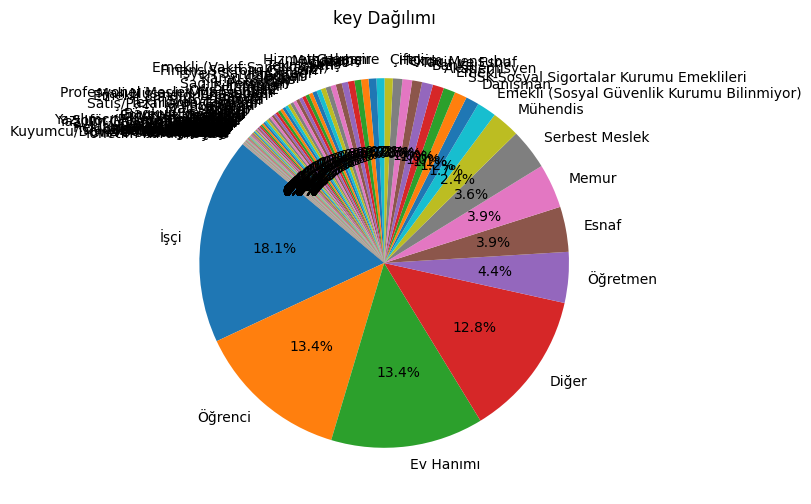

In [37]:
# 2-) key analizi
print(df_train["PP_MESLEK"])
# df_train["PP_MESLEK"].nunique() kayıtlı 114 key türü var
value_counts_meslek = df_train["PP_MESLEK"].value_counts().to_dict()

# Pasta grafiği için etiketler ve değerler
labels = value_counts_meslek.keys()
sizes = value_counts_meslek.values()
print(value_counts_meslek)


# Pasta grafiğini oluşturalım
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Daireyi daire olarak tutmak için
plt.title('key Dağılımı')
plt.show()

Erkek sayisi:  431283 , Erkek orani: % 50.577388330739666
Kadin sayisi:  421436 , Kadin orani: % 49.422611669260334


Text(0.5, 1.0, 'Müşteri Cinsiyet Dağılımı')

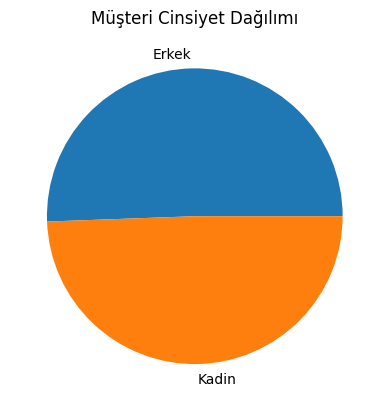

In [38]:
# 3-) Cinsiyet analizi
value_counts_cinsiyet = df_train["PP_CINSIYET"].value_counts()
erkek_sayisi = value_counts_cinsiyet.get(1, 0)
kadin_sayisi = value_counts_cinsiyet.get(2, 0)
print("Erkek sayisi: " , value_counts_cinsiyet.get(1, 0), ", Erkek orani: %", 100*value_counts_cinsiyet.get(1, 0)/(value_counts_cinsiyet.get(1,0)+value_counts_cinsiyet.get(2,0)))
print("Kadin sayisi: " , value_counts_cinsiyet.get(2, 0), ", Kadin orani: %", 100*value_counts_cinsiyet.get(2, 0)/(value_counts_cinsiyet.get(1,0)+value_counts_cinsiyet.get(2,0)))
plt.pie([erkek_sayisi,kadin_sayisi], labels=["Erkek", "Kadin"])
plt.title("Müşteri Cinsiyet Dağılımı")

HAZIRAN    252193
MAYIS      246389
EKIM        93766
EYLUL       89170
TEMMUZ      86460
AGUSTOS     84741
Name: FLAG, dtype: int64


([<matplotlib.patches.Wedge at 0x114ccc533d0>,
 [Text(0.65838334913148, 0.8812101710638706, 'HAZIRAN'),
  Text(-1.0233234759596517, 0.40349605146749157, 'MAYIS'),
  Text(-0.7028832509025783, -0.8461413212936851, 'EKIM'),
  Text(-0.02112283845872649, -1.0997971747988111, 'EYLUL'),
  Text(0.6461497603309957, -0.8902193478150185, 'TEMMUZ'),
  Text(1.0468250783910362, -0.3378716549987596, 'AGUSTOS')])

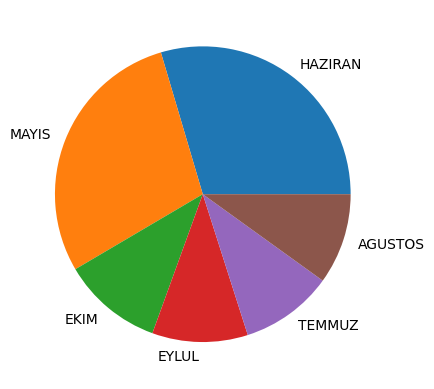

In [39]:
# 4-) Verinin hangi aya ait oldugunun analizi
print(df_train["FLAG"].value_counts())
months = df_train["FLAG"].value_counts().to_dict().keys()
month_values = df_train["FLAG"].value_counts().to_dict().values()
plt.pie(month_values, labels=months)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 122]

Text(0, 0.5, 'Müşteri Sayısı')

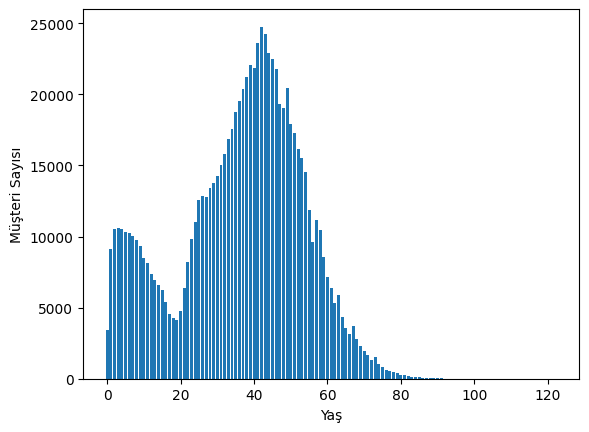

In [40]:
# 5-) Yas analizi (bar grafigi cikar)
df_train["YAS_YIL"] = df_train["PP_YAS"]//12
keys_yas = df_train["YAS_YIL"].value_counts().to_dict().keys()
values_yas = df_train["YAS_YIL"].value_counts().to_dict().values()

new_list = [int(x) for x in list(keys_yas)]
new_list.sort()
print(new_list)


plt.bar(keys_yas,values_yas)
plt.xlabel("Yaş")
plt.ylabel("Müşteri Sayısı")

In [41]:
# 6-) Musteri segmenti analizi
dict = df_train["PP_MUSTERI_SEGMENTI"].value_counts().to_dict()
print(list(dict.keys()))
keys_segment = [name.__str__() for name in list(dict.keys())]
plt.bar(list(dict.keys()),list(dict.values()))
plt.xlabel("Segment")
plt.ylabel("Müşteri Sayısı")
def millions(x, pos):
    # formatting function as millions with x parameters
    return f'{x/1000:.0f}K'

formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

[106, 105, 102, 104, 103, 101]


tc:  848335   mavi: 2570   yabanci 1814


Text(0.5, 0, 'uyruk')

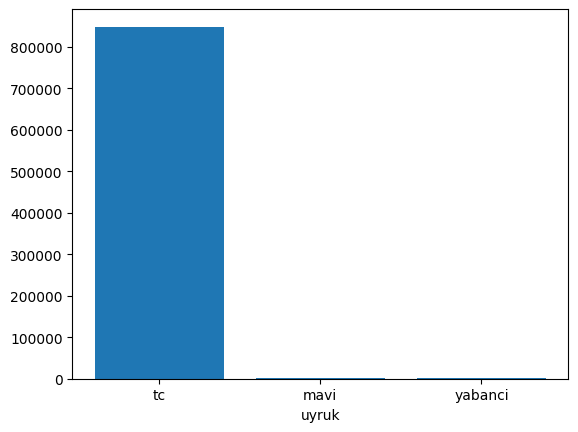

In [42]:
# 7-) Uyruk analizi
value_counts_uyruk = df_train["PP_UYRUK"].value_counts()
tc = value_counts_uyruk.get(1, 0)
mavi = value_counts_uyruk.get(2, 0)
yabanci = value_counts_uyruk.get(3, 0)
print("tc: ", tc, "  mavi:", mavi, "  yabanci", yabanci)
plt.bar(["tc", "mavi", "yabanci"],[tc, mavi, yabanci])
plt.xlabel("uyruk")

34    204550
6      86350
35     62271
7      36034
16     30983
       ...  
62       813
56       792
29       776
75       615
69       500
Name: IL, Length: 82, dtype: int64


Text(0, 0.5, 'Müşteri Sayısı')

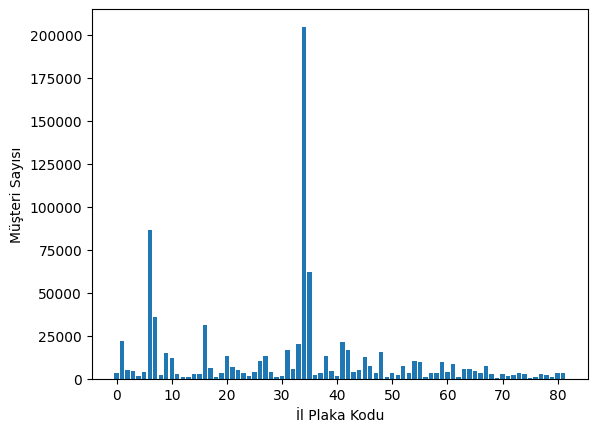

In [43]:
# 8-) Il analizi
print(df_train["IL"].value_counts())
plakalar = df_train["IL"].value_counts().to_dict().keys()
numbers_plakalar = df_train["IL"].value_counts().to_dict().values()
plt.bar(plakalar, numbers_plakalar)
plt.xlabel("İl Plaka Kodu")
plt.ylabel("Müşteri Sayısı")


In [44]:
# 9-) labela gore siniflandirma
labels = df_train['LABEL'].unique()  # Farklı etiket değerlerini alalım
print(labels)
label_data = {}

for label in labels:
    label_data[label] = df_train[df_train['LABEL'] == label]

# print(type(label_data)) dict tipinde
# print(label_data.keys())
# print(label_data['UA'])
# print(label_data['HU14'])

['UA' 'HU19' 'HU07' 'HU14' 'HU11' 'HU15' 'HU12' 'HU06']


In [45]:
# 10-) labela gore siniflandirma 2.

# soru geliri duzenleme
df_gelir = df_train["SORU_GELIR_CVP"]
df_gelir.fillna(0, inplace=True)
df_gelir = df_gelir.astype(str).str.replace(",",".")
df_gelir = df_gelir.astype(float)
df_gelir = df_gelir.astype(int)

print(df_gelir)
print(df_gelir.max())
df_train['SORU_GELIR_CVP_NEW'] = 0
for i in range(1,335):
    df_train.loc[(df_gelir > 3000 * (i-1)) & (df_gelir <= 3000 * i), 'SORU_GELIR_CVP_NEW'] = i
print(df_train["SORU_GELIR_CVP_NEW"])

# anaparayi duzenleme
import math
group_anapara = df_train["ANAPARA"]
print(math.ceil(group_anapara.max()/3000))
df_train["ANAPARA_NEW"] = 0
for i in range(1, math.ceil(group_anapara.max()/3000)):
    df_train.loc[(df_train["ANAPARA"]  > (i-1)*3000) & (df_train["ANAPARA"]  <= i * 3000), "ANAPARA_NEW"] = i
df_train.columns


labeldata = {}

for label, group in df_train.groupby('LABEL'):
    labeldata[label] = group
#for label in labeldata.keys():
    #print(label)
print(labeldata["HU06"]["BU01"])

for label, group_df in labeldata.items():
    print("Label:", label, "- Satir sayisi:", group_df.shape[0])
# labeldata suan keys olarak sigorta isimleri, values olarak o sigortalarin bulundugu satirlari barindiriyor
# print(label_data["UA"])
# print(type(labeldata)) dict tipinde
    
# print(df_train.groupby('LABEL')['HU06'].value_counts().to_dict().keys())

C:\Users\ökkeş\AppData\Roaming\Python\Python311\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


0             0
1          7500
2             0
3             1
4          1500
          ...  
852714        0
852715    30000
852716     4000
852717     3000
852718     3000
Name: SORU_GELIR_CVP, Length: 852719, dtype: int32
1000000000
0          0
1          3
2          0
3          1
4          1
          ..
852714     0
852715    10
852716     2
852717     1
852718     1
Name: SORU_GELIR_CVP_NEW, Length: 852719, dtype: int64
319
1028      0
1041      0
1142      0
1495      0
1807      0
         ..
850616    0
851281    0
851799    0
851826    0
852556    0
Name: BU01, Length: 3178, dtype: int64
Label: HU06 - Satir sayisi: 3178
Label: HU07 - Satir sayisi: 3728
Label: HU11 - Satir sayisi: 439
Label: HU12 - Satir sayisi: 676
Label: HU14 - Satir sayisi: 10754
Label: HU15 - Satir sayisi: 415
Label: HU19 - Satir sayisi: 759
Label: UA - Satir sayisi: 832770


In [46]:
""" dosya olusturma icin
if not os.path.exists("graphs"):
    os.makedirs("graphs")
    print("images klasörü olustu")

if not os.path.exists("./graphs/{}".format("name")):
    os.makedirs("./graphs/{}".format("name"))
    print("names klasoru olustu")
dosya_yolu = os.path.join(os.getcwd(), "graphs", "hu6", "grafik.png")
print(dosya_yolu)"""

' dosya olusturma icin\nif not os.path.exists("graphs"):\n    os.makedirs("graphs")\n    print("images klasörü olustu")\n\nif not os.path.exists("./graphs/{}".format("name")):\n    os.makedirs("./graphs/{}".format("name"))\n    print("names klasoru olustu")\ndosya_yolu = os.path.join(os.getcwd(), "graphs", "hu6", "grafik.png")\nprint(dosya_yolu)'

label :  HU06
Satir sayisi:  3178 , Kolon sayisi:  100
dict_keys([1, 2])

Erkek sayisi:  1848
Kadin sayisi:  1330
Cinsiyet is ok!


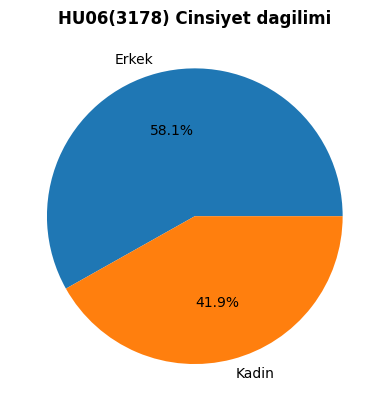


yas:  {43: 99, 49: 94, 42: 93, 45: 90, 35: 88, 34: 88, 41: 84, 37: 83, 40: 83, 38: 82, 48: 81, 46: 80, 36: 78, 44: 78, 47: 76, 31: 75, 33: 71, 39: 70, 32: 69, 50: 68, 29: 65, 27: 63, 52: 60, 30: 58, 2: 55, 53: 53, 51: 50, 25: 49, 26: 49, 24: 46, 3: 45, 28: 44, 54: 43, 55: 43, 1: 40, 57: 39, 4: 38, 5: 37, 58: 37, 60: 36, 7: 36, 6: 35, 56: 34, 8: 33, 10: 29, 9: 28, 61: 27, 59: 27, 22: 27, 23: 24, 65: 23, 62: 22, 63: 22, 0: 21, 11: 21, 12: 17, 64: 17, 13: 17, 67: 16, 21: 15, 14: 15, 15: 15, 16: 12, 20: 12, 66: 12, 17: 10, 19: 9, 68: 8, 69: 7, 18: 7}
yas is ok


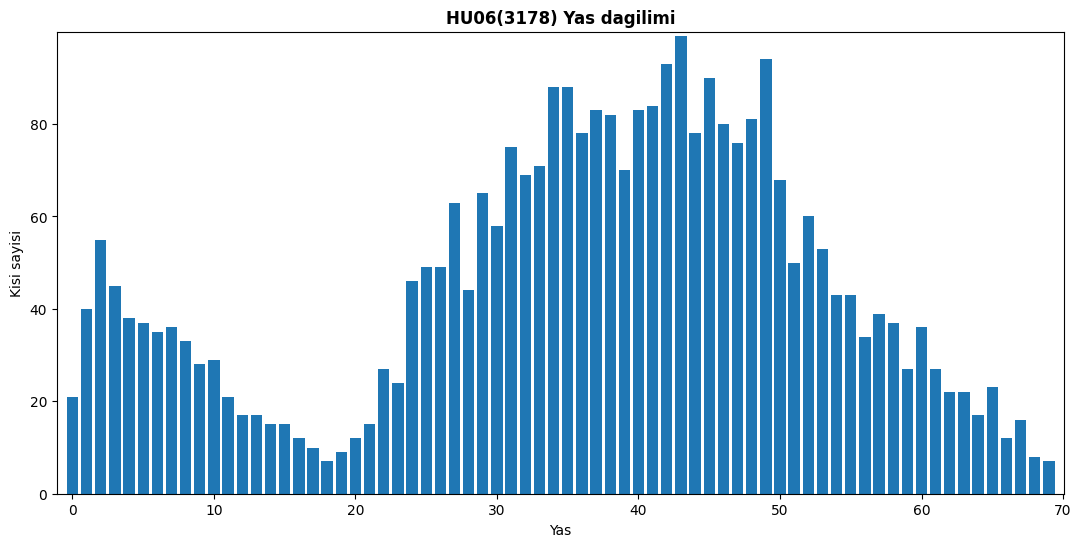


segment:  {102: 1195, 104: 778, 105: 585, 103: 451, 106: 108, 101: 61}
Segment is ok


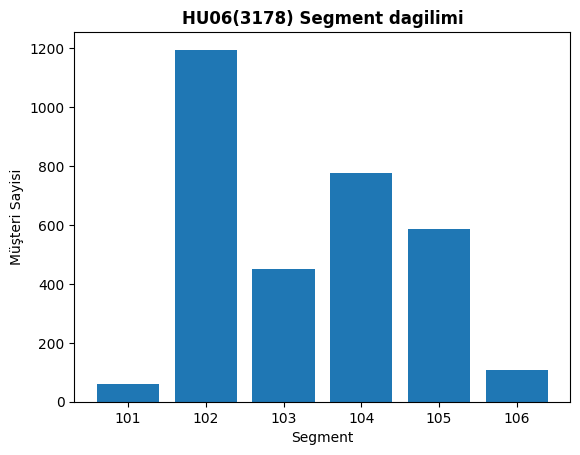


tc:  3146   mavi: 25   yabanci 7
Uyruk is ok!



 {'İşçi': 362, 'Öğrenci': 336, 'Esnaf': 229, 'Ordu Mensubu': 194, 'Tacir ve Esnaf': 180, 'Ev Hanımı': 152, 'Öğretmen': 132, 'Hizmet Çalışanı': 122, 'Finans Sektörü Çalışan': 113, 'Banka': 108, 'Eczacı': 107, 'Memur': 85, 'Danışman': 74, 'Mühendis': 73, 'Diğer': 62, 'Hekim': 62, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 59, 'Emekli': 51, 'İşyeri Sahibi/Ortağı': 49, 'Doktor': 49, 'Akademisyen': 48, 'Serbest Meslek': 37, 'Sağlık Personeli': 26, 'Çiftçi': 24, 'Avukat': 22, 'Profesyonel Meslek Mensupları': 21, 'Muhasebe': 21, 'Astsubay': 19, 'Mali Müşavir/Muhasebeci': 18, 'SSK-Sosyal Sigortalar Kurumu Emeklileri': 18, 'Tüccar': 17, 'Kamu Çalışanı': 16, 'İş Adamı': 15, 'Emekli (Vakıf,Sandık v.b.)': 14, 'Hemşire': 10, 'Bilinmiyor': 10, 'Mali Müşavir': 8, 'Müfettiş/Denetçi': 8, 'Mimar': 7, 'Turizmci': 7, 'Subay': 7, 'Sigorta': 7, 'Satış/Pazarlama Çalışanı': 6, 'Finans': 6, 'Müteahhit': 6, 'Teknisyen/Tekniker': 6, 'Satış': 6, 'İşsiz': 5, 'Emniyet Mensubu': 5, 'Bağkur Emeklileri': 5, 'Polis

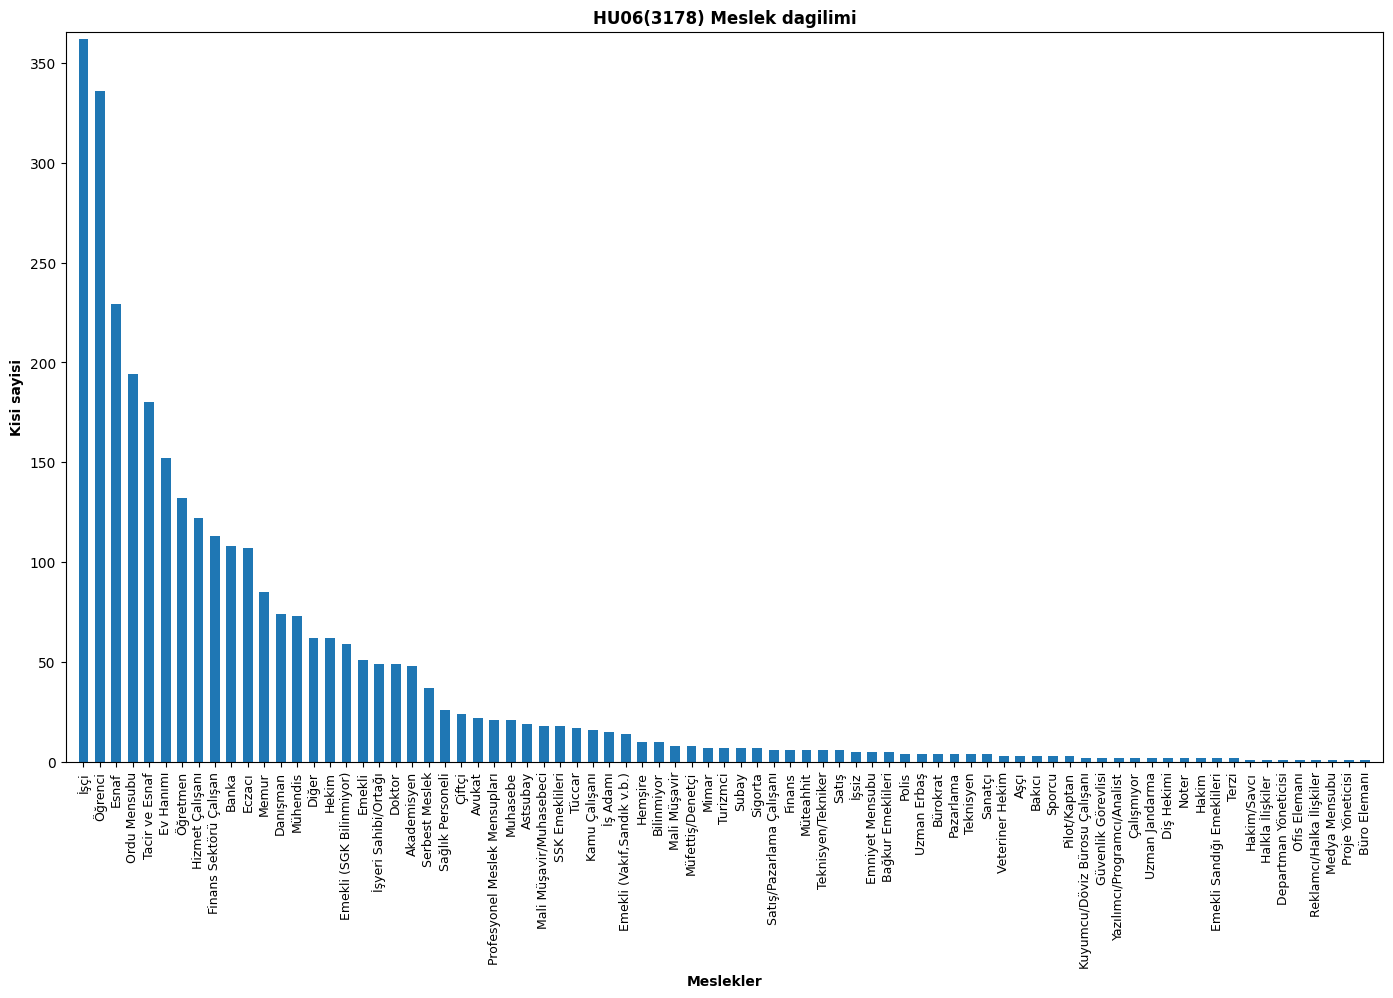


 {'Cesur': 180, 'Temkinli': 161, 'Bilge': 145, 'Dengeli': 126, 'Yetkin': 116}
Yatirim karakteri: Cevap verenlerin orani: % 22.90748898678414


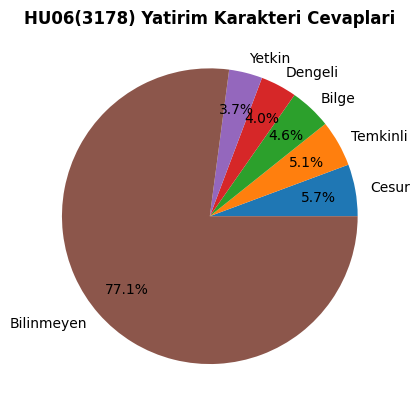


 {'Married': 1824, 'Single': 1102, 'Divorced': 218, 'Widowed': 34}
Medeni hal: Cevap verenlerin orani:  100.0
tam


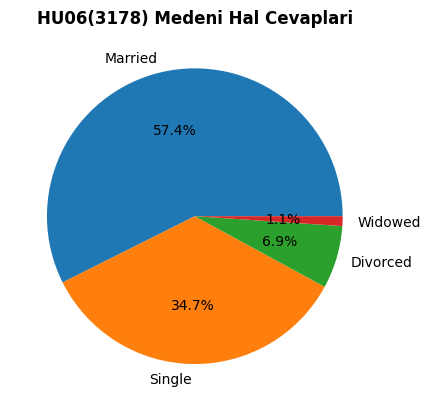


 {'Lisans': 1418, 'Lise': 854, '(Diğer)': 406, 'İlköğretim': 230, 'Yüksek Lisans': 86, 'Önlisans': 70, 'Doktora': 27}
Egitim: Cevap verenlerin orani: % 97.2624292007552


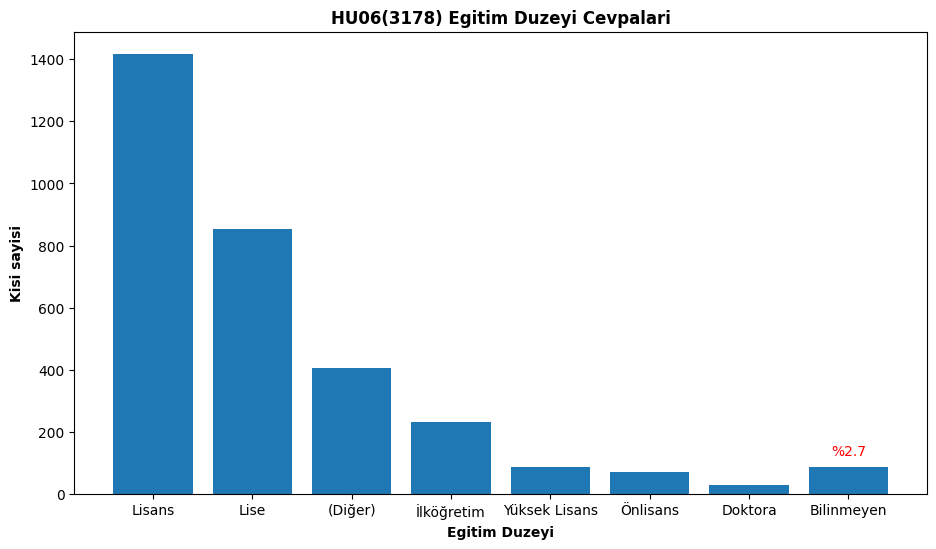


 {0: 1040, '10000': 157, '5000': 154, '20000': 119, '15000': 105, '10000.0': 79, '0': 75, '5000.0': 73, '30000': 67, '3000': 65, '0.0': 64, '4000': 61, '7000': 57, '15000.0': 56, '50000': 51, '20000.0': 50, '2000': 44, '6000': 38, '25000': 37, '2500': 33, '30000.0': 32, '3000.0': 31, '8000': 31, '2000.0': 27, '50000.0': 26, '40000': 23, '1000': 22, '8000.0': 20, '4000.0': 19, '3500': 18, '7500': 17, '100000': 16, '25000.0': 15, '100000.0': 15, '6000.0': 15, '7000.0': 14, '40000.0': 13, '1500': 12, '18000': 12, '4500': 11, '2500.0': 10, '12000': 10, '3500.0': 10, '9000': 10, '60000': 9, '70000': 8, '1500.0': 7, '500': 7, '12000.0': 6, '35000': 6, '1.0': 6, '45000.0': 6, '1000.0': 6, '1': 5, '17000': 5, '100': 5, '9000.0': 5, '7500.0': 5, '14000': 5, '80000': 5, '8500.0': 5, '16000': 5, '8500': 5, '5500.0': 4, '5500': 4, '17000.0': 4, '150000': 4, '35000.0': 4, '14000.0': 4, '4500.0': 3, '16000.0': 3, '22000': 3, '19000': 3, '6500': 3, '5600': 3, '45000': 3, '65000.0': 3, '27000.0': 3, 

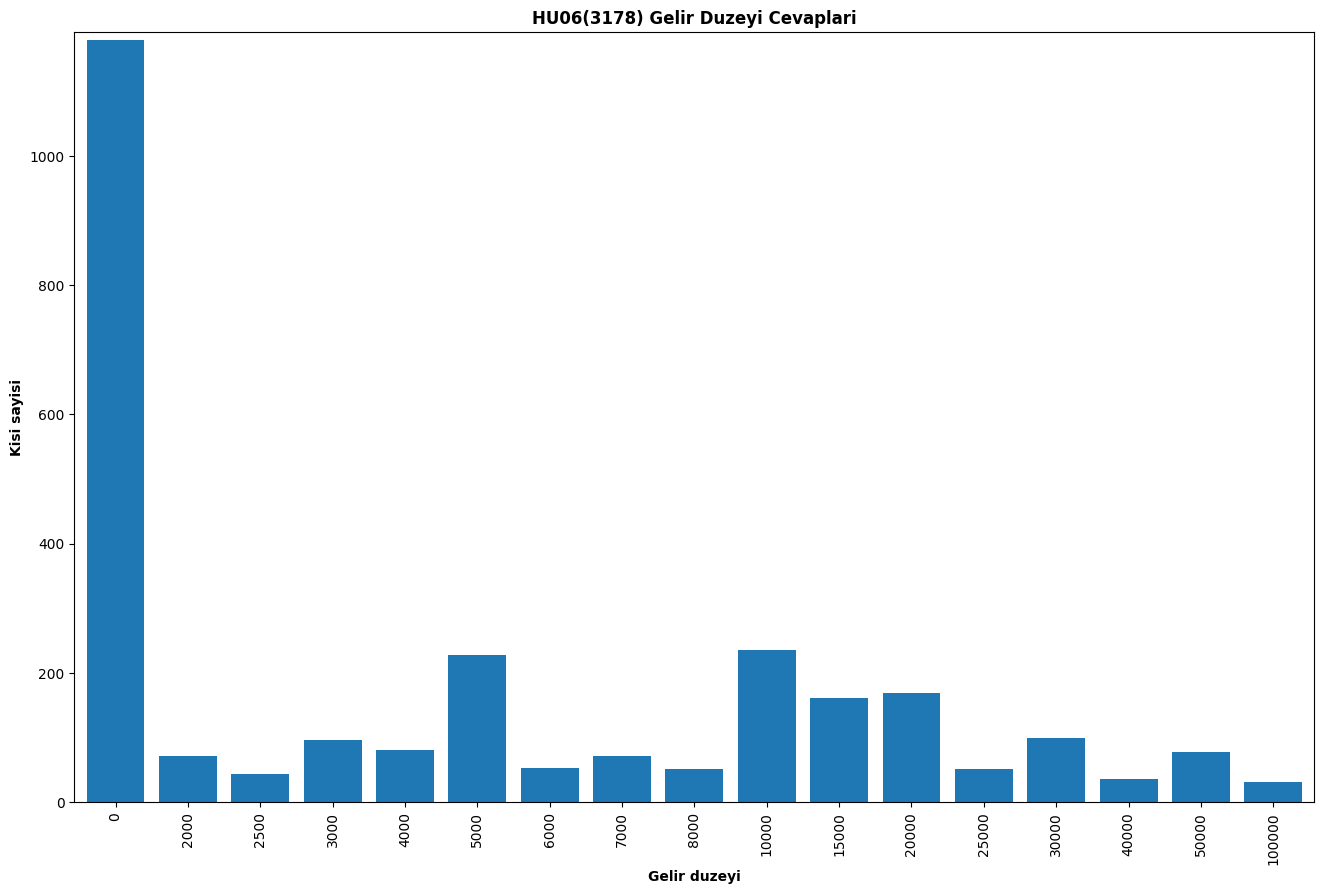


 {0.0: 1461, 1.0: 59, 2.0: 55, 3.0: 7, 4.0: 2, 8.0: 1, 6.0: 1}
Cocuk sayisi: Cevap verenlerin orani: % 49
[1461, 59, 55, 7]


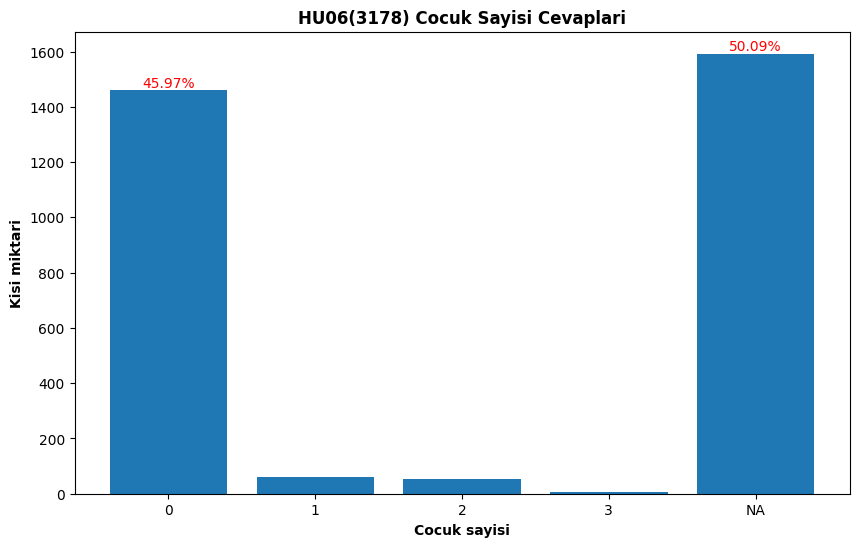

label :  HU07
Satir sayisi:  3728 , Kolon sayisi:  100
dict_keys([2])

Erkek sayisi:  0
Kadin sayisi:  3728
Cinsiyet is ok!


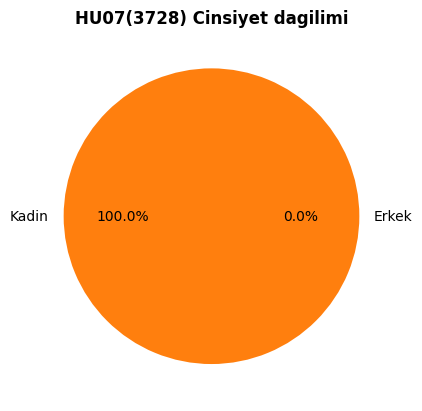


yas:  {42: 176, 43: 162, 41: 162, 39: 155, 45: 150, 44: 149, 38: 147, 40: 145, 36: 135, 37: 134, 29: 133, 47: 127, 31: 127, 35: 126, 33: 121, 34: 120, 46: 113, 49: 112, 30: 111, 48: 109, 32: 108, 26: 107, 25: 106, 27: 95, 28: 88, 24: 85, 23: 75, 22: 72, 50: 66, 21: 53, 19: 48, 20: 47, 51: 40, 52: 15, 53: 6, 18: 3}
yas is ok


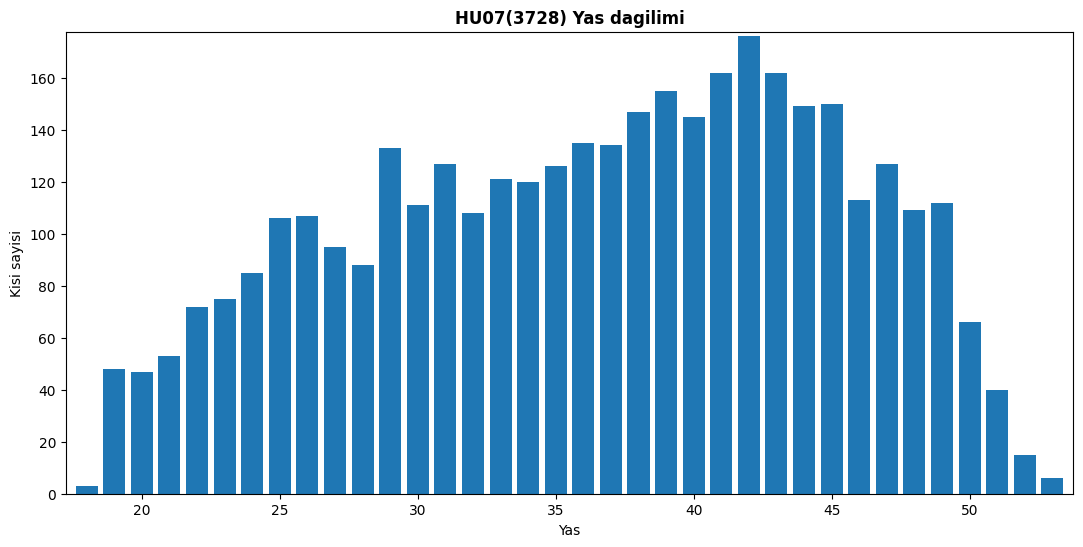


segment:  {105: 1874, 102: 620, 104: 532, 103: 425, 106: 275, 101: 2}
Segment is ok


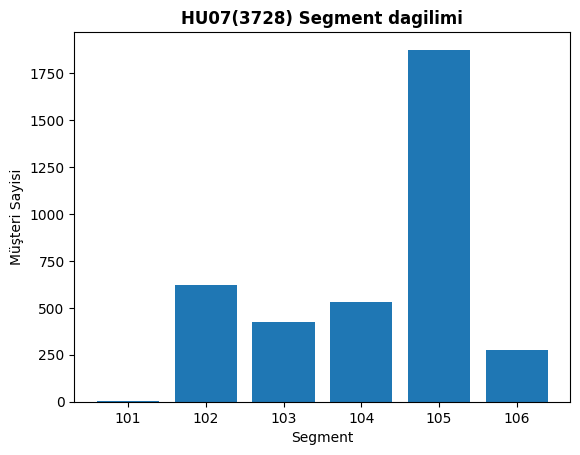


tc:  3704   mavi: 7   yabanci 17
Uyruk is ok!


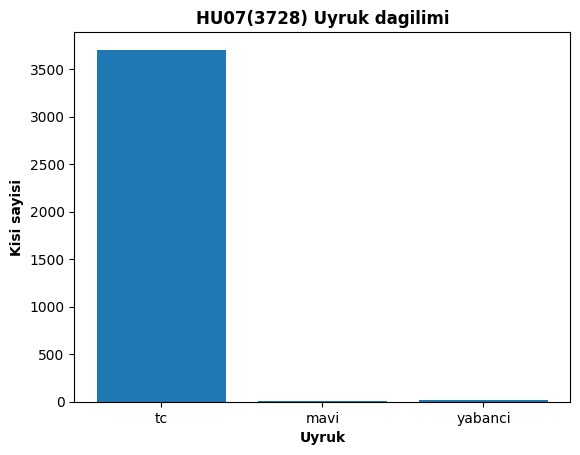


 {'İşçi': 907, 'Ev Hanımı': 871, 'Öğretmen': 254, 'Memur': 218, 'Öğrenci': 205, 'Esnaf': 109, 'Danışman': 101, 'Banka': 79, 'Hemşire': 74, 'Hizmet Çalışanı': 68, 'Akademisyen': 64, 'Diğer': 55, 'Mühendis': 54, 'Muhasebe': 53, 'Finans Sektörü Çalışan': 52, 'Sağlık Personeli': 37, 'Mimar': 32, 'Emekli': 32, 'Tacir ve Esnaf': 30, 'Avukat': 30, 'Hekim': 28, 'Satış': 27, 'İşsiz': 25, 'Serbest Meslek': 22, 'Bilinmiyor': 22, 'Mali Müşavir/Muhasebeci': 19, 'Eczacı': 16, 'Profesyonel Meslek Mensupları': 15, 'İşyeri Sahibi/Ortağı': 14, 'Teknisyen': 13, 'Sigorta': 12, 'Teknisyen/Tekniker': 9, 'Satış/Pazarlama Çalışanı': 9, 'Tüccar': 9, 'Çiftçi': 9, 'İş Adamı': 8, 'Büro Elemanı': 8, 'Doktor': 8, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 8, 'Turizmci': 8, 'Pazarlama': 7, 'Mali Müşavir': 6, 'Polis': 6, 'Ebe': 5, 'Aşçı': 5, 'Kamu Çalışanı': 5, 'Ordu Mensubu': 4, 'Ofis Elemanı': 4, 'SSK-Sosyal Sigortalar Kurumu Emeklileri': 4, 'Yazılımcı/Programcı/Analist': 4, 'Sanatçı': 3, 'Emniyet Mensubu': 3, 

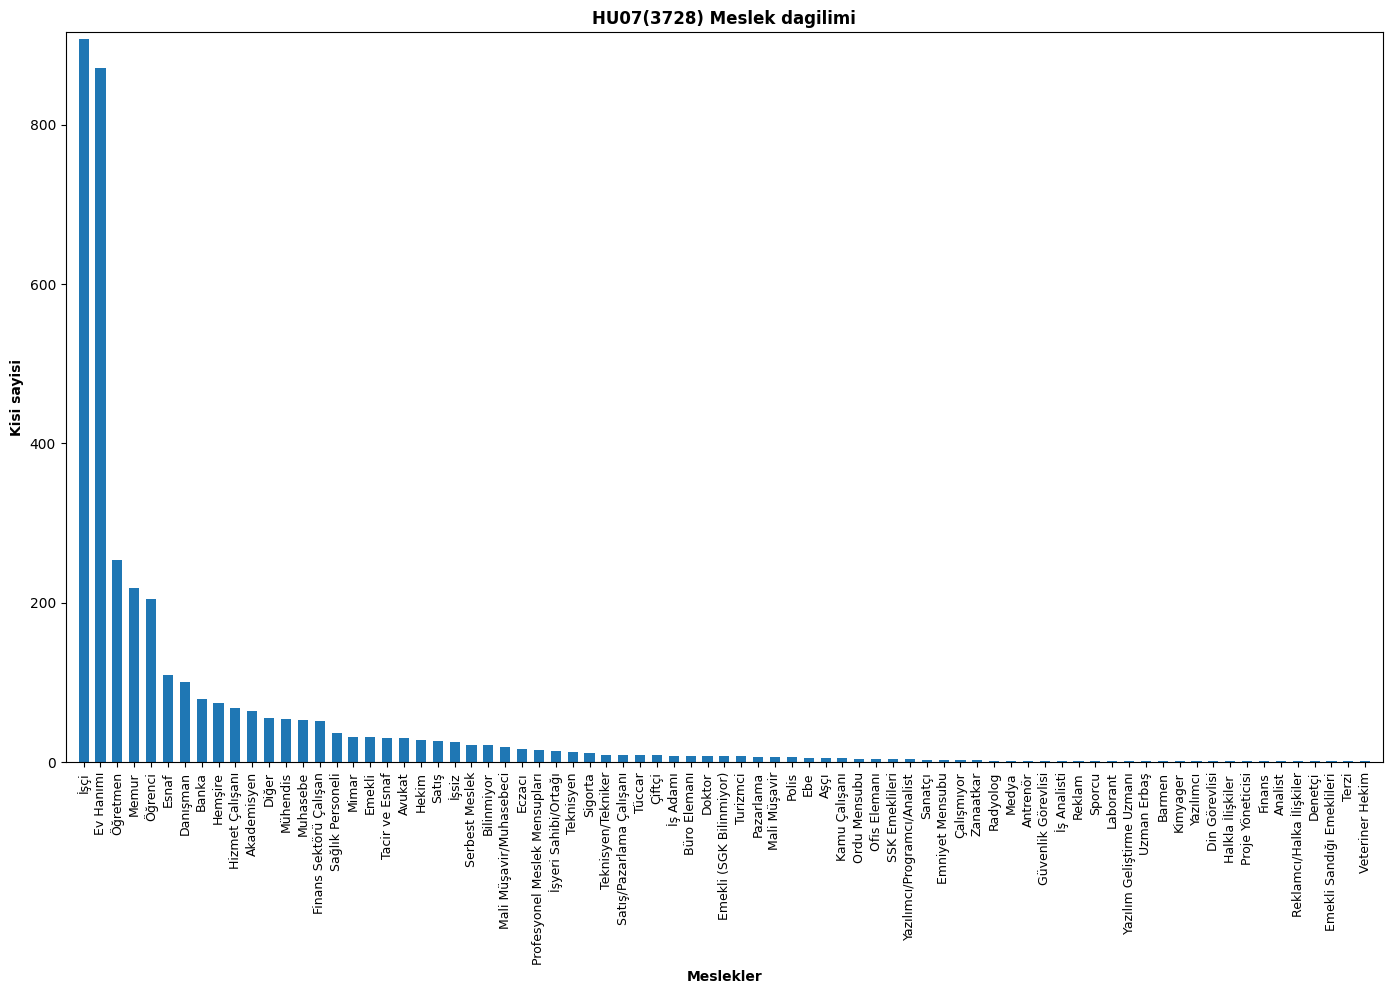


 {'Temkinli': 185, 'Cesur': 150, 'Dengeli': 117, 'Bilge': 76, 'Yetkin': 76}
Yatirim karakteri: Cevap verenlerin orani: % 16.201716738197426


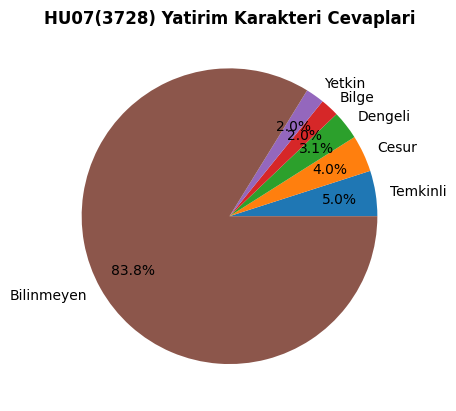


 {'Married': 2299, 'Single': 1067, 'Divorced': 323, 'Widowed': 37}
Medeni hal: Cevap verenlerin orani:  99.94635193133047


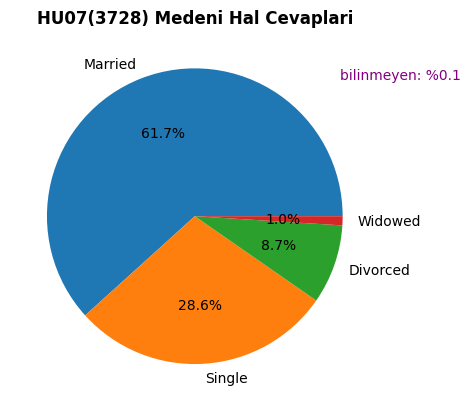


 {'Lisans': 1769, 'Lise': 1496, 'İlköğretim': 151, '(Diğer)': 105, 'Yüksek Lisans': 80, 'Önlisans': 62, 'Doktora': 21}
Egitim: Cevap verenlerin orani: % 98.81974248927038


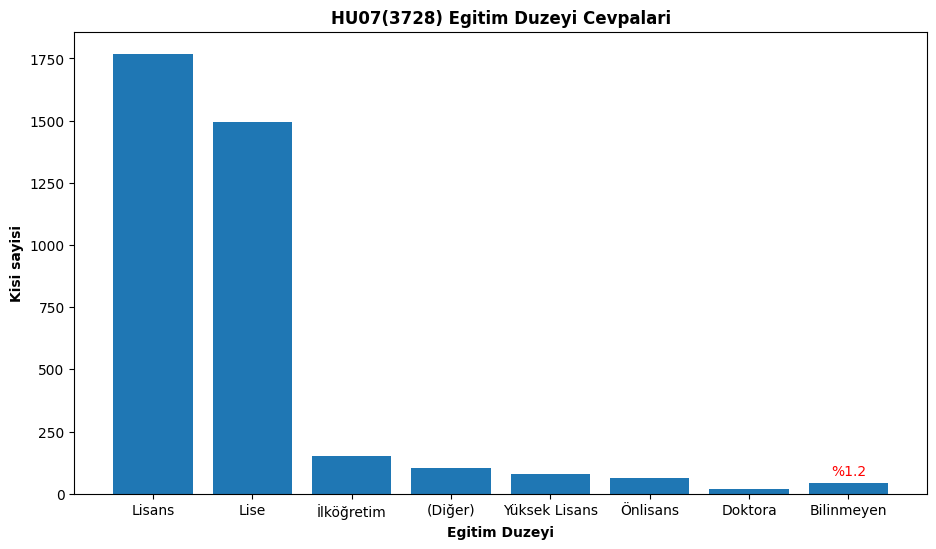


 {0: 949, '5000': 279, '10000': 219, '3000': 192, '4000': 123, '6000': 121, '2000': 119, '5000.0': 110, '1000': 95, '7000': 93, '10000.0': 79, '8000': 78, '3000.0': 72, '2000.0': 61, '20000': 60, '15000': 59, '4000.0': 57, '2500': 46, '7000.0': 45, '3500': 42, '6000.0': 41, '8000.0': 39, '0.0': 36, '1000.0': 35, '20000.0': 34, '0': 32, '4500': 30, '500': 28, '15000.0': 26, '3500.0': 24, '2500.0': 22, '5500': 22, '1500': 20, '12000': 18, '9000': 15, '5500.0': 13, '7500': 13, '40000': 12, '30000': 12, '13000': 11, '25000': 11, '1500.0': 10, '12000.0': 9, '13000.0': 9, '500.0': 9, '11000': 9, '8500.0': 8, '50000': 8, '18000': 8, '4250.0': 8, '30000.0': 8, '6500': 7, '7500.0': 7, '25000.0': 7, '2800': 6, '14000': 6, '11000.0': 6, '9000.0': 5, '1': 5, '1200': 4, '3800': 4, '2800.0': 4, '4500.0': 4, '17000': 4, '35000': 4, '17000.0': 4, '2200': 3, '22000': 3, '2700': 3, '45000': 3, '35000.0': 3, '4250': 3, '100': 3, '60000': 3, '8500': 3, '1300.0': 3, '2850.0': 3, '200': 3, '7800': 2, '400.

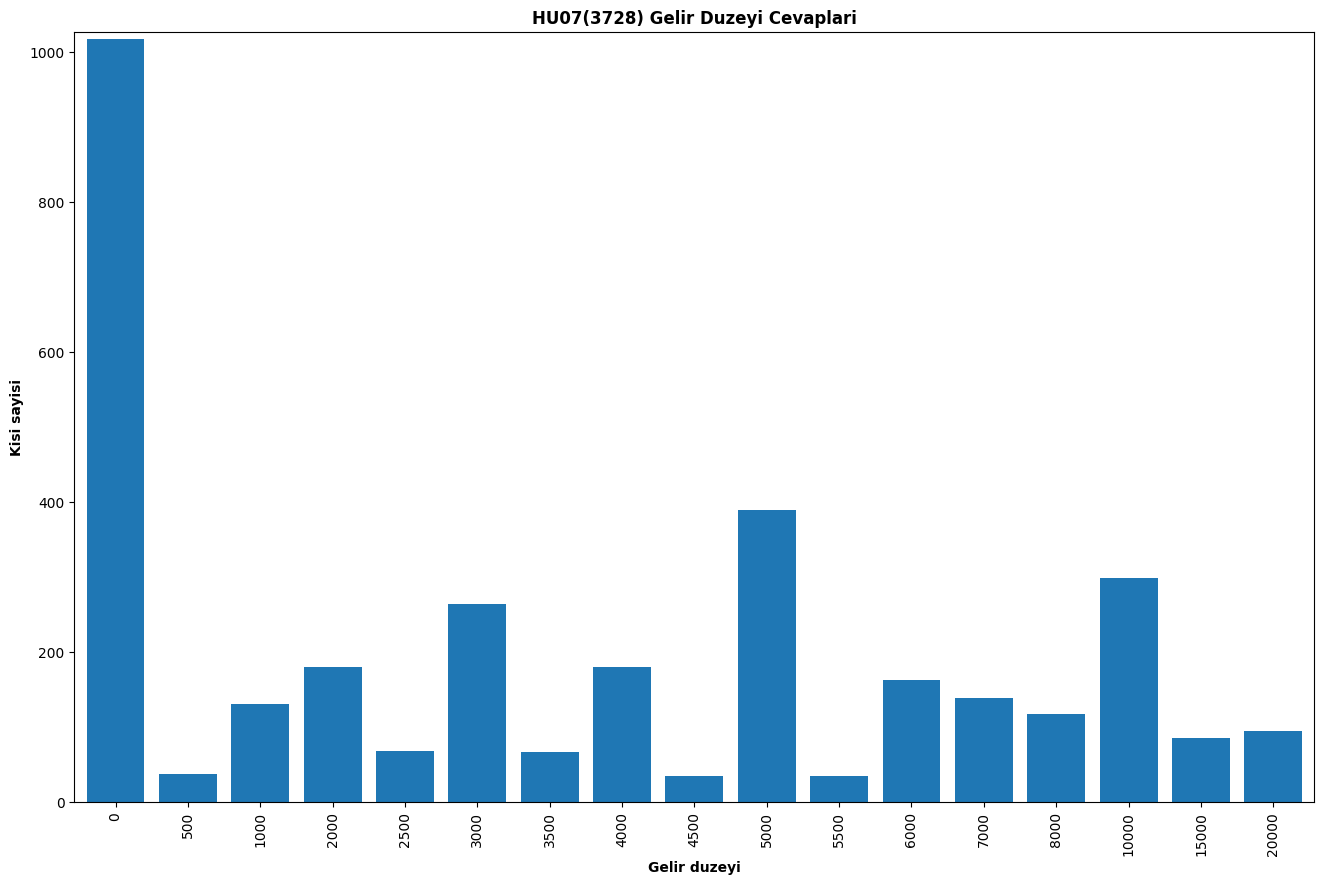


 {0.0: 1381, 1.0: 39, 2.0: 17, 3.0: 5}
Cocuk sayisi: Cevap verenlerin orani: % 38
[1381, 39, 17, 5]


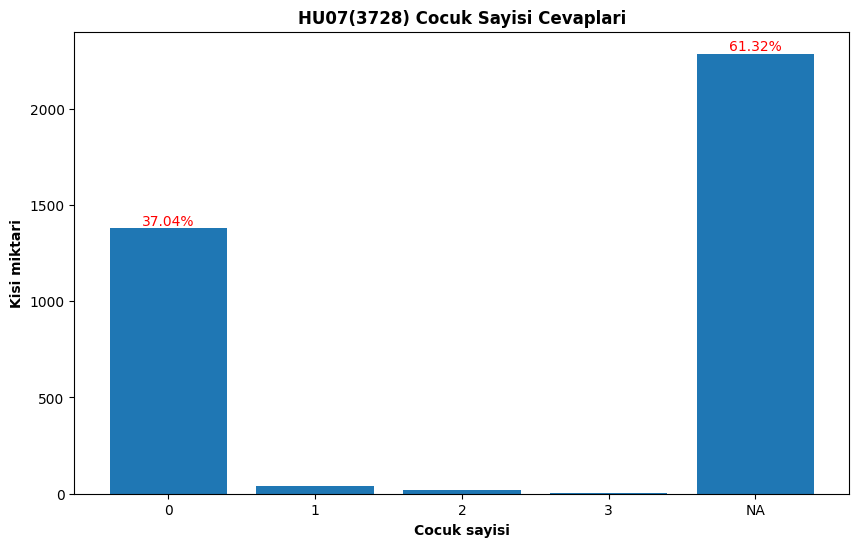

label :  HU11
Satir sayisi:  439 , Kolon sayisi:  100
dict_keys([1, 2])

Erkek sayisi:  341
Kadin sayisi:  98
Cinsiyet is ok!


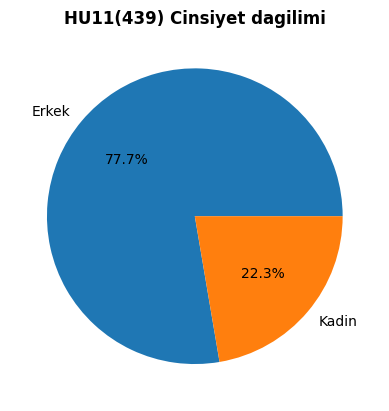


yas:  {40: 31, 44: 27, 37: 24, 34: 24, 38: 23, 45: 20, 42: 19, 41: 19, 35: 19, 33: 18, 39: 18, 43: 17, 49: 15, 31: 15, 36: 14, 30: 14, 46: 11, 47: 10, 50: 9, 28: 9, 54: 8, 48: 8, 29: 7, 52: 6, 53: 6, 26: 5, 27: 5, 51: 5, 57: 5, 25: 4, 21: 4, 19: 4, 32: 3, 24: 3, 56: 2, 55: 2, 23: 2, 20: 2, 22: 2}
yas is ok


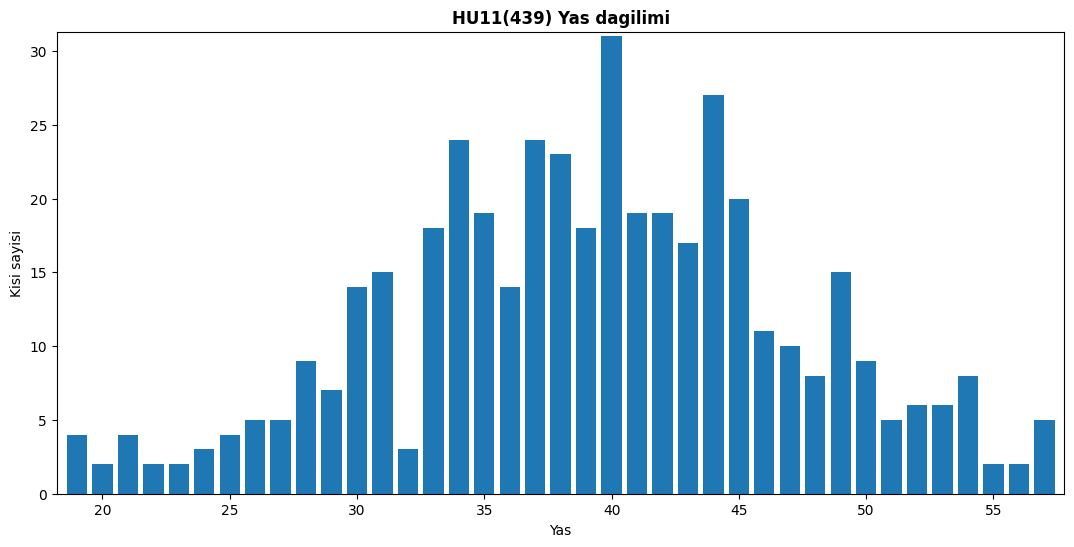


segment:  {102: 236, 103: 159, 101: 19, 104: 13, 105: 11, 106: 1}
Segment is ok


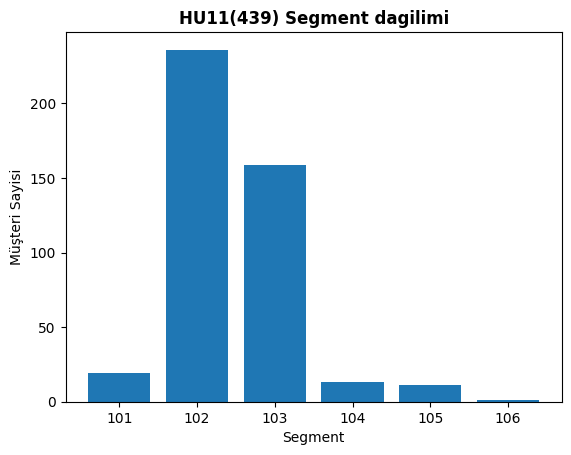


tc:  438   mavi: 0   yabanci 1
Uyruk is ok!


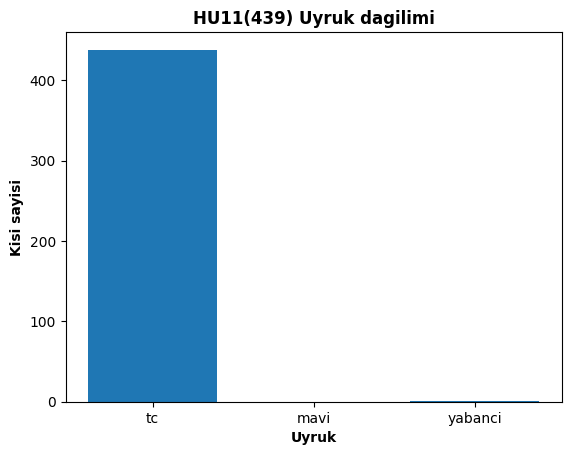


 {'Tacir ve Esnaf': 86, 'Esnaf': 63, 'İşçi': 56, 'Hizmet Çalışanı': 29, 'İşyeri Sahibi/Ortağı': 16, 'Ev Hanımı': 16, 'Danışman': 15, 'Eczacı': 14, 'Banka': 13, 'Finans Sektörü Çalışan': 12, 'Mühendis': 10, 'Serbest Meslek': 9, 'Memur': 8, 'Öğretmen': 8, 'Profesyonel Meslek Mensupları': 7, 'İş Adamı': 6, 'Mali Müşavir/Muhasebeci': 5, 'Öğrenci': 5, 'Ordu Mensubu': 4, 'Akademisyen': 4, 'Müteahhit': 3, 'Emekli': 3, 'Hekim': 3, 'Şoför': 3, 'Teknisyen/Tekniker': 3, 'Çiftçi': 3, 'Turizmci': 3, 'Diğer': 3, 'Sanatçı': 2, 'Bürokrat': 2, 'Diş Hekimi': 2, 'Mali Müşavir': 2, 'Doktor': 2, 'Sağlık Personeli': 2, 'Hemşire': 2, 'Muhasebe': 1, 'SSK-Sosyal Sigortalar Kurumu Emeklileri': 1, 'Denetçi': 1, 'Pilot/Kaptan': 1, 'Tüccar': 1, 'Emniyet Mensubu': 1, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 1, 'Analist': 1, 'Satış': 1, 'Avukat': 1, 'Pazarlama': 1, 'Sporcu': 1, 'Medya Mensubu': 1, 'Emlakçı': 1, 'Zanaatkar': 1}
['Tacir ve Esnaf', 'Esnaf', 'İşçi', 'Hizmet Çalışanı', 'İşyeri Sahibi/Ortağı', 'Ev H

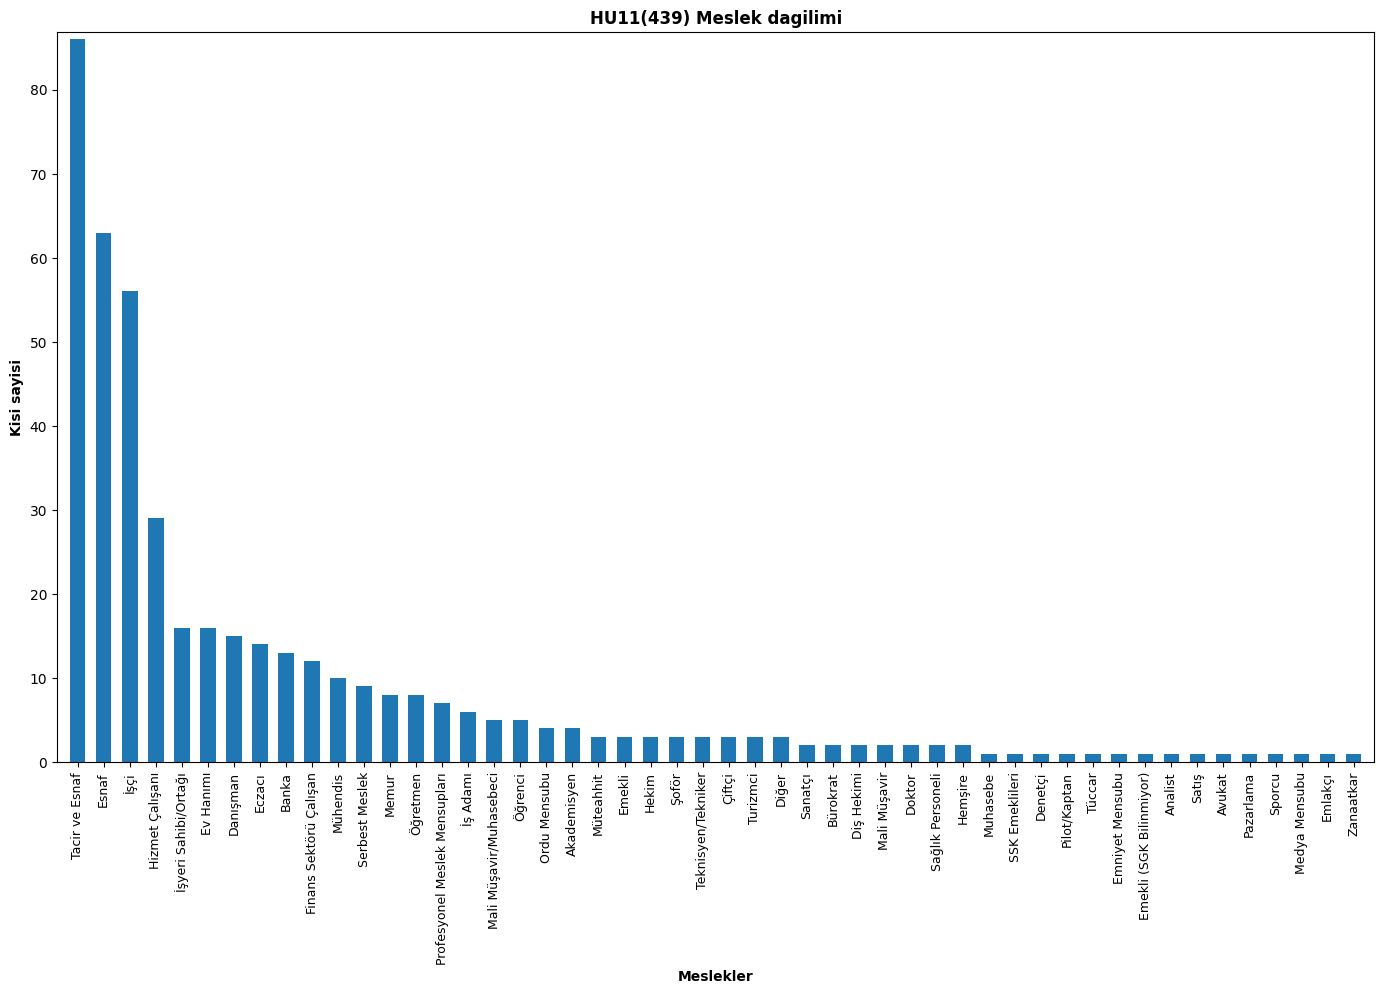


 {'Bilge': 20, 'Cesur': 19, 'Dengeli': 19, 'Temkinli': 17, 'Yetkin': 12}
Yatirim karakteri: Cevap verenlerin orani: % 19.81776765375854


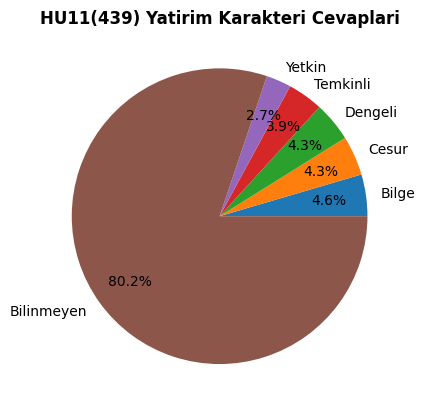


 {'Married': 354, 'Single': 65, 'Divorced': 19, 'Widowed': 1}
Medeni hal: Cevap verenlerin orani:  100.0
tam


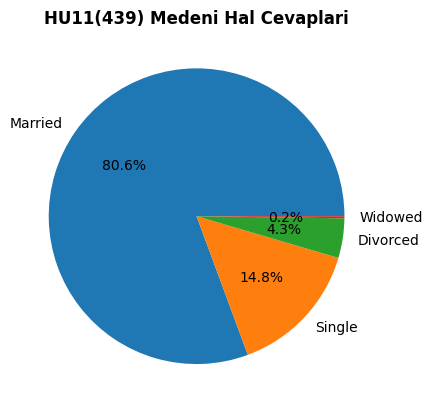


 {'Lisans': 195, 'Lise': 155, '(Diğer)': 56, 'Yüksek Lisans': 15, 'İlköğretim': 12, 'Önlisans': 4, 'Doktora': 1}
Egitim: Cevap verenlerin orani: % 99.77220956719817


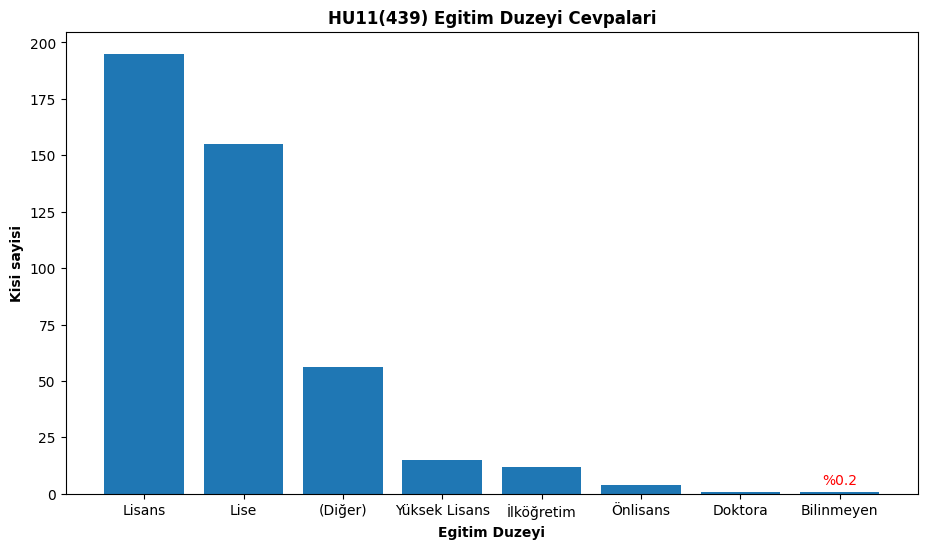


 {0: 88, '10000': 24, '5000': 19, '20000': 18, '15000': 17, '3000': 16, '10000.0': 15, '4000': 14, '30000': 12, '5000.0': 12, '3000.0': 11, '50000': 9, '50000.0': 8, '0': 8, '8000': 8, '15000.0': 8, '20000.0': 7, '7000': 7, '100000': 6, '8000.0': 6, '30000.0': 6, '25000': 6, '0.0': 6, '6000.0': 5, '1500': 5, '2000.0': 4, '35000': 4, '6000': 4, '100000.0': 4, '40000': 4, '200000': 3, '4000.0': 3, '40000.0': 3, '4500': 3, '7500.0': 2, '3500.0': 2, '500.0': 2, '35000.0': 2, '1.0': 2, '7000.0': 2, '4500.0': 2, '1000': 2, '3500': 2, '80000': 2, '60000': 2, '150000': 2, '1000.0': 1, '7500': 1, '5500': 1, '9000': 1, '1300.0': 1, '28000.0': 1, '62550.0': 1, '200000.0': 1, '14000.0': 1, '2500.0': 1, '2000': 1, '12000.0': 1, '750': 1, '4300': 1, '25000.0': 1, '16000.0': 1, '12000': 1, '985601.0': 1, '11500': 1, '70000': 1, '8500': 1, '2300': 1, '300000.0': 1, '5800': 1, '2500': 1, '32000': 1, '18000.0': 1, '3200': 1, '90000.0': 1, '32000.0': 1, '120000.0': 1, '48000': 1, '4600.0': 1, '30500': 1

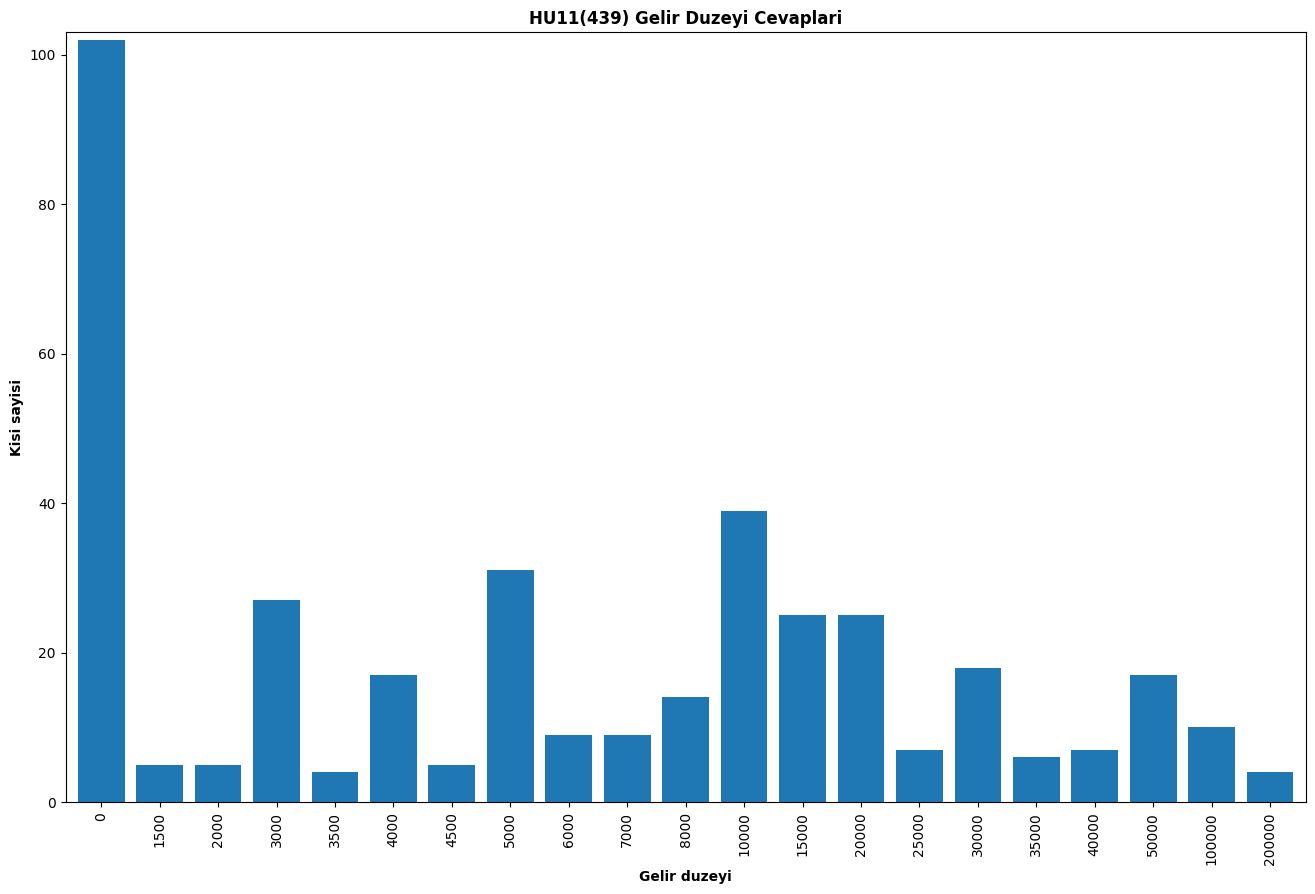


 {0.0: 243, 1.0: 13, 2.0: 8}
Cocuk sayisi: Cevap verenlerin orani: % 60
[243, 13, 8]


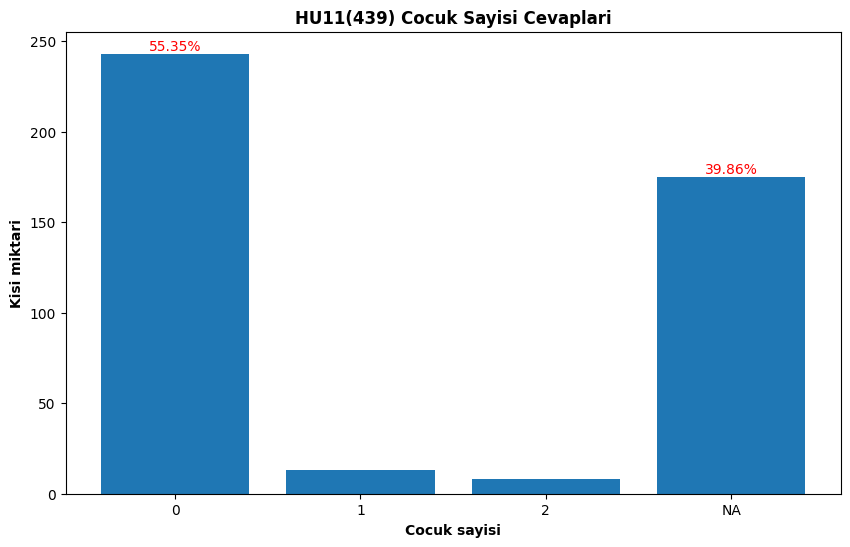

label :  HU12
Satir sayisi:  676 , Kolon sayisi:  100
dict_keys([1, 2])

Erkek sayisi:  532
Kadin sayisi:  144
Cinsiyet is ok!


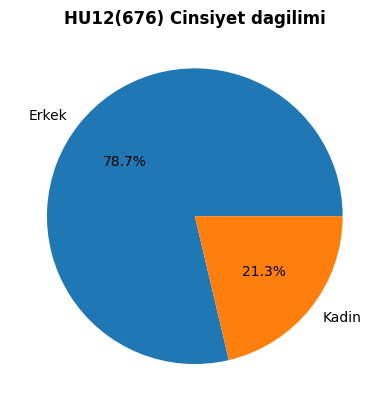


yas:  {34: 33, 36: 32, 46: 28, 37: 27, 49: 26, 35: 24, 43: 24, 31: 23, 39: 22, 45: 21, 33: 20, 32: 19, 54: 19, 50: 19, 38: 17, 29: 17, 59: 17, 48: 16, 42: 16, 40: 16, 28: 15, 30: 14, 55: 14, 41: 14, 52: 13, 51: 13, 53: 12, 47: 12, 26: 12, 25: 11, 44: 10, 27: 9, 57: 9, 65: 8, 56: 8, 62: 7, 23: 7, 22: 6, 64: 6, 63: 6, 61: 6, 60: 5, 67: 5, 68: 4, 58: 4, 66: 4, 24: 3, 21: 1, 19: 1, 20: 1}
yas is ok


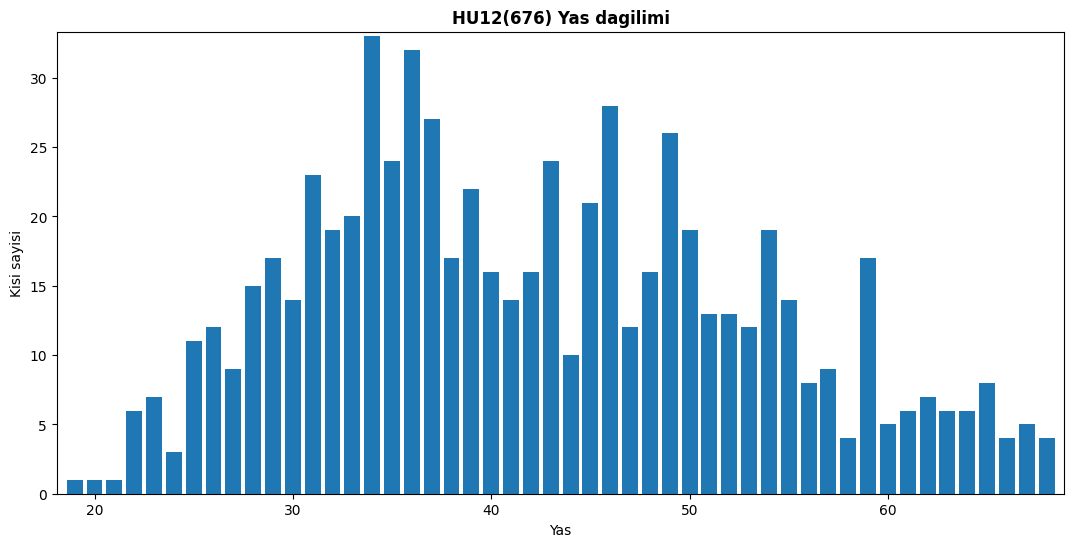


segment:  {105: 224, 106: 151, 104: 107, 102: 100, 103: 93, 101: 1}
Segment is ok


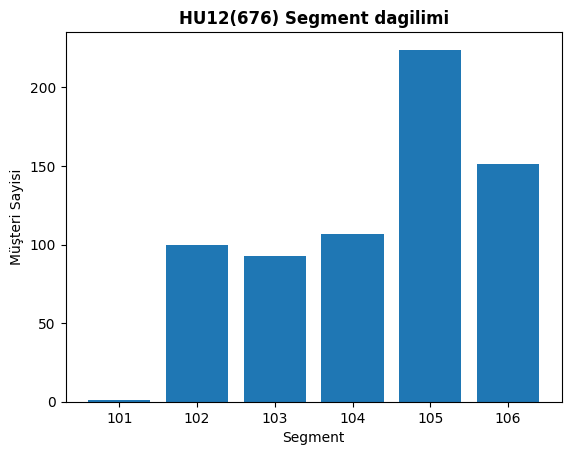


tc:  672   mavi: 1   yabanci 3
Uyruk is ok!


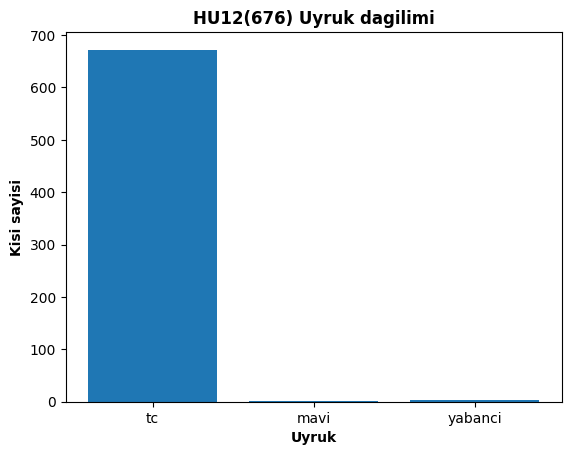


 {'İşçi': 131, 'Tacir ve Esnaf': 81, 'Esnaf': 77, 'Diğer': 46, 'Serbest Meslek': 32, 'Emekli': 30, 'Çiftçi': 29, 'Ev Hanımı': 18, 'Mühendis': 17, 'İşyeri Sahibi/Ortağı': 16, 'Öğretmen': 13, 'Memur': 13, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 12, 'Hizmet Çalışanı': 12, 'Ordu Mensubu': 11, 'Akademisyen': 10, 'SSK-Sosyal Sigortalar Kurumu Emeklileri': 10, 'Danışman': 6, 'Hekim': 6, 'Tüccar': 6, 'Sağlık Personeli': 5, 'Eczacı': 5, 'Avukat': 4, 'Muhasebe': 4, 'Bilinmiyor': 4, 'Finans Sektörü Çalışan': 4, 'Hemşire': 4, 'İş Adamı': 4, 'Öğrenci': 4, 'Kamu Çalışanı': 3, 'Profesyonel Meslek Mensupları': 3, 'Satış': 3, 'Teknisyen/Tekniker': 3, 'Şoför': 3, 'Teknisyen': 2, 'Turizmci': 2, 'Müteahhit': 2, 'Aşçı': 2, 'Emekli (Vakıf,Sandık v.b.)': 2, 'Mimar': 2, 'Şoför/Makine Operatörü': 2, 'Emlakçı': 2, 'Terzi': 1, 'Proje Yöneticisi': 1, 'Bağkur Emeklileri': 1, 'İşsiz': 1, 'Banka': 1, 'Biyolog': 1, 'Din Görevlisi': 1, 'Doktor': 1, 'Polis': 1, 'Mali Müşavir': 1, 'Astsubay': 1, 'Emekli Sandığı E

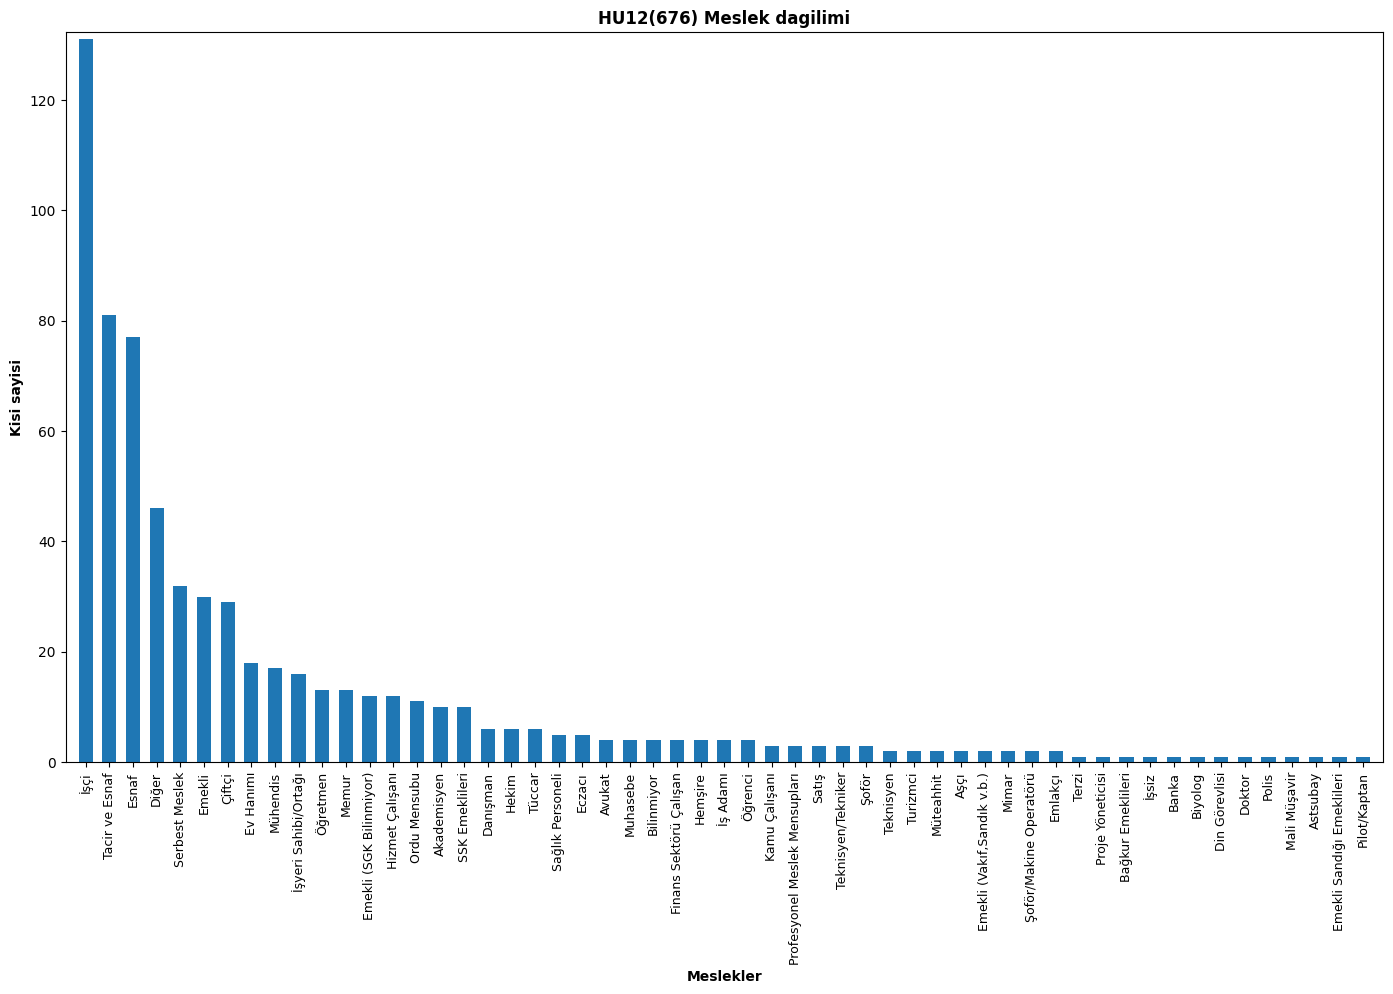


 {'Cesur': 22, 'Temkinli': 15, 'Dengeli': 13, 'Yetkin': 13, 'Bilge': 12}
Yatirim karakteri: Cevap verenlerin orani: % 11.094674556213018


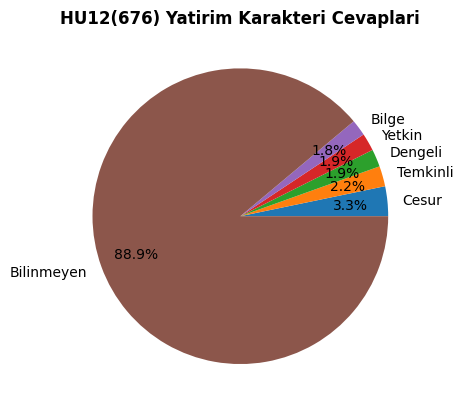


 {'Married': 517, 'Single': 105, 'Divorced': 39, 'Widowed': 14}
Medeni hal: Cevap verenlerin orani:  99.85207100591715


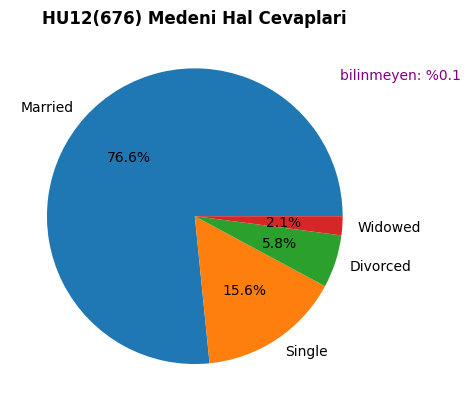


 {'(Diğer)': 268, 'Lise': 227, 'Lisans': 92, 'İlköğretim': 39, 'Önlisans': 13, 'Yüksek Lisans': 4}
Egitim: Cevap verenlerin orani: % 95.11834319526628


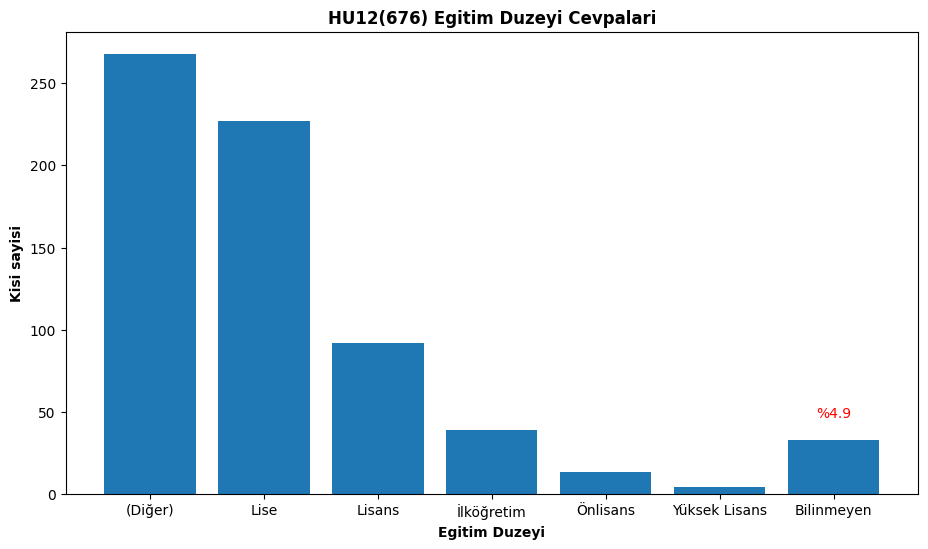


 {0: 138, '5000': 47, '0': 38, '3000': 31, '10000': 31, '2000': 30, '4000': 29, '15000': 23, '3000.0': 15, '5000.0': 15, '1500': 14, '2000.0': 13, '6000': 12, '20000.0': 12, '10000.0': 12, '20000': 12, '0.0': 10, '1000': 9, '7000': 9, '15000.0': 8, '8000': 8, '3500': 8, '30000': 8, '1500.0': 8, '4000.0': 7, '2500': 6, '2500.0': 6, '6000.0': 6, '8000.0': 6, '18000': 5, '25000': 5, '50000.0': 5, '30000.0': 4, '12000': 4, '25000.0': 3, '3500.0': 3, '1': 3, '1000.0': 3, '100000': 3, '2800': 3, '4500': 3, '4500.0': 3, '2800.0': 2, '150000': 2, '100000.0': 2, '50000': 2, '500.0': 2, '1200': 2, '500': 2, '5500.0': 2, '1800': 2, '2300': 2, '35000': 2, '2300.0': 1, '13000.0': 1, '7000.0': 1, '19000.0': 1, '2700.0': 1, '35000.0': 1, '105000': 1, '900': 1, '17250': 1, '2400.0': 1, '155000.0': 1, '19000': 1, '1300.0': 1, '11000.0': 1, '80000.0': 1, '3900': 1, '8500.0': 1, '7500.0': 1, '7250': 1, '16000': 1, '3250': 1, '2200': 1, '2600': 1, '336931.0': 1, '250000': 1, '10500.0': 1, '8500': 1, '800

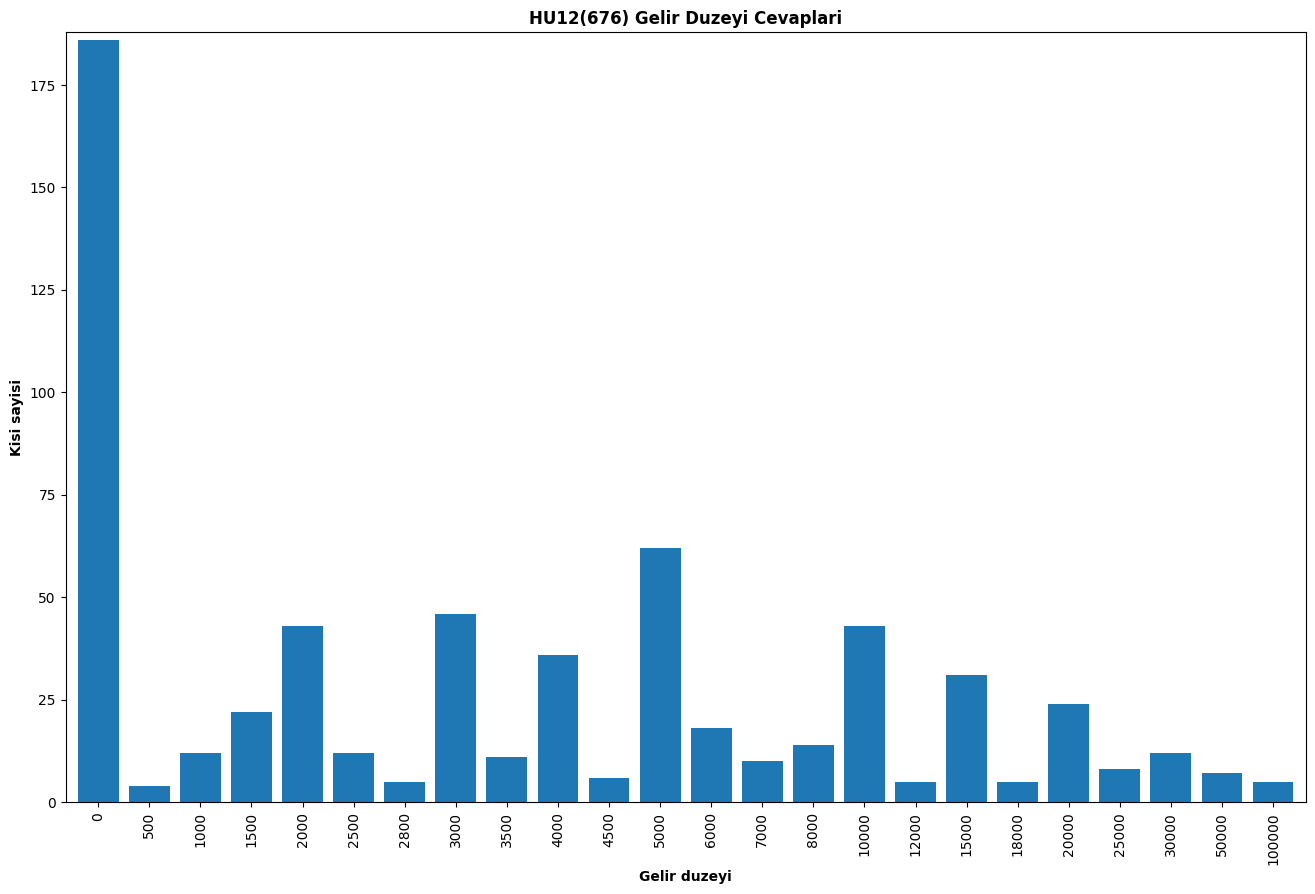


 {0.0: 387, 2.0: 14, 1.0: 8, 3.0: 6, 4.0: 3}
Cocuk sayisi: Cevap verenlerin orani: % 61
[387, 8, 14, 6]


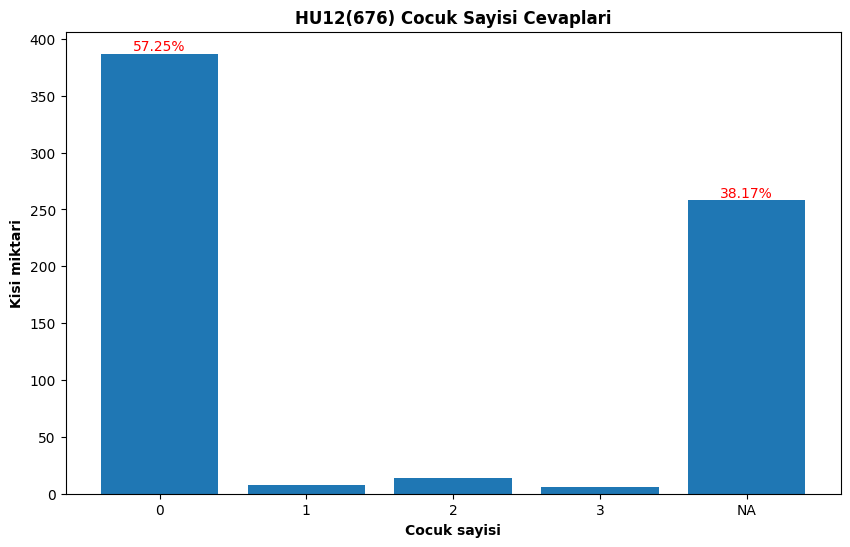

label :  HU14
Satir sayisi:  10754 , Kolon sayisi:  100
dict_keys([1, 2])

Erkek sayisi:  7390
Kadin sayisi:  3364
Cinsiyet is ok!


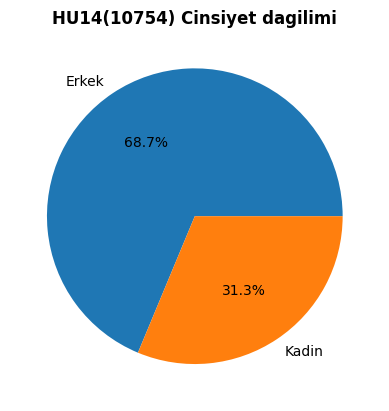


yas:  {25: 413, 35: 411, 38: 410, 39: 403, 40: 390, 36: 389, 33: 381, 37: 380, 34: 374, 32: 370, 26: 368, 42: 366, 41: 361, 24: 358, 28: 346, 30: 342, 31: 339, 29: 331, 23: 327, 27: 323, 43: 318, 44: 315, 22: 295, 45: 262, 46: 246, 21: 230, 48: 200, 20: 195, 47: 187, 49: 182, 19: 154, 51: 145, 50: 134, 52: 100, 53: 94, 54: 55, 55: 43, 56: 39, 59: 31, 57: 31, 58: 28, 18: 21, 60: 18, 63: 11, 61: 11, 62: 11, 64: 5, 66: 4, 67: 4, 65: 2, 68: 1}
yas is ok


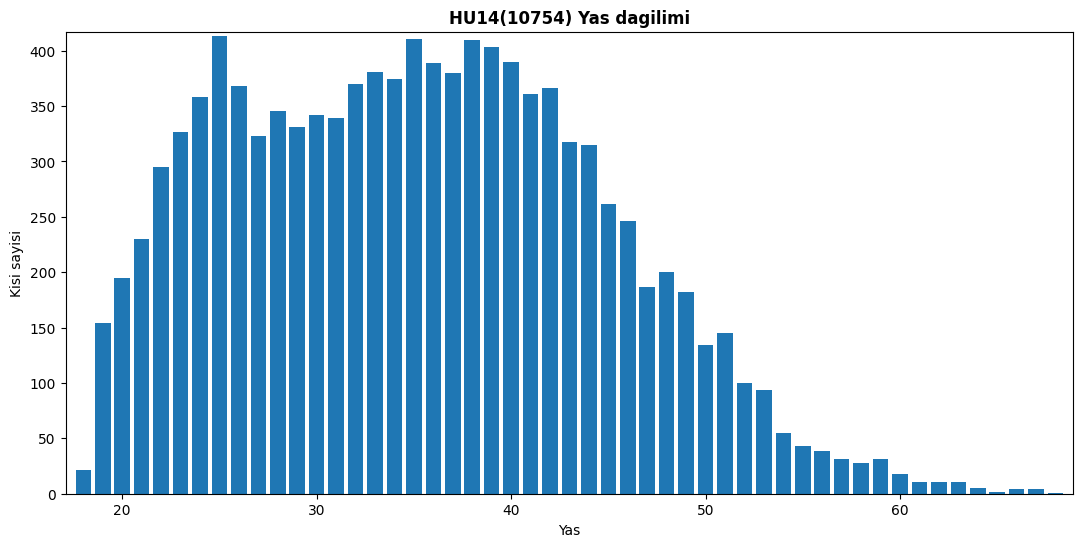


segment:  {105: 4946, 102: 1732, 104: 1707, 103: 1465, 106: 888, 101: 16}
Segment is ok


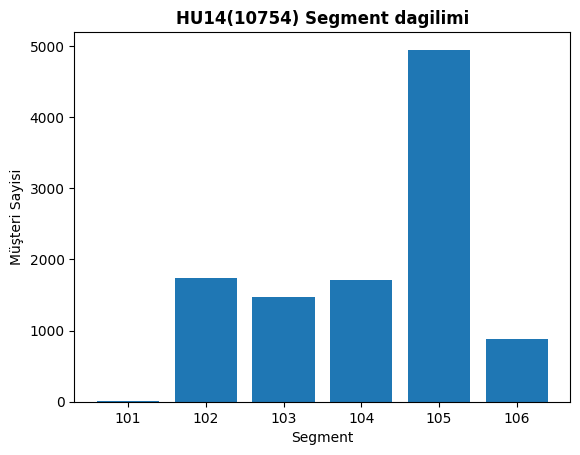


tc:  10630   mavi: 46   yabanci 78
Uyruk is ok!


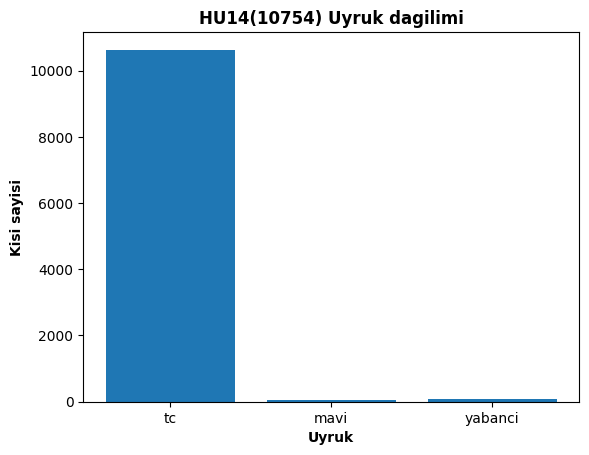


 {'İşçi': 3065, 'Esnaf': 1330, 'Ev Hanımı': 770, 'Tacir ve Esnaf': 586, 'Öğrenci': 515, 'Memur': 382, 'Danışman': 358, 'Öğretmen': 309, 'Mühendis': 266, 'Hizmet Çalışanı': 255, 'Ordu Mensubu': 196, 'İşyeri Sahibi/Ortağı': 172, 'Çiftçi': 155, 'Serbest Meslek': 137, 'Diğer': 126, 'Muhasebe': 103, 'Tüccar': 100, 'Finans Sektörü Çalışan': 93, 'İş Adamı': 92, 'Akademisyen': 87, 'Eczacı': 82, 'Banka': 78, 'Satış': 69, 'Hekim': 67, 'Emekli': 66, 'Avukat': 64, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 64, 'Sağlık Personeli': 60, 'Teknisyen': 57, 'İşsiz': 54, 'Bilinmiyor': 54, 'Mali Müşavir/Muhasebeci': 52, 'Hemşire': 50, 'SSK-Sosyal Sigortalar Kurumu Emeklileri': 48, 'Şoför': 43, 'Satış/Pazarlama Çalışanı': 40, 'Profesyonel Meslek Mensupları': 38, 'Mimar': 37, 'Pazarlama': 37, 'Kamu Çalışanı': 30, 'Teknisyen/Tekniker': 29, 'Doktor': 23, 'Turizmci': 22, 'Aşçı': 22, 'Polis': 21, 'Garson': 21, 'Güvenlik Görevlisi': 20, 'Müteahhit': 20, 'Mali Müşavir': 19, 'Sigorta': 19, 'Emniyet Mensubu': 19

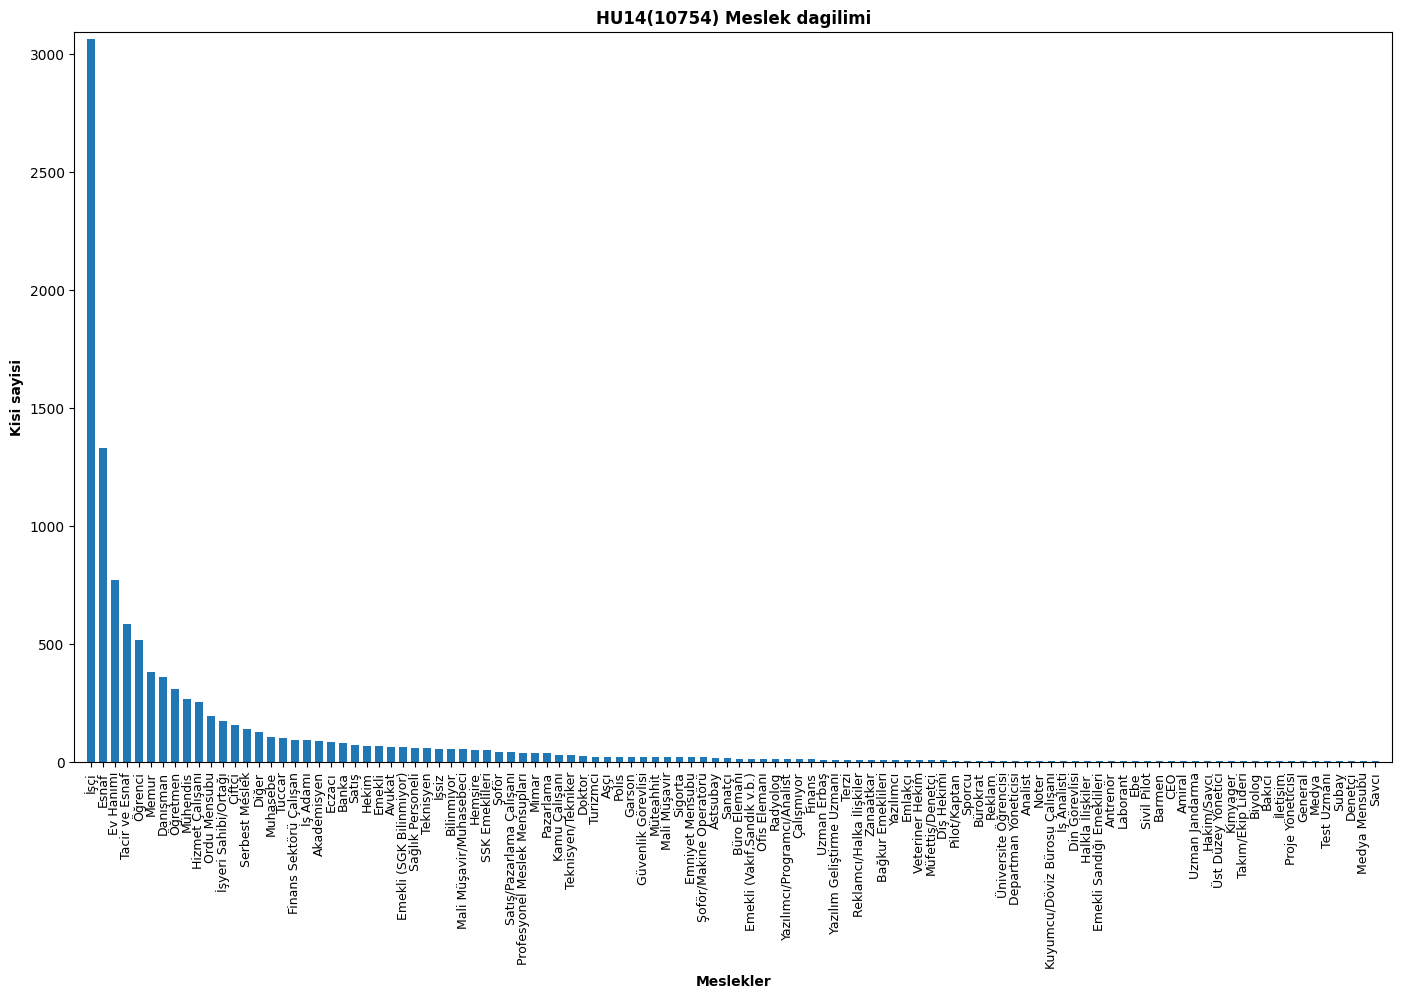


 {'Cesur': 442, 'Temkinli': 387, 'Yetkin': 312, 'Dengeli': 299, 'Bilge': 271}
Yatirim karakteri: Cevap verenlerin orani: % 15.910358936209782


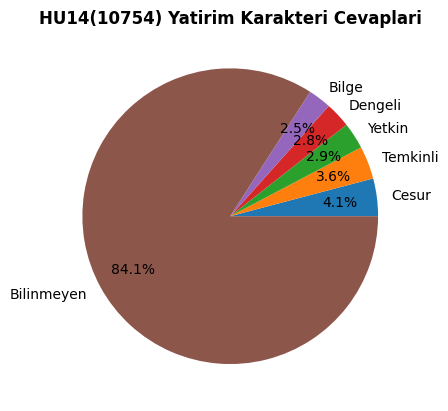


 {'Married': 6587, 'Single': 3610, 'Divorced': 481, 'Widowed': 74}
Medeni hal: Cevap verenlerin orani:  99.98140226892319


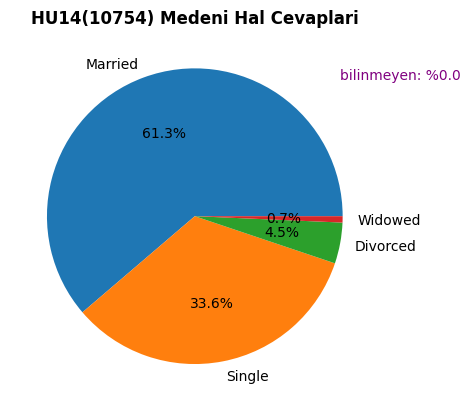


 {'Lise': 5043, 'Lisans': 3999, '(Diğer)': 692, 'İlköğretim': 475, 'Önlisans': 239, 'Yüksek Lisans': 184, 'Doktora': 43}
Egitim: Cevap verenlerin orani: % 99.26538962246606


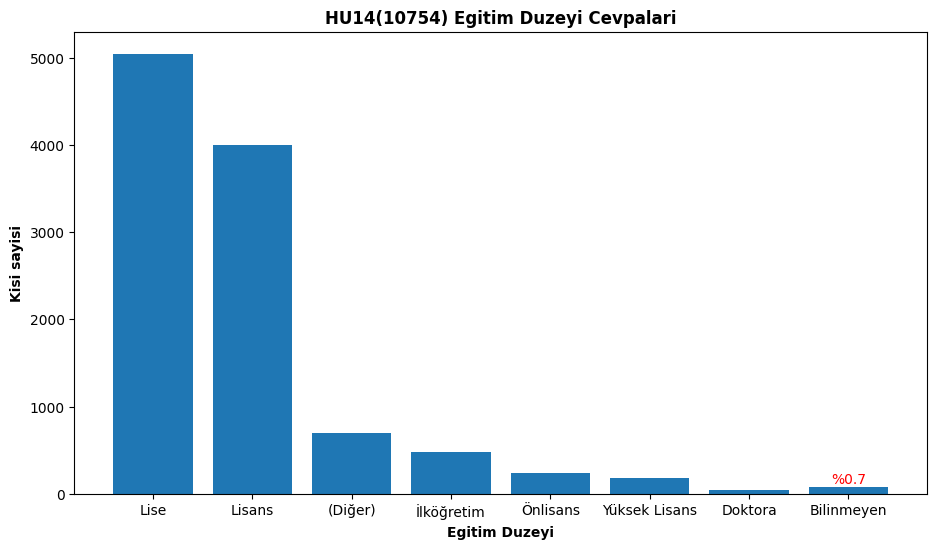


 {0: 2771, '10000': 858, '5000': 791, '15000': 360, '3000': 355, '5000.0': 348, '10000.0': 346, '20000': 344, '8000': 267, '4000': 255, '7000': 251, '6000': 249, '15000.0': 192, '20000.0': 177, '2000': 163, '3000.0': 154, '30000': 135, '4000.0': 127, '6000.0': 111, '0.0': 111, '50000': 109, '8000.0': 105, '7000.0': 100, '1000': 99, '0': 92, '2500': 85, '3500': 77, '30000.0': 77, '25000': 74, '2000.0': 74, '50000.0': 64, '1000.0': 54, '9000': 54, '12000': 47, '7500': 41, '25000.0': 41, '4500': 41, '100000': 39, '40000': 38, '2500.0': 37, '5500': 35, '3500.0': 32, '18000': 28, '9000.0': 26, '5500.0': 23, '18000.0': 22, '1500': 21, '13000': 21, '40000.0': 19, '500': 19, '7500.0': 19, '35000': 18, '1500.0': 18, '12000.0': 17, '16000': 17, '8500': 17, '6500': 17, '1': 16, '150000': 16, '4500.0': 16, '100000.0': 15, '60000': 12, '17000.0': 12, '14000.0': 12, '8500.0': 11, '14000': 11, '100': 11, '35000.0': 11, '500.0': 11, '45000': 9, '3800': 9, '1.0': 9, '4250': 9, '60000.0': 8, '17000': 8

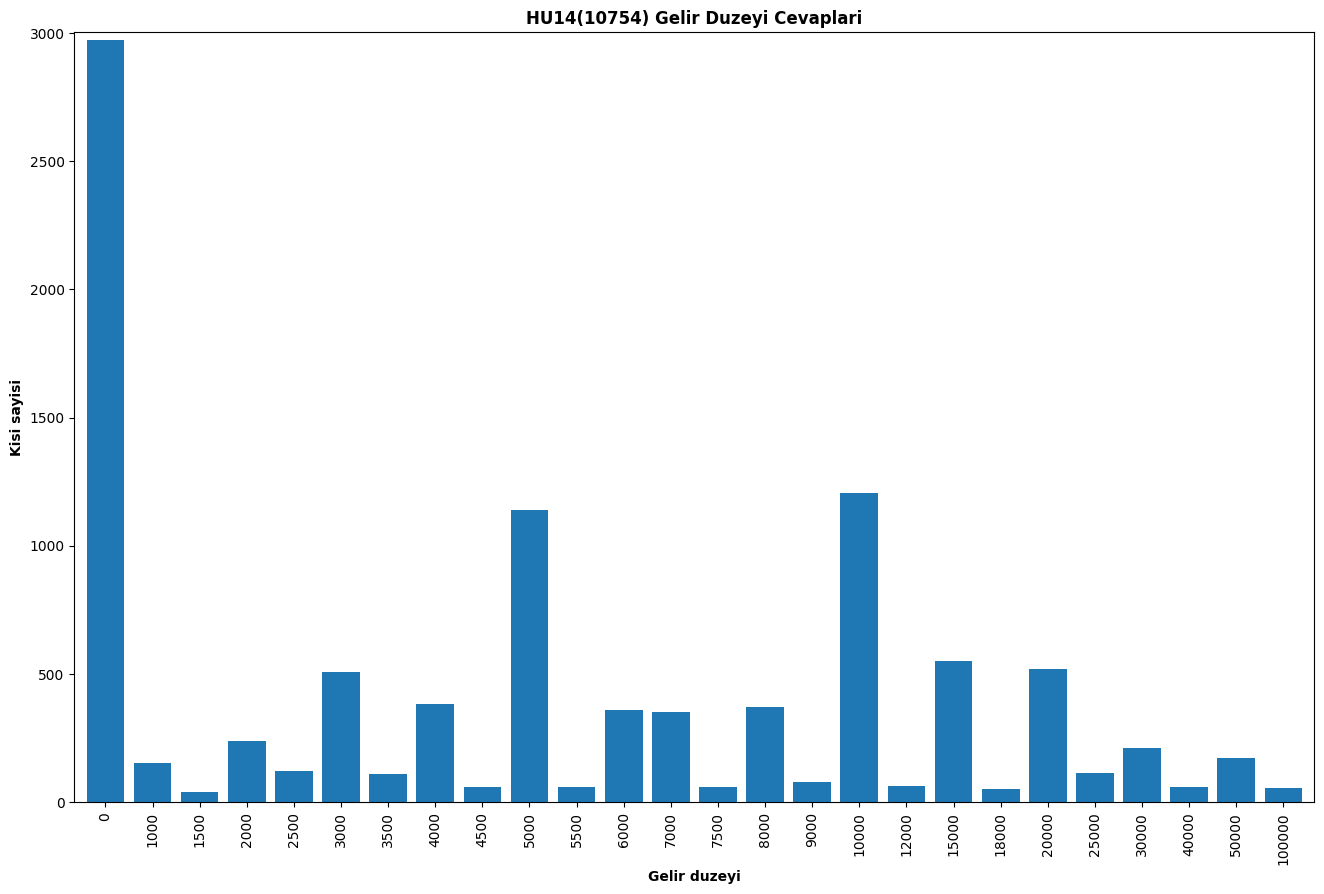


 {0.0: 4173, 1.0: 90, 2.0: 63, 3.0: 6, 4.0: 3}
Cocuk sayisi: Cevap verenlerin orani: % 40
[4173, 90, 63, 6]


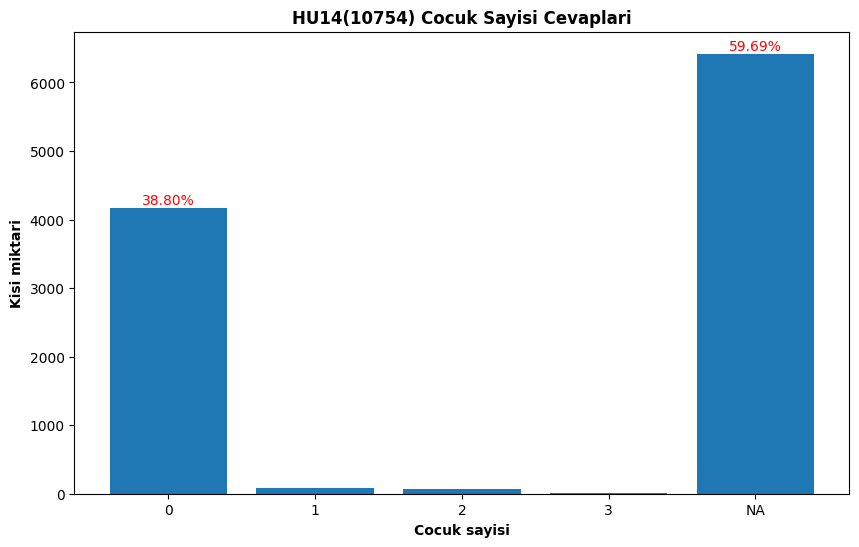

label :  HU15
Satir sayisi:  415 , Kolon sayisi:  100
dict_keys([1, 2])

Erkek sayisi:  153
Kadin sayisi:  262
Cinsiyet is ok!


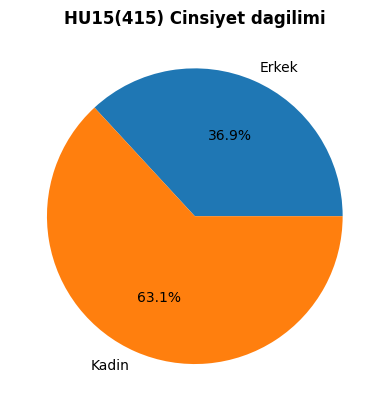


yas:  {41: 28, 40: 27, 37: 21, 45: 20, 46: 18, 42: 18, 36: 18, 39: 17, 47: 17, 38: 17, 43: 16, 44: 16, 31: 14, 48: 13, 35: 13, 34: 11, 49: 10, 33: 10, 32: 9, 29: 9, 28: 9, 54: 8, 27: 7, 52: 7, 53: 7, 30: 6, 26: 6, 50: 6, 51: 6, 25: 5, 24: 5, 19: 4, 20: 4, 22: 4, 55: 2, 58: 2, 56: 1, 60: 1, 23: 1, 18: 1, 21: 1}
yas is ok


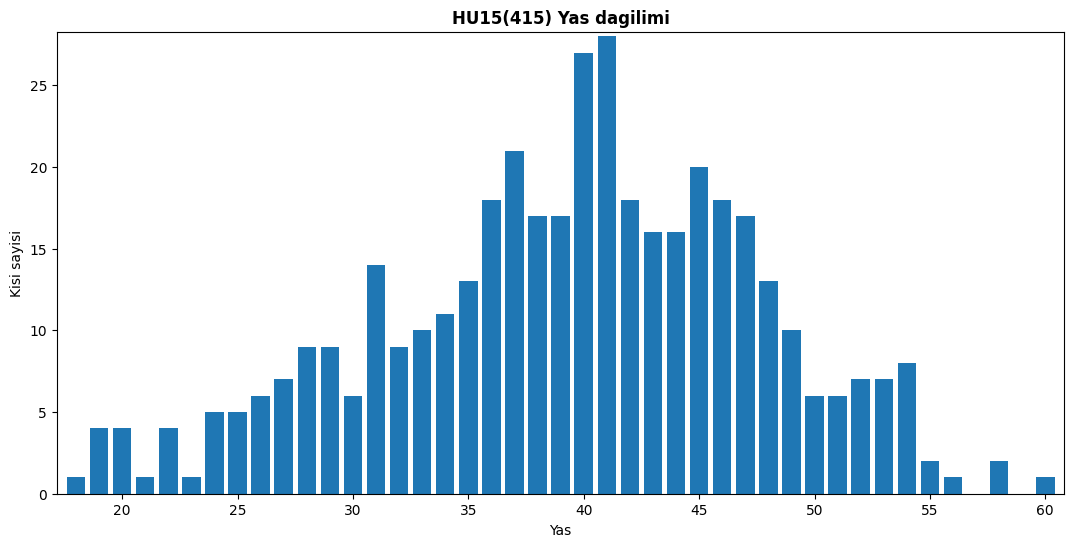


segment:  {102: 146, 104: 95, 105: 85, 103: 78, 106: 11}
Segment is ok


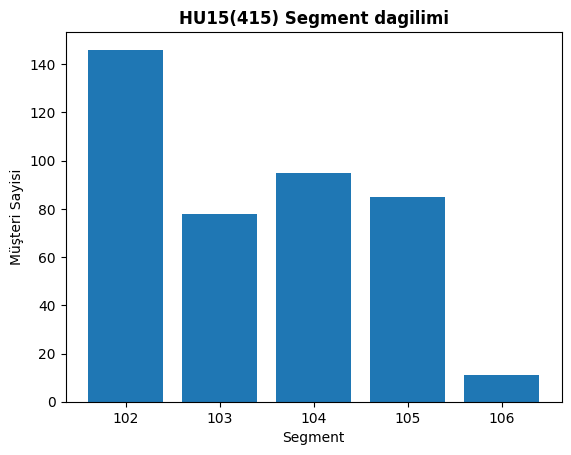


tc:  412   mavi: 2   yabanci 1
Uyruk is ok!


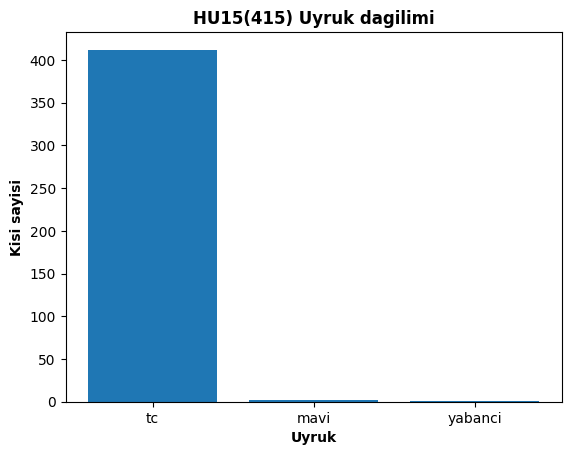


 {'İşçi': 53, 'Diğer': 37, 'Öğrenci': 29, 'Öğretmen': 29, 'Memur': 29, 'Ev Hanımı': 22, 'Mühendis': 20, 'Banka': 19, 'Finans Sektörü Çalışan': 16, 'Esnaf': 13, 'Danışman': 11, 'Akademisyen': 10, 'Serbest Meslek': 8, 'Mimar': 8, 'Hekim': 7, 'Hizmet Çalışanı': 5, 'Sigorta': 5, 'Eczacı': 5, 'Tacir ve Esnaf': 4, 'Avukat': 4, 'Pazarlama': 4, 'Emekli': 4, 'Satış': 3, 'Mali Müşavir/Muhasebeci': 3, 'İşyeri Sahibi/Ortağı': 2, 'Turizmci': 2, 'Satış/Pazarlama Çalışanı': 2, 'Teknisyen': 2, 'Tüccar': 2, 'Doktor': 2, 'Muhasebe': 2, 'Terzi': 2, 'Sağlık Personeli': 2, 'Profesyonel Meslek Mensupları': 2, 'Test Uzmanı': 1, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 1, 'Halkla İlişkiler ': 1, 'Kamu Çalışanı': 1, 'Büro Elemanı': 1, 'Emekli (Vakıf,Sandık v.b.)': 1, 'İşsiz': 1, 'Yazılımcı': 1, 'Mali Müşavir': 1, 'Çalışmıyor': 1, 'Departman Yöneticisi': 1, 'Çiftçi': 1, 'CEO': 1, 'Pilot/Kaptan': 1, 'Teknisyen/Tekniker': 1, 'Hemşire': 1}
['İşçi', 'Diğer', 'Öğrenci', 'Öğretmen', 'Memur', 'Ev Hanımı', 'Mühen

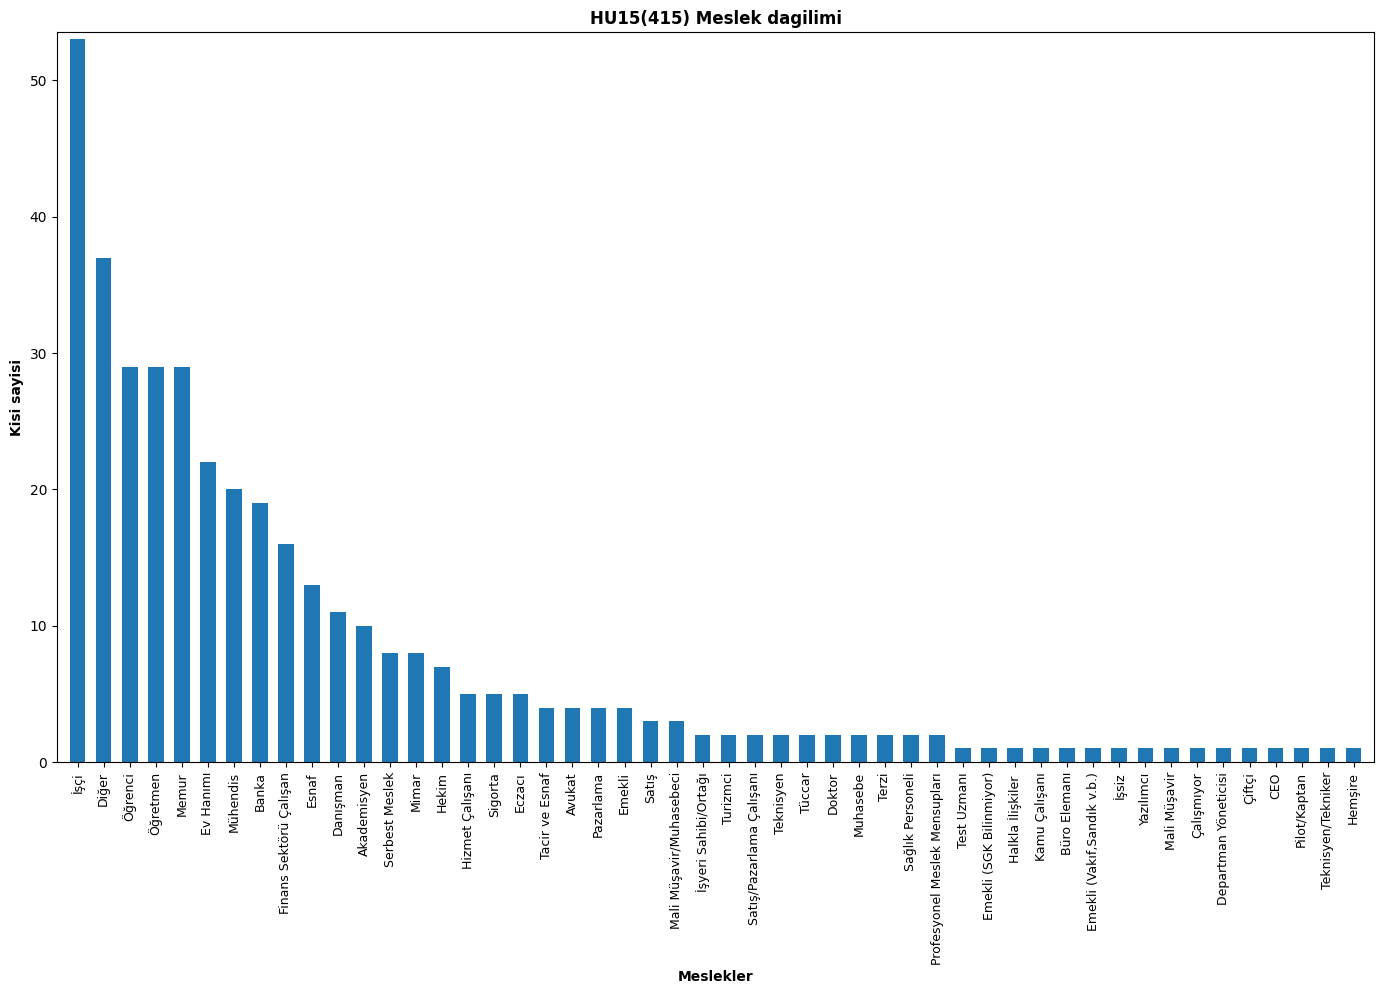


 {'Cesur': 38, 'Dengeli': 32, 'Bilge': 27, 'Temkinli': 24, 'Yetkin': 9}
Yatirim karakteri: Cevap verenlerin orani: % 31.325301204819276


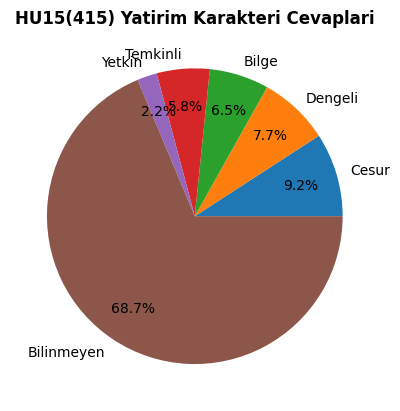


 {'Married': 248, 'Single': 149, 'Divorced': 13, 'Widowed': 4}
Medeni hal: Cevap verenlerin orani:  99.75903614457832


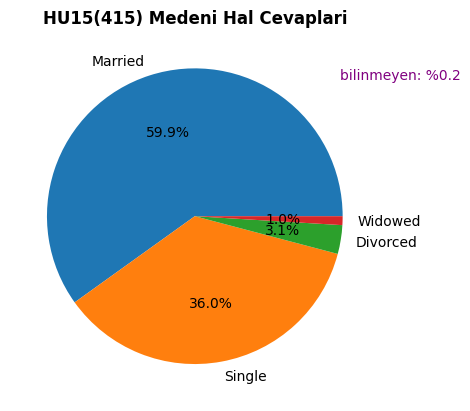


 {'Lisans': 238, 'Lise': 60, '(Diğer)': 28, 'Yüksek Lisans': 27, 'Önlisans': 11, 'Doktora': 7, 'İlköğretim': 4}
Egitim: Cevap verenlerin orani: % 90.36144578313252


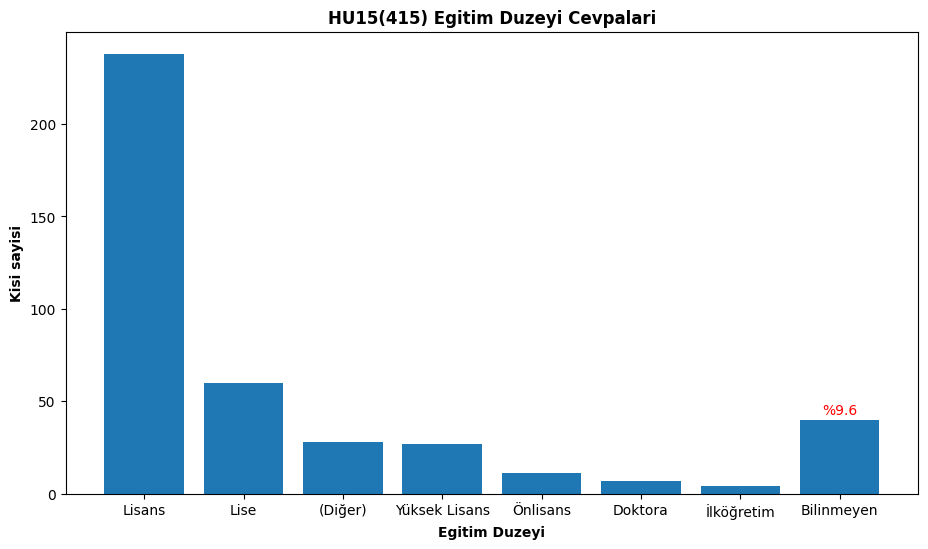


 {0: 46, '0': 40, '5000': 20, '4000': 20, '3000': 19, '0.0': 19, '10000': 16, '2000': 12, '20000.0': 11, '1000': 11, '5000.0': 11, '2500': 10, '1500': 9, '2000.0': 8, '10000.0': 8, '7000': 7, '6000': 6, '3000.0': 6, '1': 6, '20000': 6, '8000.0': 5, '1000.0': 5, '1500.0': 5, '500': 5, '4000.0': 5, '15000.0': 4, '15000': 4, '50000.0': 4, '3500': 3, '750': 3, '6000.0': 3, '8000': 3, '1800': 3, '500.0': 3, '30000.0': 3, '30000': 3, '600': 2, '12000.0': 2, '7500': 2, '12000': 2, '1.0': 2, '9000': 2, '100000.0': 2, '2200': 2, '100': 2, '17000': 2, '1600': 2, '1950.0': 1, '2600': 1, '200.0': 1, '7500.0': 1, '4800': 1, '1200.0': 1, '7200': 1, '100000': 1, '700': 1, '400.0': 1, '2500.0': 1, '40000': 1, '25000': 1, '35000': 1, '2072.0': 1, '3300': 1, '140000': 1, '13000.0': 1, '4600.0': 1, '200': 1, '4200': 1, '18000': 1, '800': 1, '4500': 1, '25000.0': 1, '750.0': 1, '60000': 1, '75000.0': 1, '2400': 1, '26000': 1, '5.5': 1, '3250': 1, '1200': 1, '40000.0': 1, '2300': 1, '4040.0': 1, '9500.0':

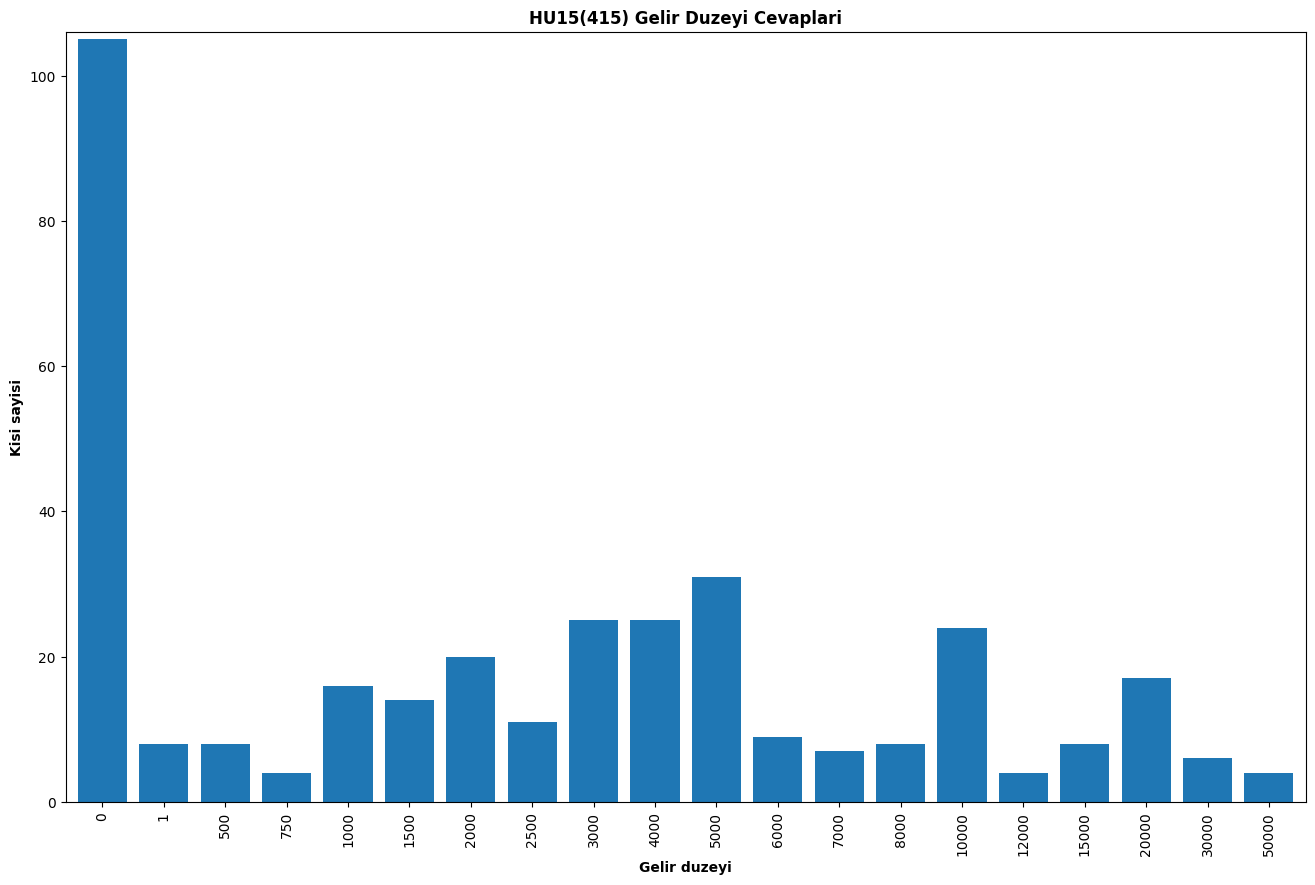


 {0.0: 315, 1.0: 16, 2.0: 11}
Cocuk sayisi: Cevap verenlerin orani: % 82
[315, 16, 11]


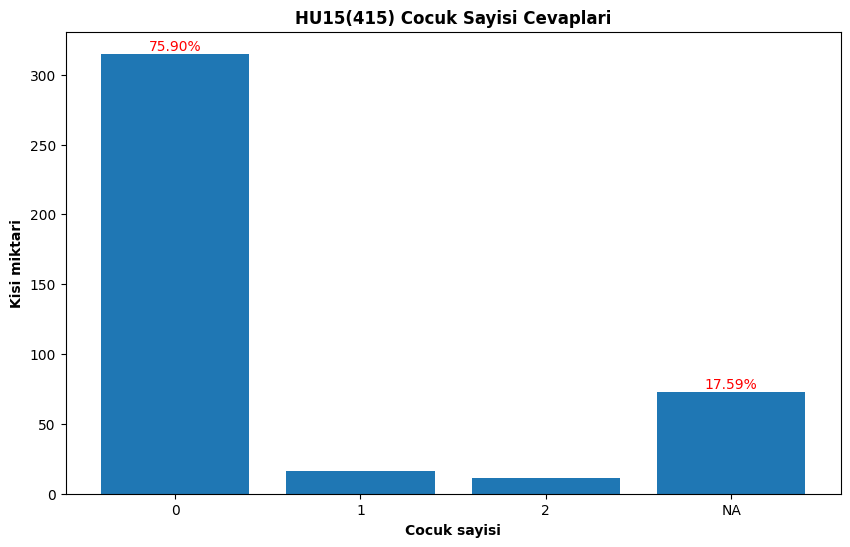

label :  HU19
Satir sayisi:  759 , Kolon sayisi:  100
dict_keys([1, 2])

Erkek sayisi:  618
Kadin sayisi:  141
Cinsiyet is ok!


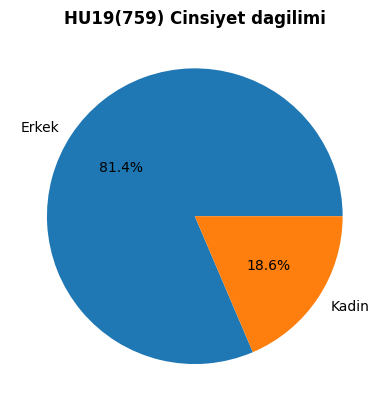


yas:  {43: 36, 38: 33, 40: 32, 33: 31, 37: 31, 41: 30, 30: 29, 23: 28, 42: 27, 28: 27, 36: 26, 34: 26, 22: 25, 39: 25, 32: 22, 24: 21, 35: 21, 47: 21, 45: 19, 31: 18, 26: 17, 46: 17, 44: 17, 29: 17, 27: 16, 25: 15, 50: 14, 49: 14, 48: 13, 20: 12, 21: 12, 51: 12, 52: 11, 53: 8, 19: 6, 56: 6, 55: 5, 54: 5, 58: 4, 57: 4, 18: 1, 60: 1, 62: 1, 59: 1, 63: 1, 61: 1}
yas is ok



segment:  {105: 196, 104: 188, 102: 174, 103: 149, 106: 51, 101: 1}
Segment is ok



tc:  757   mavi: 0   yabanci 2
Uyruk is ok!


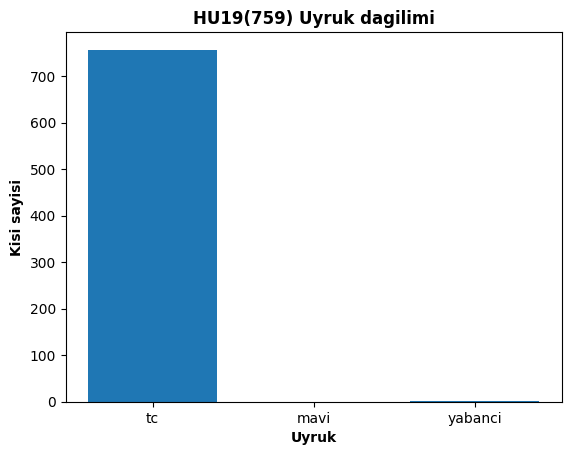


 {'Tacir ve Esnaf': 210, 'İşçi': 187, 'Esnaf': 81, 'Hizmet Çalışanı': 40, 'İşyeri Sahibi/Ortağı': 31, 'Ordu Mensubu': 30, 'Ev Hanımı': 18, 'Danışman': 17, 'Çiftçi': 14, 'Tüccar': 12, 'Diğer': 9, 'Memur': 8, 'Profesyonel Meslek Mensupları': 7, 'Öğretmen': 7, 'Mühendis': 6, 'Satış/Pazarlama Çalışanı': 6, 'Eczacı': 6, 'Teknisyen/Tekniker': 6, 'Sağlık Personeli': 5, 'Serbest Meslek': 4, 'Öğrenci': 4, 'Müfettiş/Denetçi': 3, 'Doktor': 3, 'İş Adamı': 3, 'Turizmci': 3, 'Finans Sektörü Çalışan': 3, 'Şoför/Makine Operatörü': 2, 'Mimar': 2, 'Hekim': 2, 'Hemşire': 2, 'Akademisyen': 2, 'SSK-Sosyal Sigortalar Kurumu Emeklileri': 2, 'Muhasebe': 2, 'Pazarlama': 2, 'Mali Müşavir/Muhasebeci': 2, 'Banka': 2, 'Bilinmiyor': 2, 'Avukat': 2, 'Satış': 2, 'Emekli': 1, 'Kamu Çalışanı': 1, 'Emlakçı': 1, 'Müteahhit': 1, 'Medya Mensubu': 1, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 1, 'Mali Müşavir': 1}
['Tacir ve Esnaf', 'İşçi', 'Esnaf', 'Hizmet Çalışanı', 'İşyeri Sahibi/Ortağı', 'Ordu Mensubu', 'Ev Hanımı',


 {'Cesur': 32, 'Bilge': 18, 'Temkinli': 17, 'Yetkin': 16, 'Dengeli': 15}
Yatirim karakteri: Cevap verenlerin orani: % 12.911725955204217



 {'Married': 512, 'Single': 211, 'Divorced': 35, 'Widowed': 1}
Medeni hal: Cevap verenlerin orani:  100.0
tam


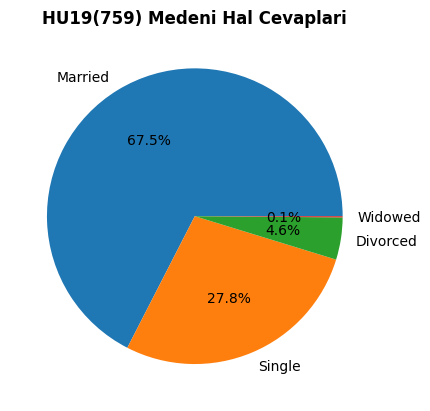


 {'Lise': 439, 'Lisans': 168, '(Diğer)': 107, 'İlköğretim': 26, 'Önlisans': 12, 'Yüksek Lisans': 1}
Egitim: Cevap verenlerin orani: % 99.2094861660079


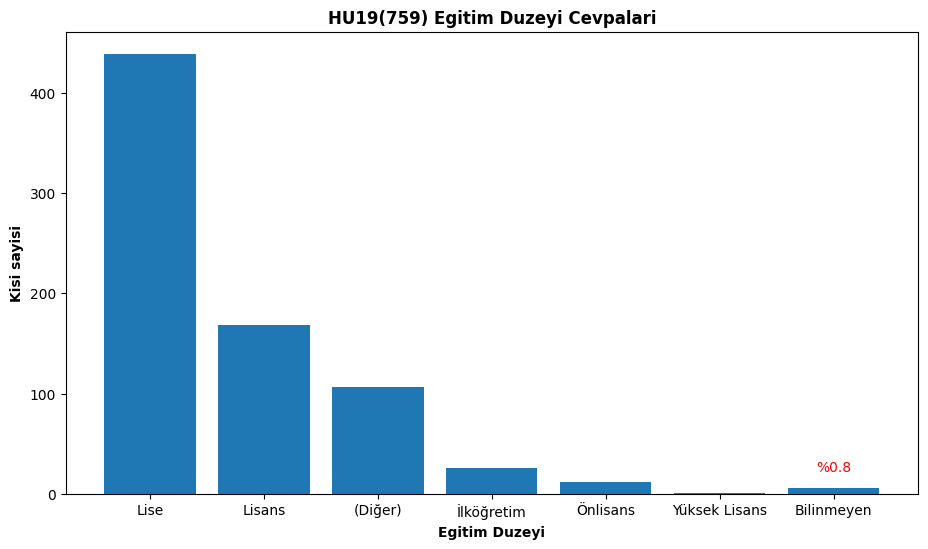


 {0: 202, '10000': 52, '5000': 42, '20000': 40, '15000': 32, '5000.0': 22, '2000': 21, '3000': 20, '20000.0': 18, '7000': 17, '30000': 17, '0.0': 15, '15000.0': 15, '10000.0': 14, '4000': 14, '3000.0': 12, '0': 12, '6000': 12, '25000': 11, '50000': 10, '7000.0': 8, '8000': 7, '50000.0': 7, '6000.0': 7, '30000.0': 7, '25000.0': 6, '1000': 6, '2000.0': 5, '3500': 5, '100000.0': 4, '4000.0': 4, '18000': 4, '40000': 4, '7500': 3, '4500': 3, '2500': 3, '1000.0': 3, '9000.0': 3, '18000.0': 3, '8000.0': 3, '5500.0': 2, '1.0': 2, '12000': 2, '1500': 2, '100000': 2, '3500.0': 2, '27000': 2, '9400': 1, '45000': 1, '37000': 1, '8500.0': 1, '35000.0': 1, '22500': 1, '20618.0': 1, '532286.0': 1, '7500000.0': 1, '1600.0': 1, '2500.0': 1, '120000.0': 1, '500000.0': 1, '60000.0': 1, '11520': 1, '55000.0': 1, '32000': 1, '40000.0': 1, '1800': 1, '4250.0': 1, '80000': 1, '1000000.0': 1, '1500.0': 1, '8200': 1, '17000': 1, '150000.0': 1, '1': 1, '12500.0': 1, '1253488.0': 1, '15600.0': 1, '13000.0': 1, 

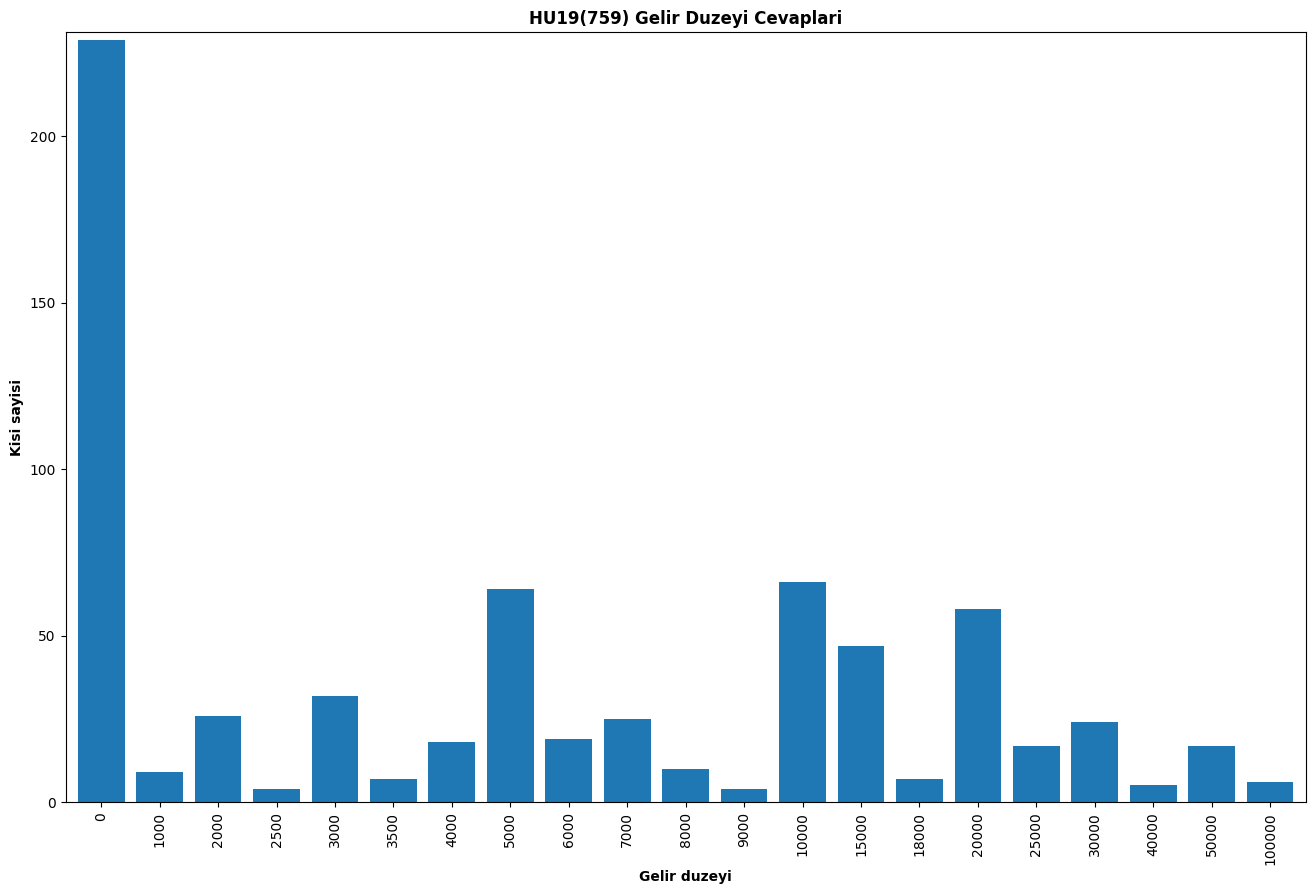


 {0.0: 303, 1.0: 6, 2.0: 4, 3.0: 2}
Cocuk sayisi: Cevap verenlerin orani: % 41
[303, 6, 4]


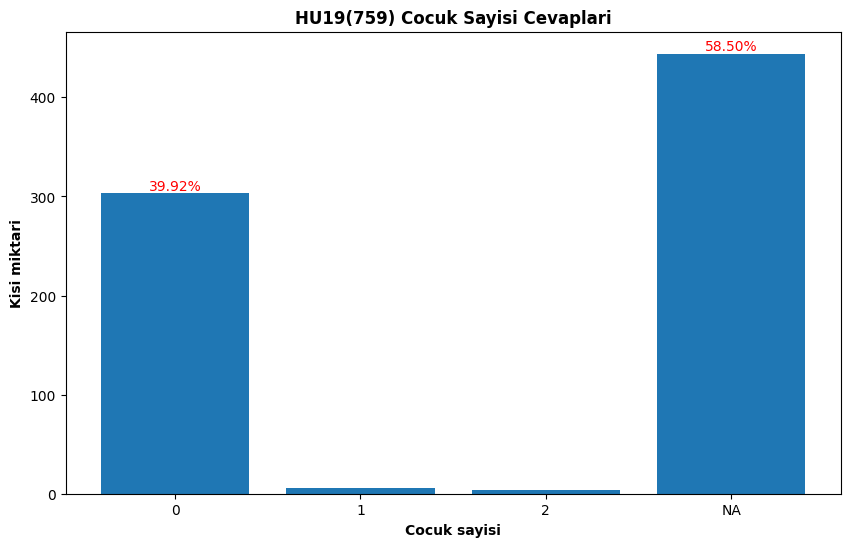

label :  UA
Satir sayisi:  832770 , Kolon sayisi:  100
dict_keys([1, 2])

Erkek sayisi:  420401
Kadin sayisi:  412369
Cinsiyet is ok!


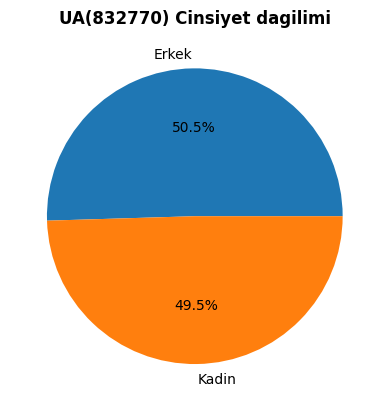


yas:  {42: 24040, 43: 23542, 41: 22899, 44: 22268, 45: 21917, 39: 21327, 46: 21256, 40: 21145, 38: 20477, 49: 19962, 37: 19680, 47: 18886, 36: 18839, 48: 18587, 35: 18060, 50: 17565, 51: 16996, 34: 16898, 33: 16231, 52: 15956, 53: 15326, 32: 15189, 31: 14403, 54: 14392, 30: 13706, 29: 13206, 28: 12899, 26: 12288, 27: 12268, 25: 11974, 55: 11785, 57: 11083, 3: 10529, 4: 10508, 24: 10502, 2: 10444, 58: 10376, 5: 10308, 6: 10193, 7: 9970, 8: 9720, 56: 9510, 23: 9381, 9: 9319, 1: 9095, 59: 8510, 10: 8475, 11: 8089, 22: 7796, 12: 7372, 60: 7070, 13: 6907, 14: 6589, 61: 6364, 15: 6193, 21: 6099, 63: 5830, 16: 5383, 62: 5283, 17: 4548, 20: 4473, 64: 4346, 18: 4211, 19: 3914, 67: 3666, 65: 3546, 0: 3417, 66: 3139, 68: 2813, 69: 2290, 70: 1925, 71: 1655, 73: 1509, 72: 1349, 74: 1009, 75: 804, 76: 634, 77: 546, 78: 450, 79: 371, 80: 272, 81: 244, 82: 170, 84: 132, 83: 131, 85: 99, 86: 66, 87: 49, 88: 31, 90: 21, 91: 20, 89: 19, 93: 13, 95: 5, 92: 4, 94: 3, 99: 2, 101: 2, 98: 2, 96: 2, 122: 1, 1

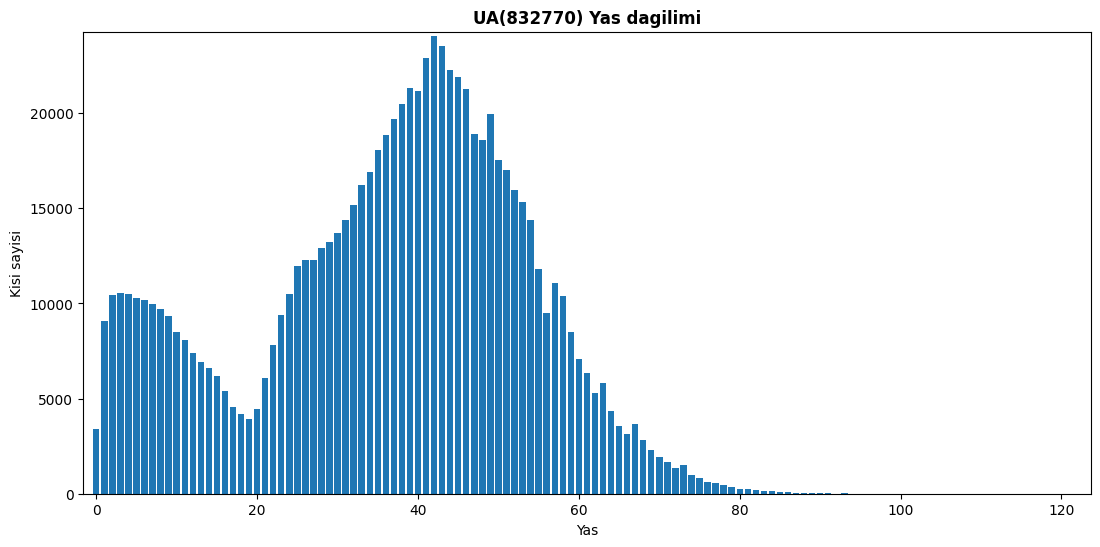


segment:  {106: 368578, 105: 189006, 102: 102893, 103: 85825, 104: 85756, 101: 712}
Segment is ok


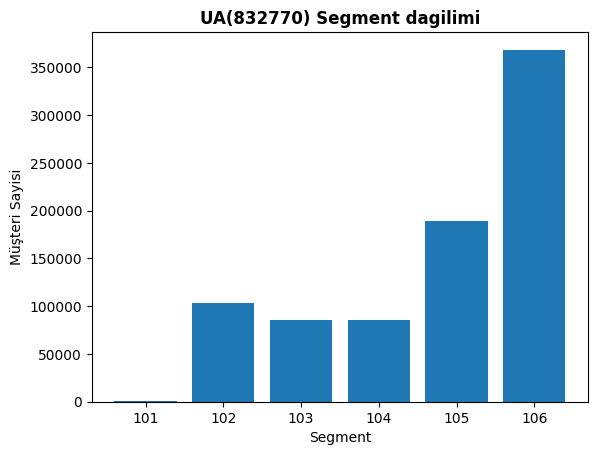


tc:  828576   mavi: 2489   yabanci 1705
Uyruk is ok!


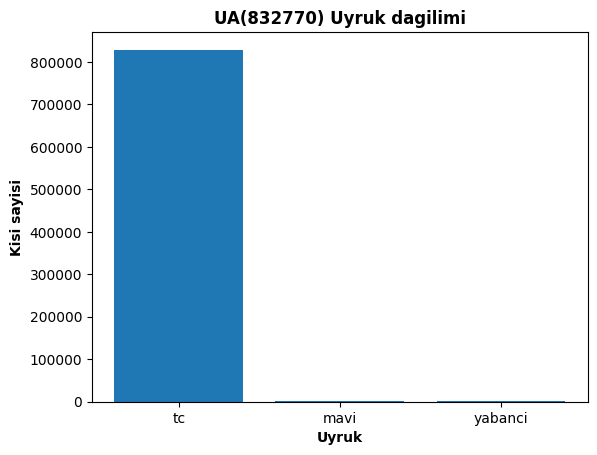


 {'İşçi': 133273, 'Öğrenci': 101459, 'Ev Hanımı': 100144, 'Diğer': 97465, 'Öğretmen': 33174, 'Memur': 28852, 'Esnaf': 28271, 'Serbest Meslek': 26977, 'Mühendis': 18248, 'Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)': 12796, 'Danışman': 8290, 'SSK-Sosyal Sigortalar Kurumu Emeklileri': 8201, 'Emekli': 7699, 'Akademisyen': 7243, 'Banka': 7048, 'Hekim': 6141, 'Ordu Mensubu': 6048, 'Tacir ve Esnaf': 5393, 'Çiftçi': 5311, 'Hemşire': 5204, 'Muhasebe': 4757, 'Hizmet Çalışanı': 4733, 'Avukat': 4214, 'Eczacı': 4193, 'Satış': 4060, 'Teknisyen': 3983, 'Emekli (Vakıf,Sandık v.b.)': 3504, 'Terzi': 3430, 'Finans Sektörü Çalışan': 2956, 'İş Adamı': 2805, 'İşyeri Sahibi/Ortağı': 2754, 'Tüccar': 2408, 'Polis': 2385, 'Kamu Çalışanı': 2366, 'Astsubay': 2239, 'Mimar': 2138, 'Sağlık Personeli': 2093, 'Bilinmiyor': 2033, 'İşsiz': 1992, 'Ofis Elemanı': 1960, 'Profesyonel Meslek Mensupları': 1870, 'Emekli Sandığı Emeklileri': 1870, 'Mali Müşavir/Muhasebeci': 1825, 'Şoför': 1686, 'Sigorta': 1574, 'Büro Elemanı':

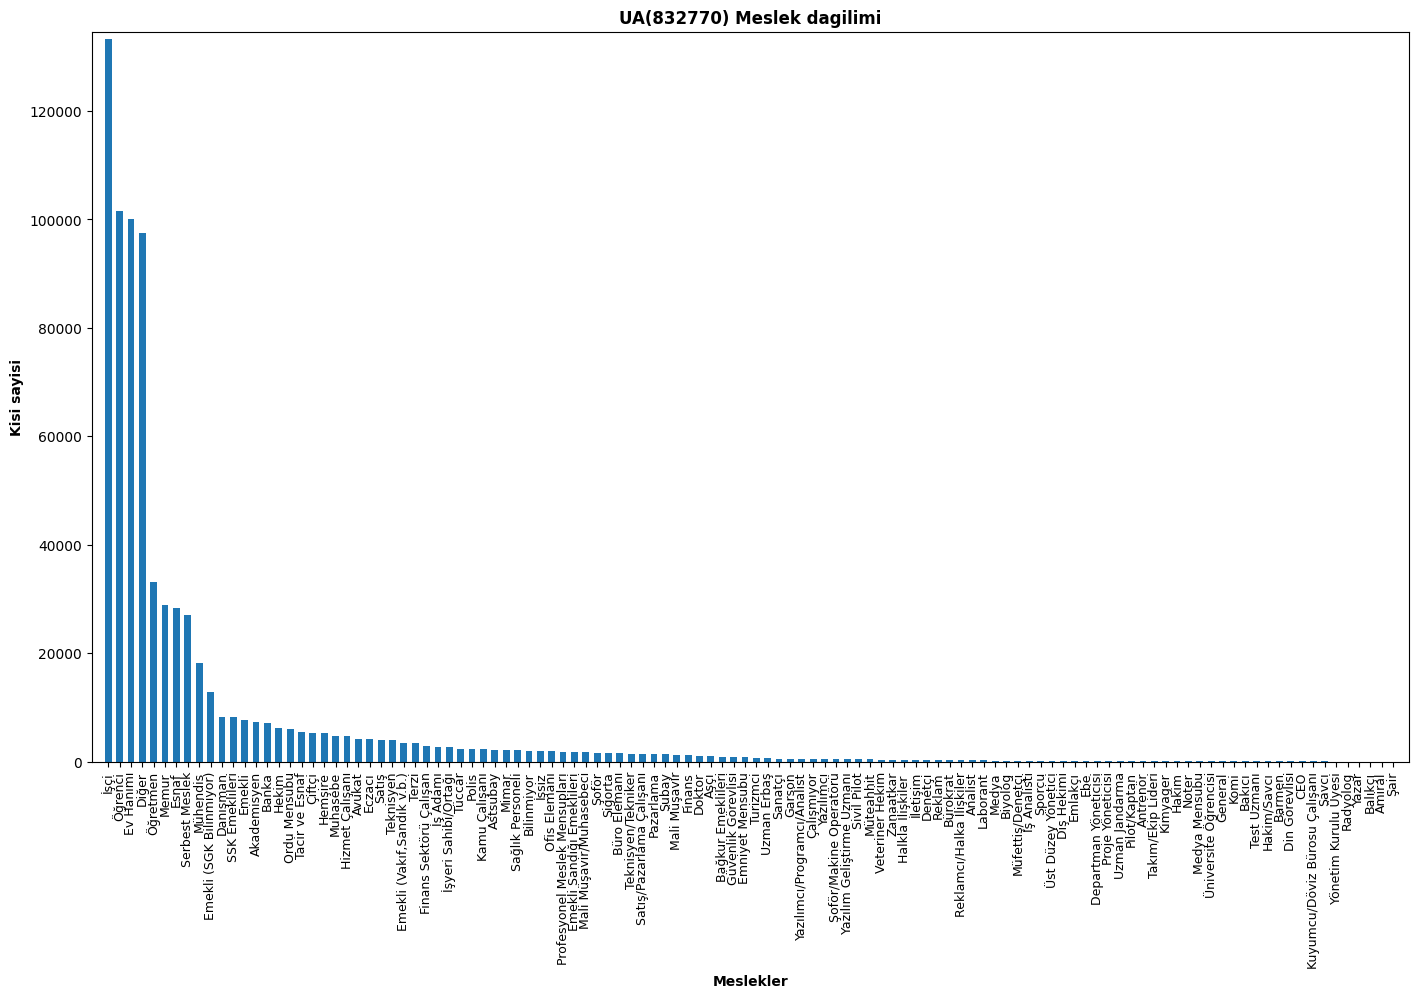


 {'Temkinli': 34608, 'Cesur': 32401, 'Dengeli': 25560, 'Yetkin': 18848, 'Bilge': 17848}
Yatirim karakteri: Cevap verenlerin orani: % 15.522293070115397


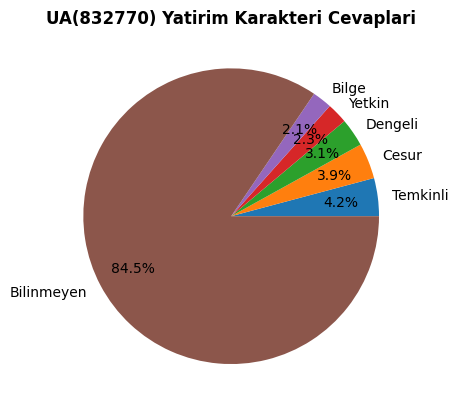


 {'Married': 464072, 'Single': 336012, 'Divorced': 24218, 'Widowed': 6672, 'Other': 14, 'Marriage Cancelled': 6, 'Marriage Annulled': 2}
Medeni hal: Cevap verenlerin orani:  99.78697599577315


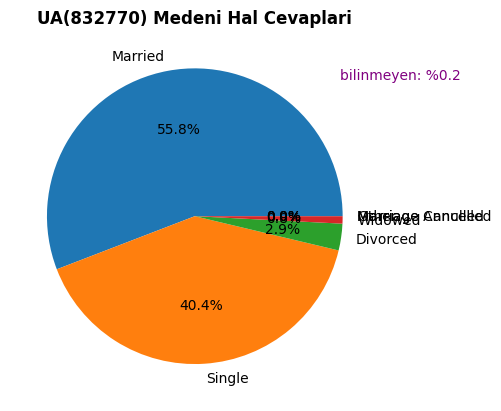


 {'Lise': 232415, 'Lisans': 204131, '(Diğer)': 134693, 'İlköğretim': 96912, 'Yüksek Lisans': 18716, 'Önlisans': 15440, 'Doktora': 3658}
Egitim: Cevap verenlerin orani: % 84.77310662007517


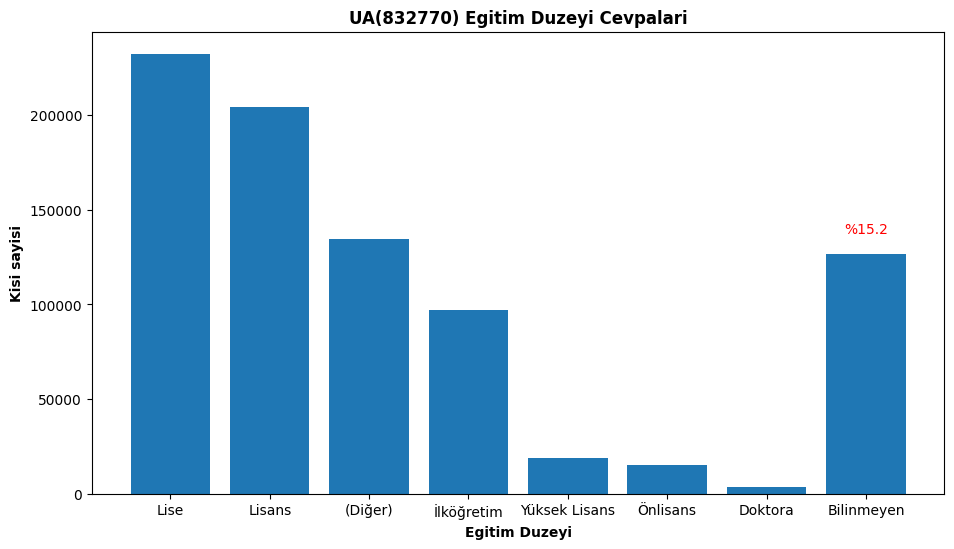


 {0: 272668, '0': 64389, '2000': 39144, '3000': 36659, '5000': 36605, '1000': 28425, '0.0': 26624, '10000': 21337, '4000': 18692, '1500': 15201, '5000.0': 14338, '2000.0': 14328, '2500': 13949, '3000.0': 13791, '1000.0': 10160, '10000.0': 9706, '15000': 9074, '500': 8420, '6000': 8293, '20000': 7371, '7000': 7339, '4000.0': 7141, '3500': 6642, '8000': 5806, '1': 5715, '1500.0': 5399, '2500.0': 5141, '15000.0': 5053, '20000.0': 4266, '6000.0': 3669, '7000.0': 3279, '500.0': 3042, '30000': 2728, '4500': 2721, '8000.0': 2610, '3500.0': 2570, '1200': 2442, '1.0': 2203, '50000': 2131, '30000.0': 2019, '100': 1973, '25000': 1882, '50000.0': 1581, '1800': 1570, '25000.0': 1569, '7500': 1527, '12000': 1526, '9000': 1337, '800': 1301, '12000.0': 1203, '4500.0': 1193, '1300': 1188, '300': 1121, '5500': 1109, '600': 1044, '40000': 1038, '2800': 1014, '1600': 983, '7500.0': 978, '9000.0': 923, '1200.0': 911, '40000.0': 874, '200': 850, '700': 822, '750': 820, '5500.0': 818, '18000': 801, '8500': 

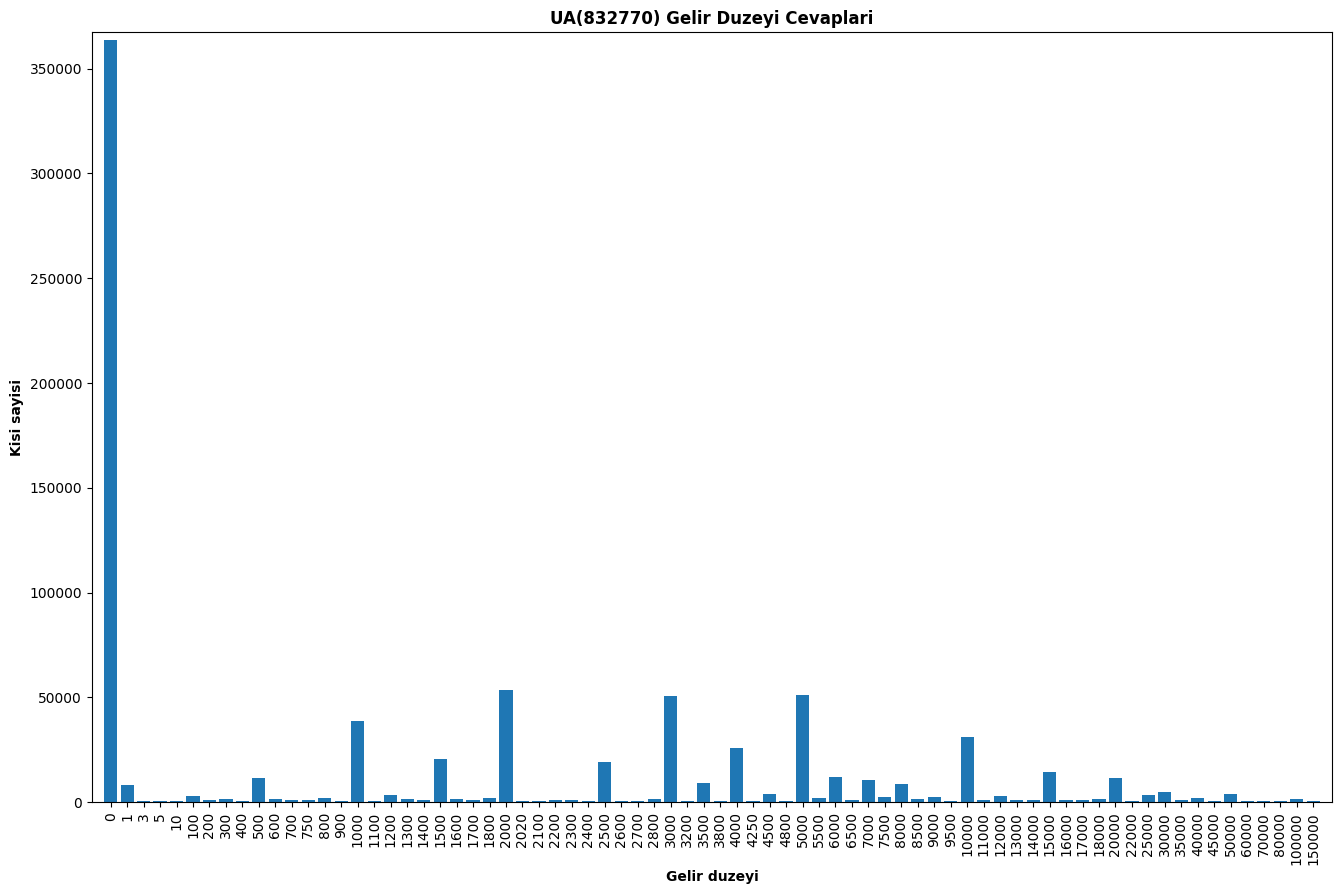


 {0.0: 402788, 2.0: 10593, 1.0: 10009, 3.0: 2899, 4.0: 749, 5.0: 259, 6.0: 89, 7.0: 36, 8.0: 18, 10.0: 8, 9.0: 3, 11.0: 2, 3000.0: 1, 14.0: 1, 20.0: 1, 21.0: 1}
Cocuk sayisi: Cevap verenlerin orani: % 51
[402788, 10009, 10593, 2899, 749, 259, 89, 36, 18, 8]


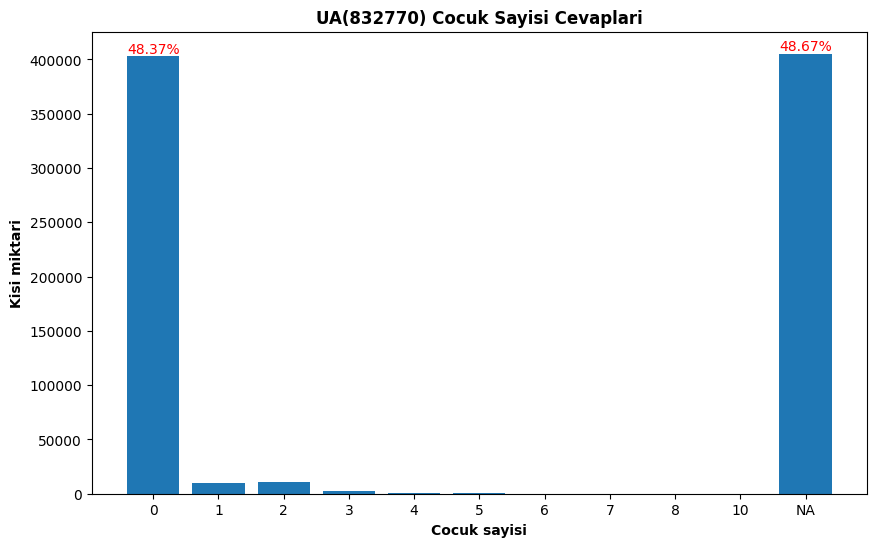

In [52]:
# 11-) labele ozel veri olusturma 3 - okkes

label_HU19_meslek = {} # bu sekil her farkli sigortanin farkli özelliklerini ayri dict'lerde toplayalim

for label, group in labeldata["HU19"].groupby('PP_MESLEK'):
    label_HU19_meslek[label] = group

# sutun analiz ve grafik fonksiyonu
# fonksiyon parametre olarak veri icin bir sigortanin grubunu(ornegin HU19'un grubunu labeldata'dan verebiliriz) alir

# fonksiyon aldigi grubu, ozellikleri(meslek, yas, medeni_hal, cocuk_sayisi, baska hangi BES'i aldiklari vs.) acisindan
# analiz edip bize hepsi icin bir dict dondurebilir ya da direk grafik olusturabilir (ya da ikisi birden)
def column_analyse_tograph_complete(data: pd.DataFrame, name: str):

    if not os.path.exists("graphs"):
        os.makedirs("graphs")
        print("images klasörü olustu")
    
    if not os.path.exists("./graphs/{}".format(name)):
        os.makedirs("./graphs/{}".format(name))
        print("names klasoru olustu")
    
    group_satir_sayisi = data.shape[0]
    group_kolon_sayisi = data.shape[1]
    print("Satir sayisi: ", group_satir_sayisi, ", Kolon sayisi: ", group_kolon_sayisi)

    
    # cinsiyet analizi
    cinsiyet = {}
    for label, group in data.groupby("PP_CINSIYET"):
        cinsiyet[label] = group
    print(cinsiyet.keys())

    """if (list(cinsiyet.values())[0] == 1):
        group_erkek_sayisi = list(cinsiyet.values())[0].__len__()
        if (list(cinsiyet.values())[1] == 2):
            group_kadin_sayisi = list(cinsiyet.values())[1].__len__()
        else:
            group_kadin_sayisi = 0
    elif(list(cinsiyet.values())[0] == 1):
        group_kadin_sayisi = list(cinsiyet.values())[0].__len__()
        group_erkek_sayisi = 0
    else:
        print("ERROR: VERİDE BÜYÜK HATA VAR !!!!!!!!")"""
    first_group = list(cinsiyet.values())[0]

    if 1 in first_group["PP_CINSIYET"].values:
        group_erkek_sayisi = len(first_group)
        if 2 in cinsiyet:
            group_kadin_sayisi = len(cinsiyet[2])
        else:
            group_kadin_sayisi = 0
    elif 2 in first_group["PP_CINSIYET"].values:
        group_kadin_sayisi = len(first_group)
        group_erkek_sayisi = 0
    else:
        print("ERROR: VERİDE BÜYÜK HATA VAR !!!!!!!!")
    
    #group_kadin_sayisi = list(cinsiyet.values())[1].__len__()
    print("\nErkek sayisi: ",group_erkek_sayisi)
    print("Kadin sayisi: ",group_kadin_sayisi)
    if (group_erkek_sayisi + group_kadin_sayisi == group_satir_sayisi):
        print("Cinsiyet is ok!")
        plt.pie([group_erkek_sayisi, group_kadin_sayisi], labels=["Erkek", "Kadin"], autopct='%1.1f%%')
        plt.title("{}({}) Cinsiyet dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_cinsiyet.png".format(name,name))
        plt.show()
    else:
        null_deger_sayisi = group_satir_sayisi - (group_erkek_sayisi + group_kadin_sayisi)
        print("Cinsiyette null var: ", null_deger_sayisi , " tane")
        plt.pie([group_erkek_sayisi, group_kadin_sayisi, null_deger_sayisi], labels=["Erkek", "Kadin", "Bilinmiyor"], autopct='%1.1f%%')
        plt.title("{}({}) Cinsiyet dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_cinsiyet.png".format(name,name))
        plt.show()
    
    # yas analizi
    data["YAS_YIL"] = data["PP_YAS"]//12
    # her yasi ve her yasin kac tane olduğunu dict olarak al
    yas_sayilari = data["YAS_YIL"].value_counts().to_dict() 
    print("\nyas: ",yas_sayilari)

    group_yas_sayilari_toplami = 0
    for yas_sayisi in yas_sayilari.values():
        group_yas_sayilari_toplami += yas_sayisi
    if (group_yas_sayilari_toplami == group_satir_sayisi):
        print("yas is ok")    
    else:
        print("Yas verisinde null var: ", group_satir_sayisi - group_yas_sayilari_toplami)
    
    yaslar = list(yas_sayilari.keys())
    yaslar.sort() # yaslari sirala
    # sonra yaslari siraladigin gibi onlara bakarak sayilarini getir ve ata
    sayilar = [yas_sayilari[yas] for yas in yaslar]
    
    plt.figure(figsize=(13,6))
    plt.bar(yaslar, sayilar)
    plt.xlabel("Yas")
    plt.ylabel("Kisi sayisi")
    plt.title("{}({}) Yas dagilimi".format(name,group_satir_sayisi), fontweight="bold")
    plt.savefig("./graphs/{}/{}_yas.png".format(name,name))
    plt.margins(0.01)
    
    plt.show()
    
    # segment analizi
    group_segment = data["PP_MUSTERI_SEGMENTI"].value_counts().to_dict()
    print("\nsegment: ",group_segment)
    group_segment_sayisi = 0
    for segment in group_segment.values():
        group_segment_sayisi += segment
    if (group_segment_sayisi == group_satir_sayisi):
        print("Segment is ok")
    else:
        print("Segment verisinde null var: ", group_satir_sayisi - group_segment_sayisi)
    plt.bar(list(group_segment.keys()), list(group_segment.values()))  #bu sekil bar grafigi olusur
    plt.xlabel("Segment")
    plt.ylabel("Müşteri Sayisi")
    plt.title("{}({}) Segment dagilimi".format(name,group_satir_sayisi), fontweight="bold")
    plt.savefig("./graphs/{}/{}_segment.png".format(name,name))
    plt.show()

    
    # uyruk analizi (cok gerekli oldugunu dusunmuyorum (okkes))
    group_uyruk = data["PP_UYRUK"].value_counts()
    group_tc = group_uyruk.get(1, 0)
    group_mavi = group_uyruk.get(2, 0)
    group_yabanci = group_uyruk.get(3, 0)
    print("\ntc: ", group_tc, "  mavi:", group_mavi, "  yabanci", group_yabanci)

    group_uyruk_sayisi = group_tc + group_mavi + group_yabanci
    if (group_uyruk_sayisi == group_satir_sayisi):

        print("Uyruk is ok!")
        plt.bar(["tc", "mavi", "yabanci"],[group_tc, group_mavi, group_yabanci])
        plt.xlabel("Uyruk", fontweight='bold')
        plt.ylabel("Kisi sayisi", fontweight='bold')
        plt.title("{}({}) Uyruk dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_uyruk.png".format(name,name))
        plt.show()

    else: 
        group_uyruk_bilinmeyen = group_satir_sayisi - group_uyruk_sayisi
        print("Uyrukta null var: ", group_uyruk_bilinmeyen)
        plt.bar(["tc", "mavi", "yabanci, bilinmiyor"],[group_tc, group_mavi, group_yabanci, group_uyruk_bilinmeyen])
        plt.xlabel("Uyruk", fontweight='bold')
        plt.ylabel("Kisi sayisi", fontweight='bold')
        plt.title("{}({}) Uyruk dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_uyruk.png".format(name,name))
        plt.show()
    
    # meslek analizi
    group_meslek = data["PP_MESLEK"].value_counts().to_dict()
    print("\n",group_meslek)
    group_meslek_isimleri = list(group_meslek.keys())
    print(group_meslek_isimleri)
    group_meslek_isimleri = [eleman.replace("Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)", "Emekli (SGK Bilinmiyor)") for eleman in group_meslek_isimleri]
    group_meslek_isimleri = [eleman.replace("SSK-Sosyal Sigortalar Kurumu Emeklileri", "SSK Emeklileri") for eleman in group_meslek_isimleri]
    group_meslek_sayilari = list(group_meslek.values())

    group_meslek_sayilari_toplami = 0
    for meslek_sayisi in group_meslek_sayilari:
        group_meslek_sayilari_toplami += meslek_sayisi
    if (group_meslek_sayilari_toplami == group_satir_sayisi):
        print("Meslek is ok")
    else:
        print("Meslekte null var: ", group_satir_sayisi - group_meslek_sayilari_toplami)

    fig, ax = plt.subplots(figsize=(17,10))
    plt.subplots_adjust(top=.96)
    plt.subplots_adjust(bottom=0.23)
    plt.bar(group_meslek_isimleri, group_meslek_sayilari, width=0.6)
    plt.xlabel("Meslekler", fontweight="bold")
    plt.ylabel("Kisi sayisi", fontweight="bold")
    plt.title("{}({}) Meslek dagilimi".format(name,group_satir_sayisi), fontweight="bold")
    plt.xticks(rotation=90, fontsize=9)
    plt.margins(0.01)
    plt.savefig("./graphs/{}/{}_meslek.png".format(name,name))
    plt.show()


    # SORU -> yatirim karakteri
    group_yatirim_karakteri = data["SORU_YATIRIM_KARAKTERI_CVP"].value_counts().to_dict()
    print("\n",group_yatirim_karakteri)
    group_yatirim_karaktei_cevaplar = list(group_yatirim_karakteri.keys())
    group_yatirim_karaktei_cevap_sayilari = list(group_yatirim_karakteri.values())

    group_yatirim_karakteri_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_yatirim_karaktei_cevap_sayilari:
        group_yatirim_karakteri_cevap_sayilari_toplami += cevap_sayisi
    print("Yatirim karakteri: Cevap verenlerin orani: %",100*group_yatirim_karakteri_cevap_sayilari_toplami/group_satir_sayisi)

    if (100*group_yatirim_karakteri_cevap_sayilari_toplami/group_satir_sayisi != 100):
        group_yatirim_karaktei_cevaplar.append("Bilinmeyen")
        group_yatirim_karaktei_cevap_sayilari.append(group_satir_sayisi-group_yatirim_karakteri_cevap_sayilari_toplami)
        
    plt.pie(group_yatirim_karaktei_cevap_sayilari, labels=group_yatirim_karaktei_cevaplar, autopct='%1.1f%%', pctdistance=0.75)
    plt.title("{}({}) Yatirim Karakteri Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
    plt.savefig("./graphs/{}/{}_yatirim_karakteri.png".format(name,name))
    plt.show()
    
    
    # SORU -> medeni hal
    group_medeni_hal = data["SORU_MEDENI_HAL_CVP"].value_counts().to_dict()
    group_medeni_hal_cevaplar = list(group_medeni_hal.keys())
    group_medeni_hal_cevap_sayilari = list(group_medeni_hal.values())
    print("\n",group_medeni_hal)

    group_medeni_hal_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_medeni_hal_cevap_sayilari:
        group_medeni_hal_cevap_sayilari_toplami += cevap_sayisi
    print("Medeni hal: Cevap verenlerin orani: ", 100 * group_medeni_hal_cevap_sayilari_toplami / group_satir_sayisi)

    if (100 * group_medeni_hal_cevap_sayilari_toplami / group_satir_sayisi == 100):
        print("tam")
        plt.pie(group_medeni_hal_cevap_sayilari, labels=group_medeni_hal_cevaplar, autopct='%1.1f%%')
        plt.title("{}({}) Medeni Hal Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_medeni_hal.png".format(name,name))
        plt.show()
    else : 
        #group_medeni_hal_cevap_sayilari.append(group_satir_sayisi - group_medeni_hal_cevap_sayilari_toplami)
        bilinmeyen_yuzde_medenihal = 100*(group_satir_sayisi - group_medeni_hal_cevap_sayilari_toplami) / group_satir_sayisi
        #group_medeni_hal_cevaplar.append("Bilinmeyen")
        plt.pie(group_medeni_hal_cevap_sayilari, labels=group_medeni_hal_cevaplar, autopct='%1.1f%%')
        plt.text(1.8, 1, 'bilinmeyen: %{:.1f}'.format(bilinmeyen_yuzde_medenihal), fontsize=10, ha='right', va='top', color="purple")
        plt.title("{}({}) Medeni Hal Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_medeni_hal.png".format(name,name))
        plt.show()
  
# SORU -> egitim
    group_egitim = data["SORU_EGITIM_CVP"].value_counts().to_dict()
    print("\n",group_egitim)
    group_egitim_cevaplar = list(group_egitim.keys())
    group_egitim_cevap_sayilari = list(group_egitim.values())

    group_egitim_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_egitim_cevap_sayilari:
        group_egitim_cevap_sayilari_toplami += cevap_sayisi
    print("Egitim: Cevap verenlerin orani: %", 100 * group_egitim_cevap_sayilari_toplami / group_satir_sayisi)

    if (100 * group_egitim_cevap_sayilari_toplami / group_satir_sayisi == 100):
        print("ok")
        fig, ax = plt.subplots(figsize=(11,6))
        plt.bar(group_egitim_cevaplar, group_egitim_cevap_sayilari)      
        plt.xlabel("Egitim Duzeyi", fontweight="bold", labelpad=0.3)
        plt.ylabel("Kisi sayisi", fontweight="bold", labelpad=0.3)
        plt.title("{}({}) Egitim Duzeyi Cevpalari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_egitim.png".format(name,name))
        plt.show()
    else:
        group_egitim_cevaplar.append("Bilinmeyen")
        group_egitim_cevap_sayilari.append(group_satir_sayisi - group_egitim_cevap_sayilari_toplami)
        bilinmeyen_yuzde = 100* (group_satir_sayisi - group_egitim_cevap_sayilari_toplami) / group_satir_sayisi
        fig, ax = plt.subplots(figsize=(11,6))
        plt.bar(group_egitim_cevaplar, group_egitim_cevap_sayilari)

        index_egitim = len(group_egitim_cevaplar) - 1
        height_egitim = group_egitim_cevap_sayilari[index_egitim] + 16
        if (name=="HU11" or name == "HU15"):
            height_egitim = group_egitim_cevap_sayilari[index_egitim] + 5
        elif (name == "HU07" or name == "HU06" or name == "HU14" or name == "UA" or name == "HU19"):
            height_egitim = group_egitim_cevap_sayilari[index_egitim] * 1.1
            if (name == "HU07" or name=="HU06"):
                height_egitim += 40
            elif (name=="HU14"):
                height_egitim += 80
            elif (name == "HU19"):
                height_egitim += 20

        plt.text(index_egitim, height_egitim, "%{:.1f}".format(bilinmeyen_yuzde), ha='center', va='center', color="red")

        plt.xlabel("Egitim Duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Egitim Duzeyi Cevpalari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_egitim.png".format(name,name))
        plt.show()
   
 
    
    # SORU -> gelir
    group_gelir = data["SORU_GELIR_CVP"].value_counts().to_dict()
    print("\n",group_gelir)
    group_gelir_cevaplar = list(group_gelir.keys())
    group_gelir_cevap_sayilari = list(group_gelir.values())

    group_gelir_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_gelir_cevap_sayilari:
        group_gelir_cevap_sayilari_toplami += cevap_sayisi

    # Yeni bir sözlük oluştur
    duzenlenmis_veri = {}
    # Anahtarları tamsayıya dönüştürüp, değerleri toplayarak yeni sözlüğe ekleyin
    for anahtar, deger in group_gelir.items():
        if isinstance(anahtar, str) and "," in anahtar:
            degerler = anahtar.split(",")  # Virgül ile ayrılan değerleri ayır
            for deger_str in degerler:
                anahtar = int(float(deger_str))  # Ondalık olup olmadığını kontrol eder
                if anahtar in duzenlenmis_veri:
                    duzenlenmis_veri[anahtar] += deger
                else:
                    duzenlenmis_veri[anahtar] = deger
        else:
            anahtar = int(float(anahtar))  # Ondalık olup olmadığını kontrol eder
            if anahtar in duzenlenmis_veri:
                duzenlenmis_veri[anahtar] += deger
            else:
                duzenlenmis_veri[anahtar] = deger
    """for anahtar, deger in group_gelir.items():
        if "," in anahtar:
            degerler = anahtar.split(",")  # Virgül ile ayrılan değerleri ayır
            anahtar_arr = [(deger) for deger in degerler]
            anahtar = anahtar_arr[0]
        else:
            anahtar = int(float(anahtar))  # Ondalık olup olmadığını kontrol eder
        if anahtar in duzenlenmis_veri:
            duzenlenmis_veri[anahtar] += deger
        else:
            duzenlenmis_veri[anahtar] = deger
    """
    print("duzenlenmis: ", duzenlenmis_veri)
    sirali_veri = (sorted(duzenlenmis_veri.items()))
    min = 0
    if (name == "HU11" or name == "HU12" or name == "HU15" or name == "HU19"):
        print("az")
        sirali_veri = [tupple for tupple in sirali_veri if tupple[1] > 3] # burayi ayarla
        min = 3
    elif (name=="HU06" or name=="HU07" or name=="HU14"):
        print("orta")
        sirali_veri = [tupple for tupple in sirali_veri if tupple[1] > 30] # burayi ayarla
    elif (name=="UA"):
        print("cok")
        sirali_veri = [tupple for tupple in sirali_veri if tupple[1] > 330] # burayi ayarla
    sirali_cevap = []
    sirali_cevap_sayilari = []
    print("sirali veri: ",sirali_veri)
    for item in sirali_veri:
        sirali_cevap.append(str(item[0]))
        sirali_cevap_sayilari.append(int(item[1]))
    print("Gelir: Cevap verenlerin orani: %", 100 * group_gelir_cevap_sayilari_toplami / group_satir_sayisi)
    print("sirali cevap: ",sirali_cevap)
    print("sayilari: ",sirali_cevap_sayilari)

    if (group_gelir_cevap_sayilari_toplami == group_satir_sayisi): # null yok
        print("gelir ok")
        fig, ax = plt.subplots(figsize=(16,10))
        plt.bar(sirali_cevap, sirali_cevap_sayilari) # cok fazla 1 tane veya 2 tane olan cevap var bunları trimlemek gerekebilir
        plt.xticks(rotation=90)
        plt.xlabel("Gelir duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Gelir Duzeyi Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.margins(0.01)
        #index = len(sirali_cevap) - 1  # En sondaki barın endeksi
        #plt.text(index, sirali_cevap_sayilari[index - 4] + 35, gelir_null_sayisi, ha='center', va='bottom', color="red")
        plt.savefig("./graphs/{}/{}_gelir.png".format(name,name))
        plt.show()
    else:
        #sirali_cevap.append("Bilinmeyen")
        #sirali_cevap_sayilari.append(group_satir_sayisi - group_gelir_cevap_sayilari_toplami)
        gelir_null_sayisi = (100 - (100 * group_gelir_cevap_sayilari_toplami / group_satir_sayisi))
        kalan = group_gelir_cevap_sayilari_toplami
        kalan_yuzde = 100 * group_gelir_cevap_sayilari_toplami / group_satir_sayisi
        fig, ax = plt.subplots(figsize=(16,10))
        plt.bar(sirali_cevap, sirali_cevap_sayilari) # cok fazla 1 tane veya 2 tane olan cevap var bunları trimlemek gerekebilir
        plt.xticks(rotation=90)
        plt.xlabel("Gelir duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Gelir Duzeyi Cevaplari(>100)".format(name,group_satir_sayisi), fontweight="bold")
        plt.margins(0.02)
        index = len(sirali_cevap)  # En sondaki barın endeksi
        print("sirali cevap: ",sirali_cevap)
        print("sayilari: ",sirali_cevap_sayilari)
        print("lazim: ", type(max(sirali_cevap)))
        print("lazim2: ", type(max(sirali_cevap_sayilari)))
        x = len(sirali_cevap)-5
        y = max(sirali_cevap_sayilari) - 3
        if (name == "UA"):
            y = max(sirali_cevap_sayilari) - 5000
            x = len(sirali_cevap)-20
        elif (name == "HU14"):
            y = max(sirali_cevap_sayilari) - 50
        elif (name == "HU06" or name == "HU07"):
            x = len(sirali_cevap) - 4
            y = max(sirali_cevap_sayilari) - 8
        plt.text(x, y, ("%{:.1f} bilinmiyor, kalan {:}(%{:.1f})".format(gelir_null_sayisi,kalan, kalan_yuzde)), ha='center', va='bottom', color="red", fontsize=12)

        highest_values = sorted(zip(sirali_cevap, sirali_cevap_sayilari), key=lambda item: item[1], reverse=True)[:3]
        for value in highest_values:
            plt.text(value[0], value[1], str(value[1]), ha='center', va='bottom', color="red", fontsize=13)
        max_values_indices = sorted(range(len(sirali_cevap_sayilari)), key=lambda i: sirali_cevap_sayilari[i])[-3:]
        for i in max_values_indices:
            plt.gca().get_xticklabels()[i].set_color('red')
            #plt.gca().get_xticklabels()[i].set_fontweight('bold')
            plt.gca().get_xticklabels()[i].set_fontsize(12)
            
        plt.ylim(top=max(sirali_cevap_sayilari) * 1.05)
        plt.savefig("./graphs/{}/{}_gelir.png".format(name,name))
        plt.show()

    # SORU -> cocuk sayisi
    group_cocuk_sayisi = data["SORU_COCUK_SAYISI_CVP"].value_counts().to_dict()
    print("\n", group_cocuk_sayisi)

    group_cocuk_sayisi_cevap_toplami = 0
    for cevap_sayisi in list(group_cocuk_sayisi.values()):
        group_cocuk_sayisi_cevap_toplami += cevap_sayisi
    print("Cocuk sayisi: Cevap verenlerin orani: %", int(100*group_cocuk_sayisi_cevap_toplami / group_satir_sayisi)) # int de olabilir
    group_cocuk_sayisi_bilinmeyen = group_satir_sayisi - group_cocuk_sayisi_cevap_toplami
    sirali_veri_cocuk = {(int(key)): value for key, value in sorted(group_cocuk_sayisi.items())}
    filtered_keys = filter(lambda k: sirali_veri_cocuk[k] > 3, sirali_veri_cocuk)
    sirali_veri_cocuk = {str(key): sirali_veri_cocuk[key] for key in filtered_keys}
    #sirali_veri_cocuk = {(int(key)): value for key, value in sorted(group_cocuk_sayisi.items())}
    #sirali_veri_cocuk = list(filter(lambda i: i > 3, sirali_veri_cocuk)) # 3'ten az olanlari sil
    #sirali_veri_cocuk = {str(key): (value) for key, value in list(sirali_veri_cocuk)}
    print(list(sirali_veri_cocuk.values()))

    if (int(100*group_cocuk_sayisi_cevap_toplami / group_satir_sayisi) == 100):

        plt.figure(figsize=(10,6))
        plt.bar(list(sirali_veri_cocuk.keys()), list(sirali_veri_cocuk.values()))
        
        plt.title("{}({}) Cocuk Sayisi Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.xlabel("Cocuk sayisi", fontweight="bold")
        plt.ylabel("Kisi miktari", fontweight="bold")
        plt.savefig("./graphs/{}/{}_cocuk_sayisi.png".format(name,name))
        plt.show()
    else:
        sirali_veri_cocuk["NA"] = group_cocuk_sayisi_bilinmeyen
        plt.figure(figsize=(10,6))
        plt.bar(list(sirali_veri_cocuk.keys()), list(sirali_veri_cocuk.values()))
        
        son_bar_yuzde = 100 * list(sirali_veri_cocuk.values())[-1] / group_satir_sayisi
        plt.text(len(sirali_veri_cocuk) - 1, list(sirali_veri_cocuk.values())[-1], f'{son_bar_yuzde:.2f}%', ha='center', va='bottom', color="red")
        ilk_bar_yuzde = 100 * list(sirali_veri_cocuk.values())[0] / group_satir_sayisi
        plt.text(0, list(sirali_veri_cocuk.values())[0], f'{ilk_bar_yuzde:.2f}%', ha='center', va='bottom', color="red")
        plt.title("{}({}) Cocuk Sayisi Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.xlabel("Cocuk sayisi", fontweight="bold")
        plt.ylabel("Kisi miktari", fontweight="bold")
        plt.savefig("./graphs/{}/{}_cocuk_sayisi.png".format(name,name))
        plt.show()


#column_analyse_totext(labeldata["HU07"], "HU07")
for label, other in labeldata.items():
    print("label : ", label)
    column_analyse_tograph_complete(labeldata["{}".format(label)], label)


In [ ]:
# soru geliri duzenleme
df_gelir = df_train["SORU_GELIR_CVP"]
df_gelir.fillna(0, inplace=True)
df_gelir = df_gelir.astype(str).str.replace(",",".")
df_gelir = df_gelir.astype(float)
df_gelir = df_gelir.astype(int)

print(df_gelir)
print(df_gelir.max())
df_train['SORU_GELIR_CVP_NEW'] = 0
for i in range(1,335):
    df_train.loc[(df_gelir > 3000 * (i-1)) & (df_gelir <= 3000 * i), 'SORU_GELIR_CVP_NEW'] = i
print(df_train["SORU_GELIR_CVP_NEW"])

# anaparayi duzenleme
import math
group_anapara = df_train["ANAPARA"]
print(math.ceil(group_anapara.max()/3000))
df_train["ANAPARA_NEW"] = 0
for i in range(1, math.ceil(group_anapara.max()/3000)):
    df_train.loc[(df_train["ANAPARA"]  > (i-1)*3000) & (df_train["ANAPARA"]  <= i * 3000), "ANAPARA_NEW"] = i
df_train.columns

C:\Users\ökkeş\AppData\Roaming\Python\Python311\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


0             0
1          7500
2             0
3             1
4          1500
          ...  
852714        0
852715    30000
852716     4000
852717     3000
852718     3000
Name: SORU_GELIR_CVP, Length: 852719, dtype: int32
1000000000
0          0
1          3
2          0
3          1
4          1
          ..
852714     0
852715    10
852716     2
852717     1
852718     1
Name: SORU_GELIR_CVP_NEW, Length: 852719, dtype: int64
319


Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI'

label :  HU06
Satir sayisi:  3178 , Kolon sayisi:  100

 {0: 1040, '10000': 157, '5000': 154, '20000': 119, '15000': 105, '10000.0': 79, '0': 75, '5000.0': 73, '30000': 67, '3000': 65, '0.0': 64, '4000': 61, '7000': 57, '15000.0': 56, '50000': 51, '20000.0': 50, '2000': 44, '6000': 38, '25000': 37, '2500': 33, '30000.0': 32, '3000.0': 31, '8000': 31, '2000.0': 27, '50000.0': 26, '40000': 23, '1000': 22, '8000.0': 20, '4000.0': 19, '3500': 18, '7500': 17, '100000': 16, '25000.0': 15, '100000.0': 15, '6000.0': 15, '7000.0': 14, '40000.0': 13, '1500': 12, '18000': 12, '4500': 11, '2500.0': 10, '12000': 10, '3500.0': 10, '9000': 10, '60000': 9, '70000': 8, '1500.0': 7, '500': 7, '12000.0': 6, '35000': 6, '1.0': 6, '45000.0': 6, '1000.0': 6, '1': 5, '17000': 5, '100': 5, '9000.0': 5, '7500.0': 5, '14000': 5, '80000': 5, '8500.0': 5, '16000': 5, '8500': 5, '5500.0': 4, '5500': 4, '17000.0': 4, '150000': 4, '35000.0': 4, '14000.0': 4, '4500.0': 3, '16000.0': 3, '22000': 3, '19000': 3, '6500':

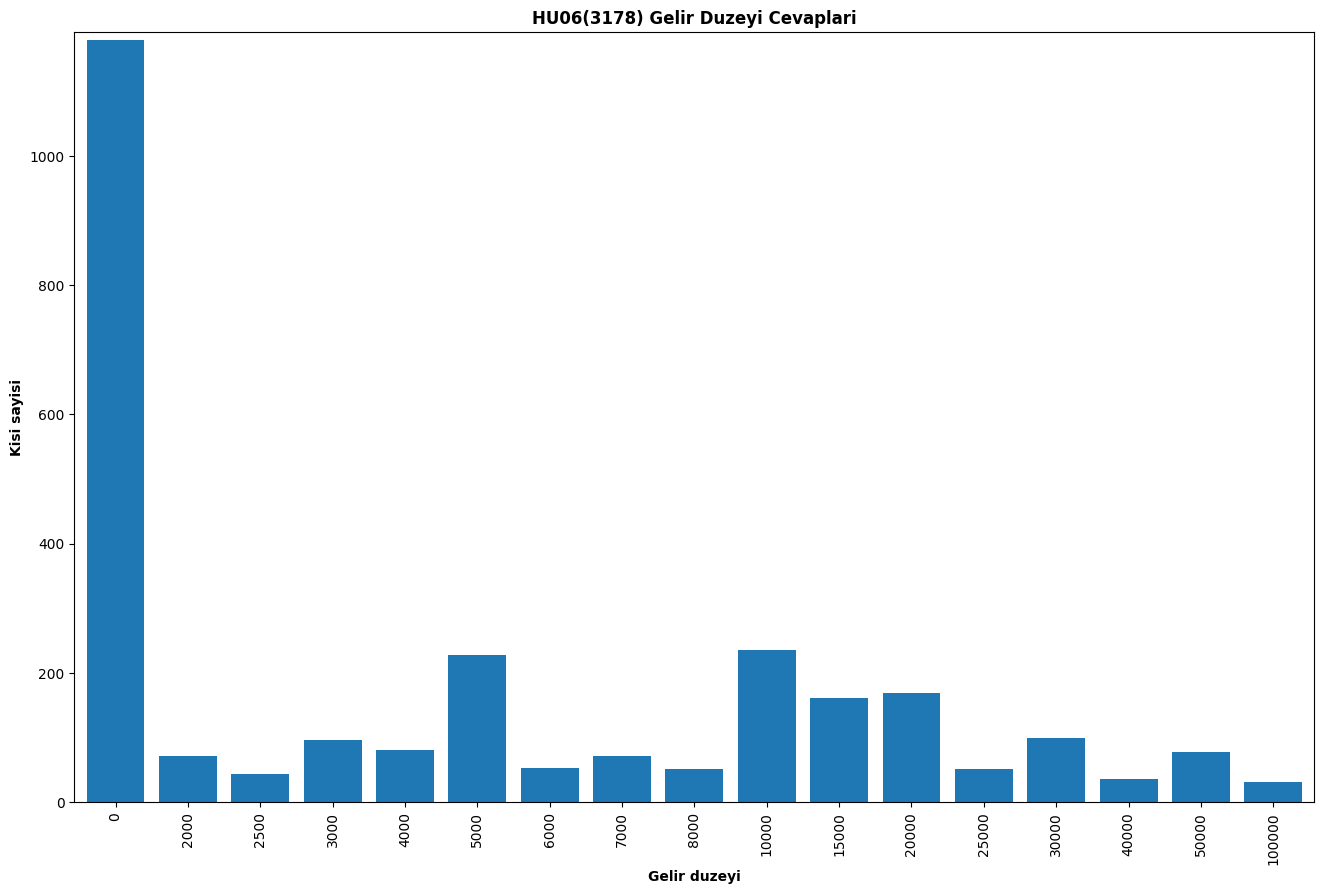

label :  HU07
Satir sayisi:  3728 , Kolon sayisi:  100

 {0: 949, '5000': 279, '10000': 219, '3000': 192, '4000': 123, '6000': 121, '2000': 119, '5000.0': 110, '1000': 95, '7000': 93, '10000.0': 79, '8000': 78, '3000.0': 72, '2000.0': 61, '20000': 60, '15000': 59, '4000.0': 57, '2500': 46, '7000.0': 45, '3500': 42, '6000.0': 41, '8000.0': 39, '0.0': 36, '1000.0': 35, '20000.0': 34, '0': 32, '4500': 30, '500': 28, '15000.0': 26, '3500.0': 24, '2500.0': 22, '5500': 22, '1500': 20, '12000': 18, '9000': 15, '5500.0': 13, '7500': 13, '40000': 12, '30000': 12, '13000': 11, '25000': 11, '1500.0': 10, '12000.0': 9, '13000.0': 9, '500.0': 9, '11000': 9, '8500.0': 8, '50000': 8, '18000': 8, '4250.0': 8, '30000.0': 8, '6500': 7, '7500.0': 7, '25000.0': 7, '2800': 6, '14000': 6, '11000.0': 6, '9000.0': 5, '1': 5, '1200': 4, '3800': 4, '2800.0': 4, '4500.0': 4, '17000': 4, '35000': 4, '17000.0': 4, '2200': 3, '22000': 3, '2700': 3, '45000': 3, '35000.0': 3, '4250': 3, '100': 3, '60000': 3, '8500': 

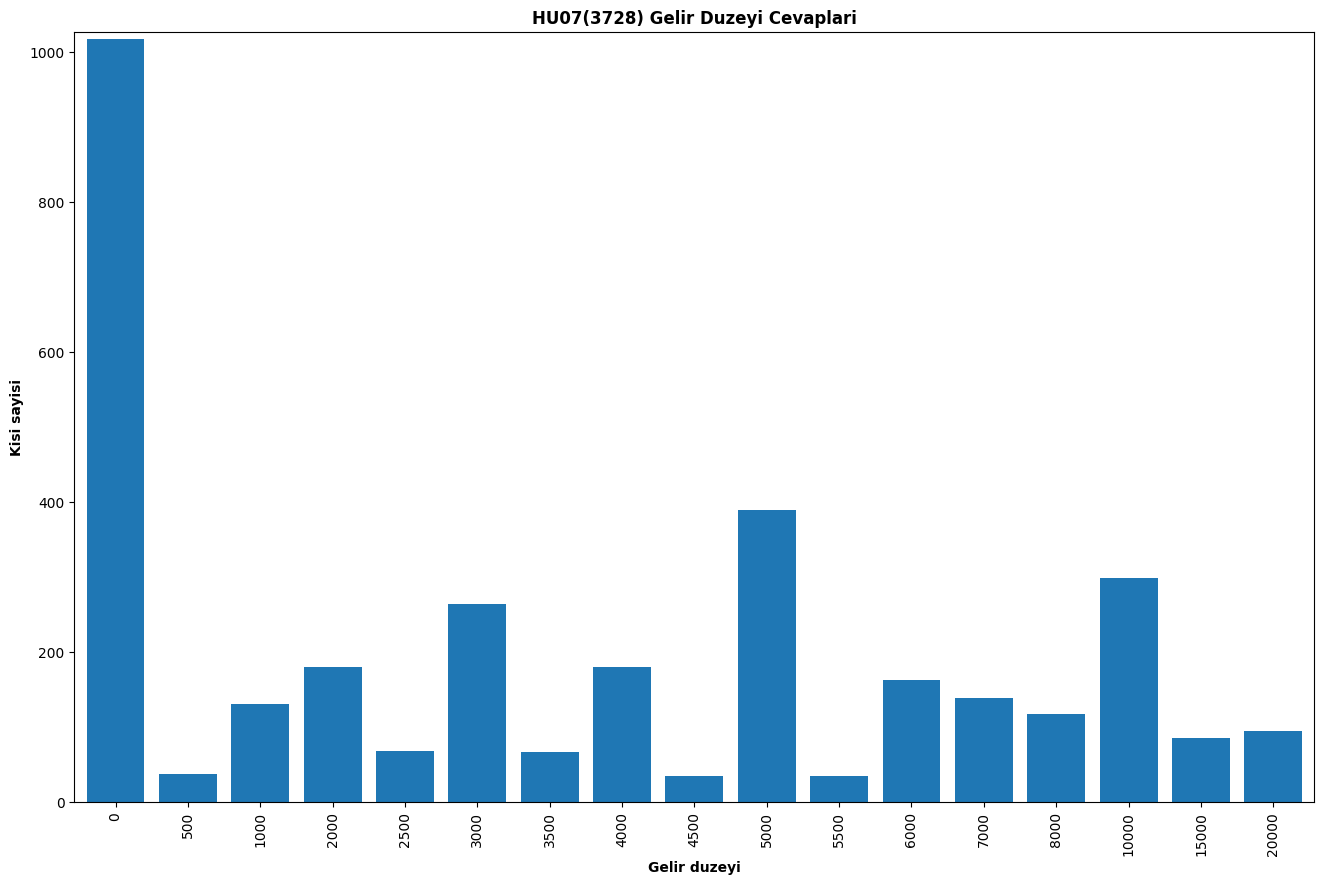

label :  HU11
Satir sayisi:  439 , Kolon sayisi:  100

 {0: 88, '10000': 24, '5000': 19, '20000': 18, '15000': 17, '3000': 16, '10000.0': 15, '4000': 14, '30000': 12, '5000.0': 12, '3000.0': 11, '50000': 9, '50000.0': 8, '0': 8, '8000': 8, '15000.0': 8, '20000.0': 7, '7000': 7, '100000': 6, '8000.0': 6, '30000.0': 6, '25000': 6, '0.0': 6, '6000.0': 5, '1500': 5, '2000.0': 4, '35000': 4, '6000': 4, '100000.0': 4, '40000': 4, '200000': 3, '4000.0': 3, '40000.0': 3, '4500': 3, '7500.0': 2, '3500.0': 2, '500.0': 2, '35000.0': 2, '1.0': 2, '7000.0': 2, '4500.0': 2, '1000': 2, '3500': 2, '80000': 2, '60000': 2, '150000': 2, '1000.0': 1, '7500': 1, '5500': 1, '9000': 1, '1300.0': 1, '28000.0': 1, '62550.0': 1, '200000.0': 1, '14000.0': 1, '2500.0': 1, '2000': 1, '12000.0': 1, '750': 1, '4300': 1, '25000.0': 1, '16000.0': 1, '12000': 1, '985601.0': 1, '11500': 1, '70000': 1, '8500': 1, '2300': 1, '300000.0': 1, '5800': 1, '2500': 1, '32000': 1, '18000.0': 1, '3200': 1, '90000.0': 1, '32000.0':

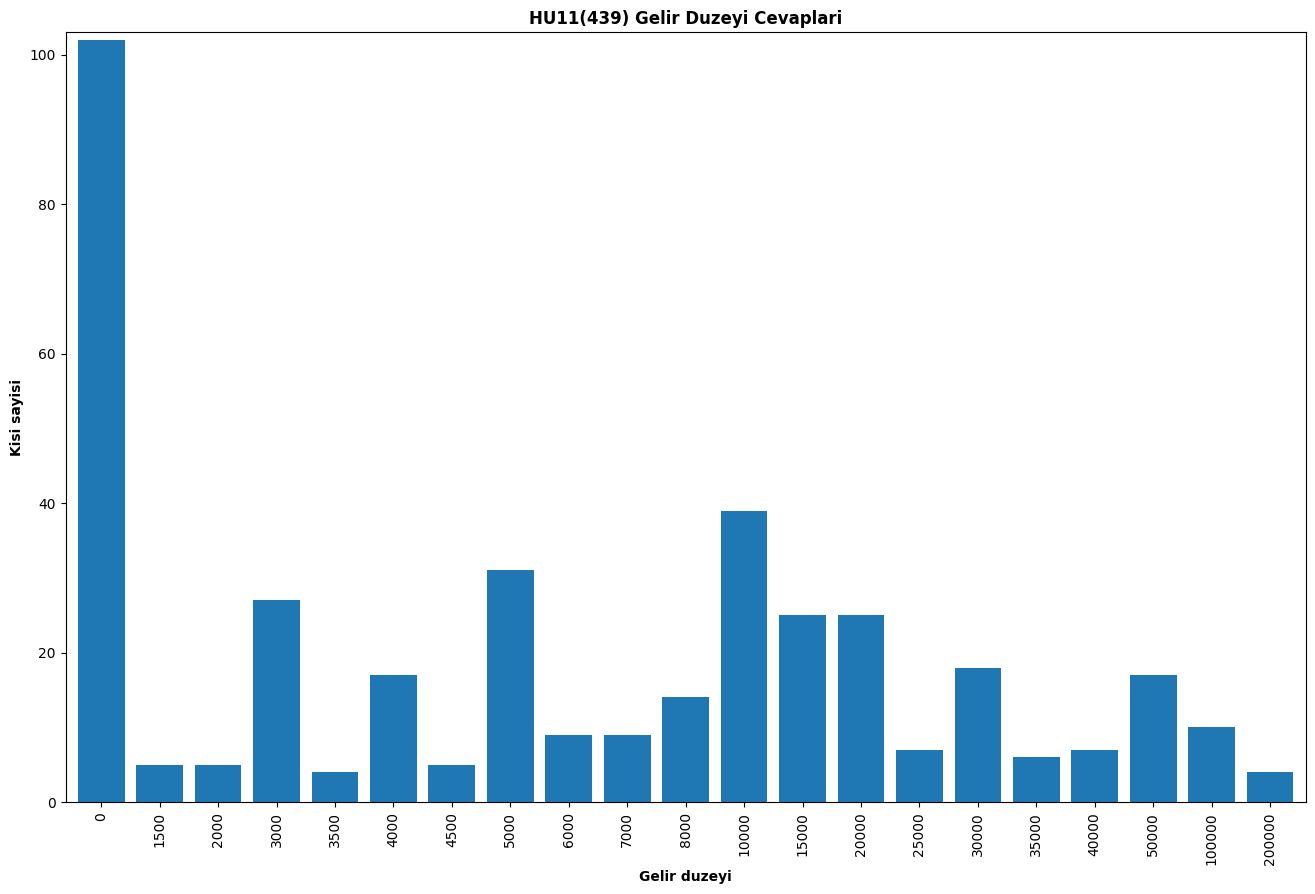

label :  HU12
Satir sayisi:  676 , Kolon sayisi:  100

 {0: 138, '5000': 47, '0': 38, '3000': 31, '10000': 31, '2000': 30, '4000': 29, '15000': 23, '3000.0': 15, '5000.0': 15, '1500': 14, '2000.0': 13, '6000': 12, '20000.0': 12, '10000.0': 12, '20000': 12, '0.0': 10, '1000': 9, '7000': 9, '15000.0': 8, '8000': 8, '3500': 8, '30000': 8, '1500.0': 8, '4000.0': 7, '2500': 6, '2500.0': 6, '6000.0': 6, '8000.0': 6, '18000': 5, '25000': 5, '50000.0': 5, '30000.0': 4, '12000': 4, '25000.0': 3, '3500.0': 3, '1': 3, '1000.0': 3, '100000': 3, '2800': 3, '4500': 3, '4500.0': 3, '2800.0': 2, '150000': 2, '100000.0': 2, '50000': 2, '500.0': 2, '1200': 2, '500': 2, '5500.0': 2, '1800': 2, '2300': 2, '35000': 2, '2300.0': 1, '13000.0': 1, '7000.0': 1, '19000.0': 1, '2700.0': 1, '35000.0': 1, '105000': 1, '900': 1, '17250': 1, '2400.0': 1, '155000.0': 1, '19000': 1, '1300.0': 1, '11000.0': 1, '80000.0': 1, '3900': 1, '8500.0': 1, '7500.0': 1, '7250': 1, '16000': 1, '3250': 1, '2200': 1, '2600': 1, '33

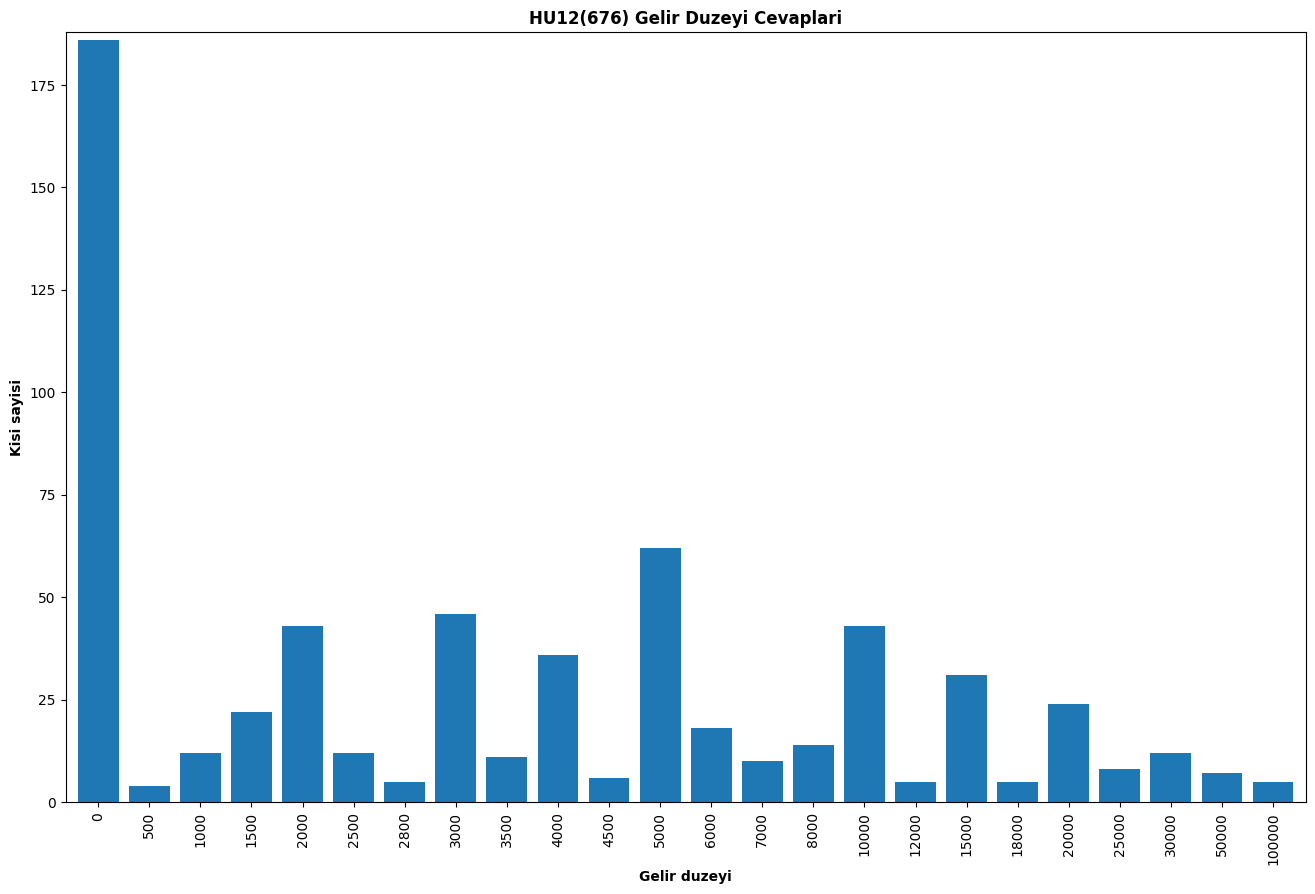

label :  HU14
Satir sayisi:  10754 , Kolon sayisi:  100

 {0: 2771, '10000': 858, '5000': 791, '15000': 360, '3000': 355, '5000.0': 348, '10000.0': 346, '20000': 344, '8000': 267, '4000': 255, '7000': 251, '6000': 249, '15000.0': 192, '20000.0': 177, '2000': 163, '3000.0': 154, '30000': 135, '4000.0': 127, '6000.0': 111, '0.0': 111, '50000': 109, '8000.0': 105, '7000.0': 100, '1000': 99, '0': 92, '2500': 85, '3500': 77, '30000.0': 77, '25000': 74, '2000.0': 74, '50000.0': 64, '1000.0': 54, '9000': 54, '12000': 47, '7500': 41, '25000.0': 41, '4500': 41, '100000': 39, '40000': 38, '2500.0': 37, '5500': 35, '3500.0': 32, '18000': 28, '9000.0': 26, '5500.0': 23, '18000.0': 22, '1500': 21, '13000': 21, '40000.0': 19, '500': 19, '7500.0': 19, '35000': 18, '1500.0': 18, '12000.0': 17, '16000': 17, '8500': 17, '6500': 17, '1': 16, '150000': 16, '4500.0': 16, '100000.0': 15, '60000': 12, '17000.0': 12, '14000.0': 12, '8500.0': 11, '14000': 11, '100': 11, '35000.0': 11, '500.0': 11, '45000': 9, 

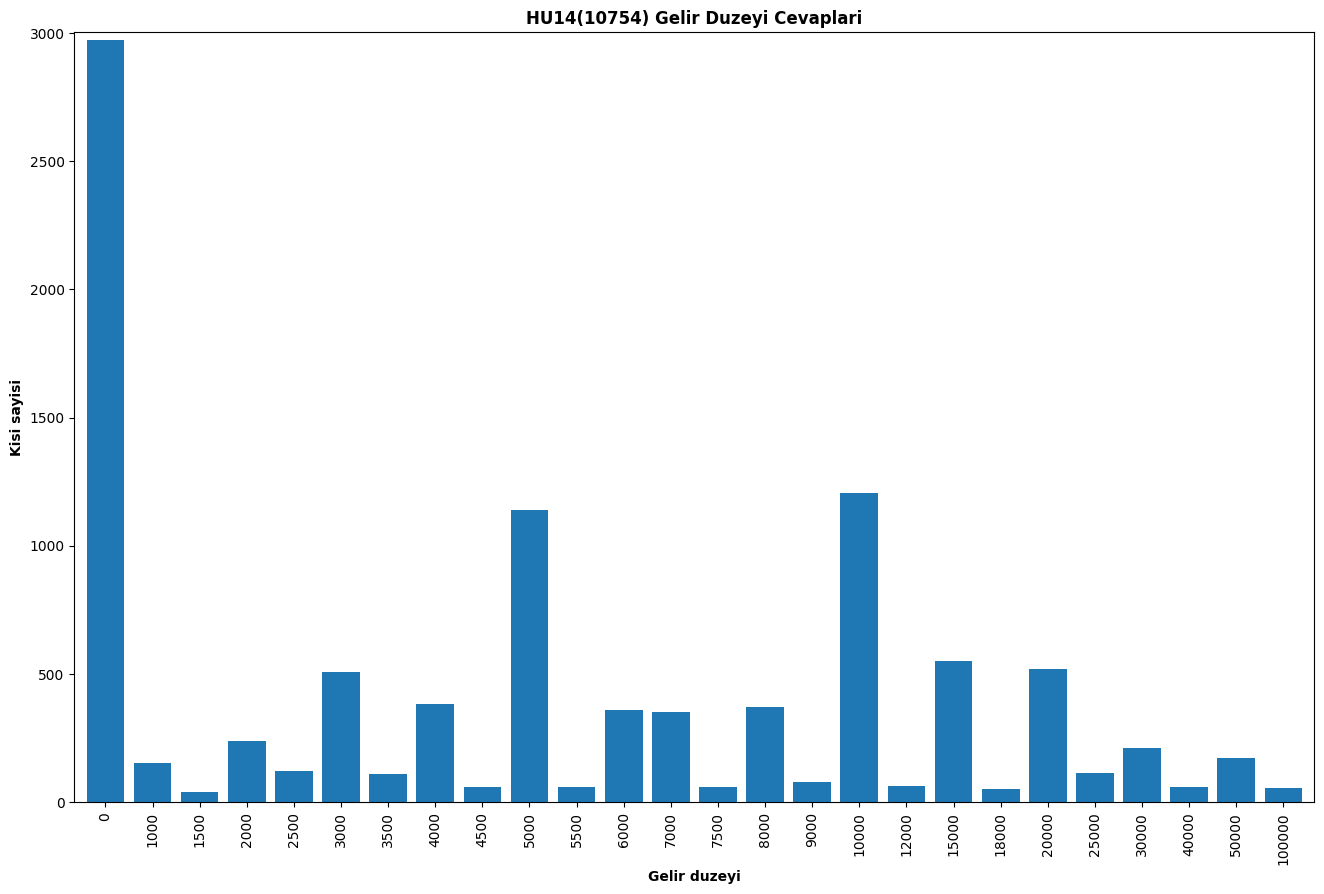

label :  HU15
Satir sayisi:  415 , Kolon sayisi:  100

 {0: 46, '0': 40, '5000': 20, '4000': 20, '3000': 19, '0.0': 19, '10000': 16, '2000': 12, '20000.0': 11, '1000': 11, '5000.0': 11, '2500': 10, '1500': 9, '2000.0': 8, '10000.0': 8, '7000': 7, '6000': 6, '3000.0': 6, '1': 6, '20000': 6, '8000.0': 5, '1000.0': 5, '1500.0': 5, '500': 5, '4000.0': 5, '15000.0': 4, '15000': 4, '50000.0': 4, '3500': 3, '750': 3, '6000.0': 3, '8000': 3, '1800': 3, '500.0': 3, '30000.0': 3, '30000': 3, '600': 2, '12000.0': 2, '7500': 2, '12000': 2, '1.0': 2, '9000': 2, '100000.0': 2, '2200': 2, '100': 2, '17000': 2, '1600': 2, '1950.0': 1, '2600': 1, '200.0': 1, '7500.0': 1, '4800': 1, '1200.0': 1, '7200': 1, '100000': 1, '700': 1, '400.0': 1, '2500.0': 1, '40000': 1, '25000': 1, '35000': 1, '2072.0': 1, '3300': 1, '140000': 1, '13000.0': 1, '4600.0': 1, '200': 1, '4200': 1, '18000': 1, '800': 1, '4500': 1, '25000.0': 1, '750.0': 1, '60000': 1, '75000.0': 1, '2400': 1, '26000': 1, '5.5': 1, '3250': 1, '120

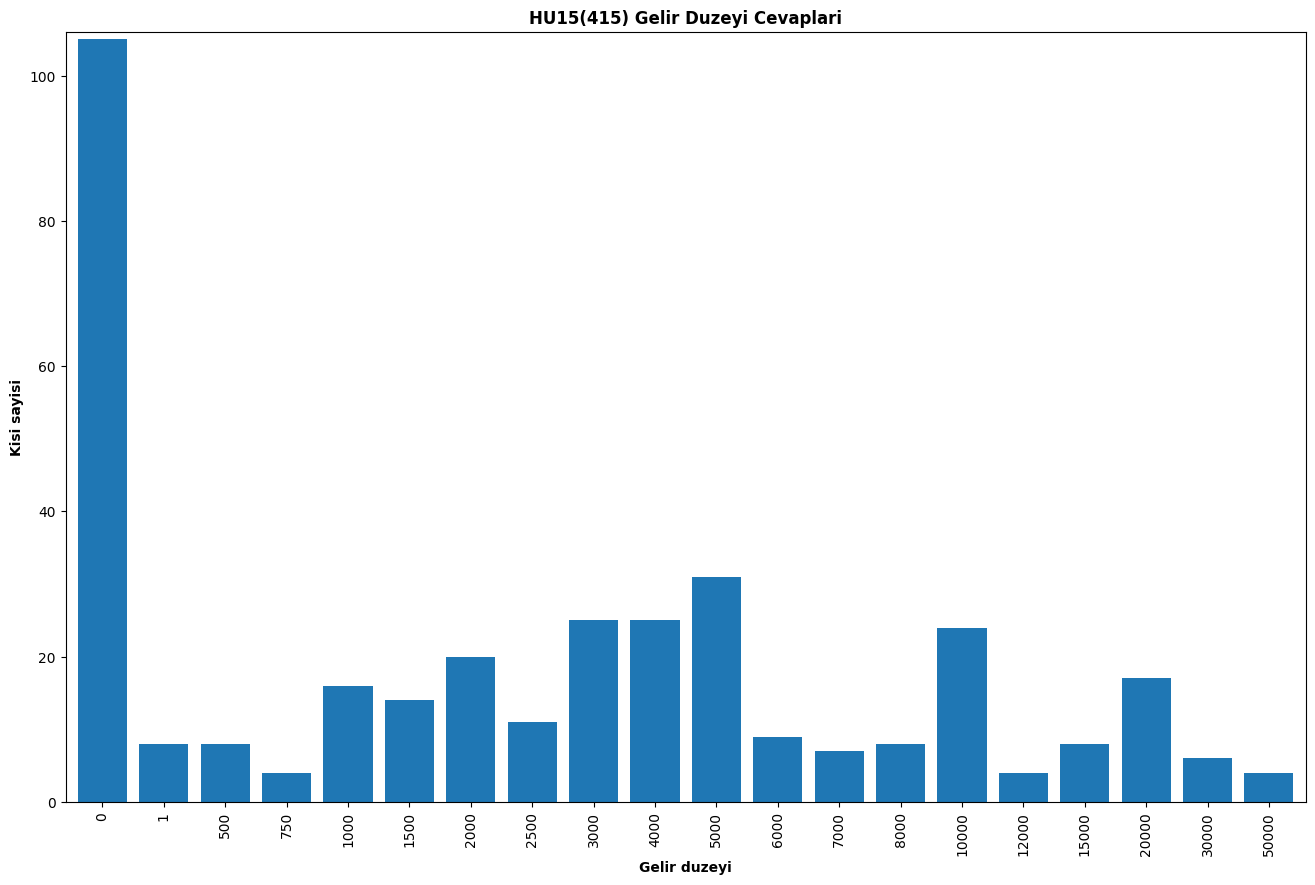

label :  HU19
Satir sayisi:  759 , Kolon sayisi:  100

 {0: 202, '10000': 52, '5000': 42, '20000': 40, '15000': 32, '5000.0': 22, '2000': 21, '3000': 20, '20000.0': 18, '7000': 17, '30000': 17, '0.0': 15, '15000.0': 15, '10000.0': 14, '4000': 14, '3000.0': 12, '0': 12, '6000': 12, '25000': 11, '50000': 10, '7000.0': 8, '8000': 7, '50000.0': 7, '6000.0': 7, '30000.0': 7, '25000.0': 6, '1000': 6, '2000.0': 5, '3500': 5, '100000.0': 4, '4000.0': 4, '18000': 4, '40000': 4, '7500': 3, '4500': 3, '2500': 3, '1000.0': 3, '9000.0': 3, '18000.0': 3, '8000.0': 3, '5500.0': 2, '1.0': 2, '12000': 2, '1500': 2, '100000': 2, '3500.0': 2, '27000': 2, '9400': 1, '45000': 1, '37000': 1, '8500.0': 1, '35000.0': 1, '22500': 1, '20618.0': 1, '532286.0': 1, '7500000.0': 1, '1600.0': 1, '2500.0': 1, '120000.0': 1, '500000.0': 1, '60000.0': 1, '11520': 1, '55000.0': 1, '32000': 1, '40000.0': 1, '1800': 1, '4250.0': 1, '80000': 1, '1000000.0': 1, '1500.0': 1, '8200': 1, '17000': 1, '150000.0': 1, '1': 1, '125

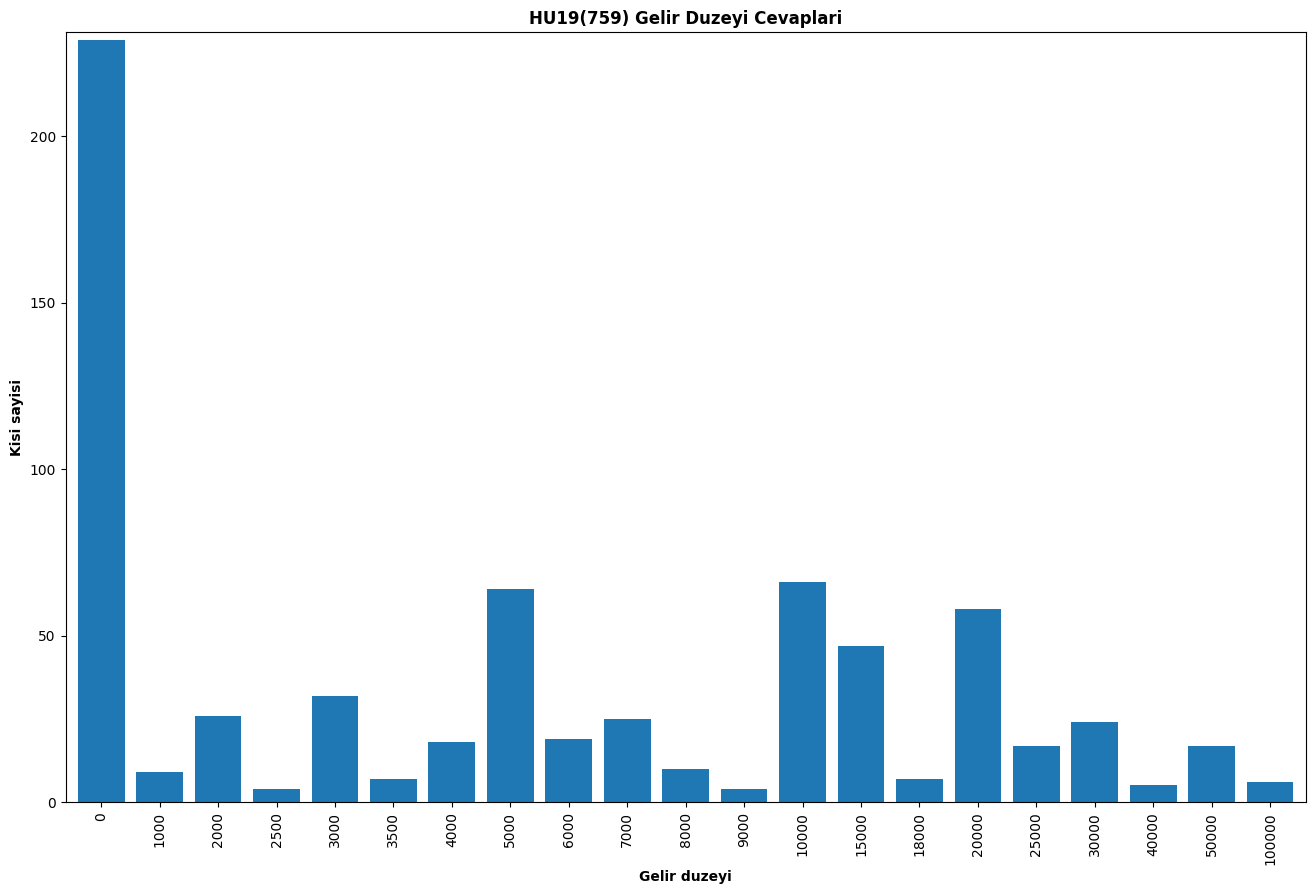

label :  UA
Satir sayisi:  832770 , Kolon sayisi:  100

 {0: 272668, '0': 64389, '2000': 39144, '3000': 36659, '5000': 36605, '1000': 28425, '0.0': 26624, '10000': 21337, '4000': 18692, '1500': 15201, '5000.0': 14338, '2000.0': 14328, '2500': 13949, '3000.0': 13791, '1000.0': 10160, '10000.0': 9706, '15000': 9074, '500': 8420, '6000': 8293, '20000': 7371, '7000': 7339, '4000.0': 7141, '3500': 6642, '8000': 5806, '1': 5715, '1500.0': 5399, '2500.0': 5141, '15000.0': 5053, '20000.0': 4266, '6000.0': 3669, '7000.0': 3279, '500.0': 3042, '30000': 2728, '4500': 2721, '8000.0': 2610, '3500.0': 2570, '1200': 2442, '1.0': 2203, '50000': 2131, '30000.0': 2019, '100': 1973, '25000': 1882, '50000.0': 1581, '1800': 1570, '25000.0': 1569, '7500': 1527, '12000': 1526, '9000': 1337, '800': 1301, '12000.0': 1203, '4500.0': 1193, '1300': 1188, '300': 1121, '5500': 1109, '600': 1044, '40000': 1038, '2800': 1014, '1600': 983, '7500.0': 978, '9000.0': 923, '1200.0': 911, '40000.0': 874, '200': 850, '700':

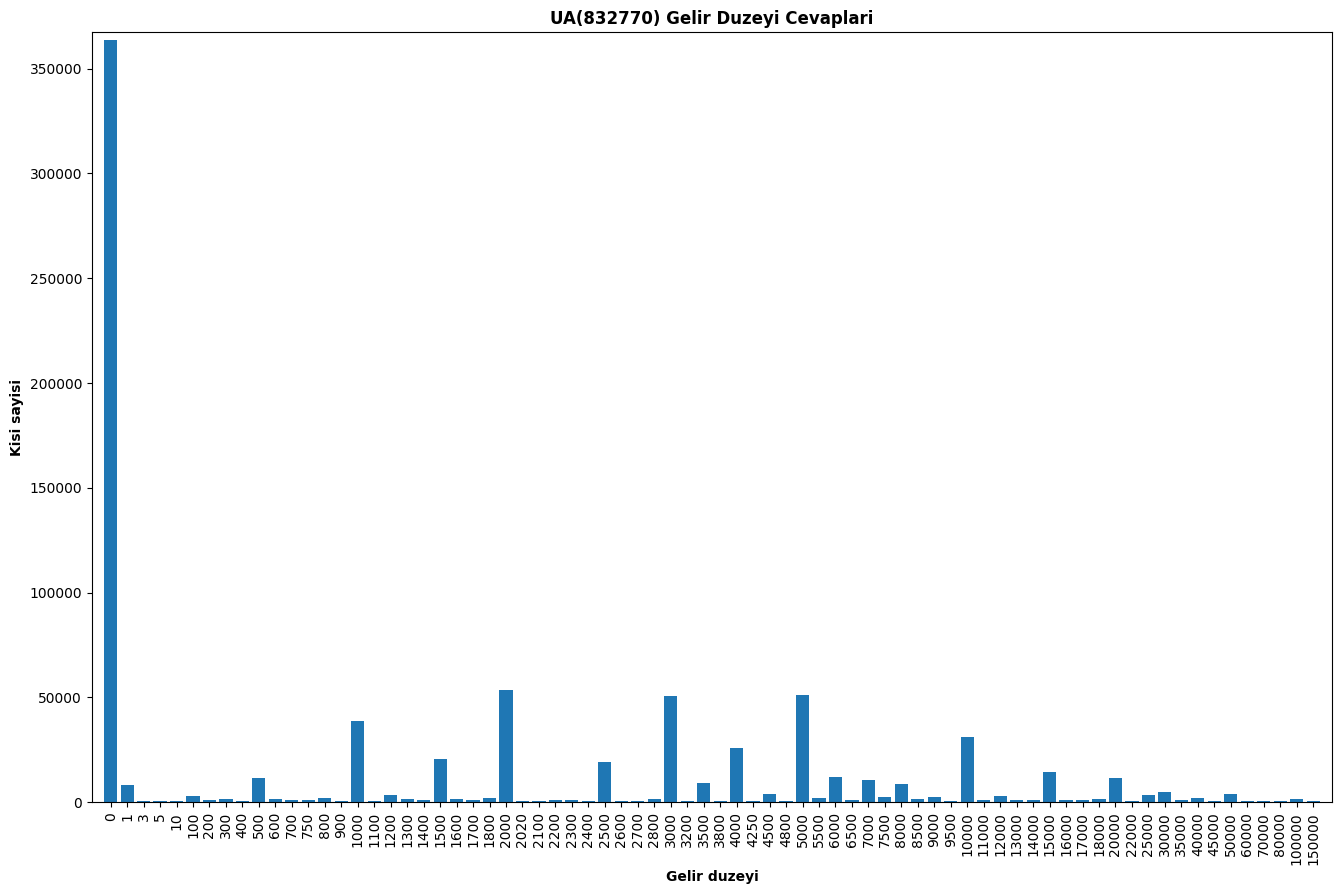

In [53]:
# 11-) labele ozel veri olusturma 3 - okkes

label_HU19_meslek = {} # bu sekil her farkli sigortanin farkli özelliklerini ayri dict'lerde toplayalim

for label, group in labeldata["HU19"].groupby('PP_MESLEK'):
    label_HU19_meslek[label] = group

# sutun analiz ve grafik fonksiyonu
# fonksiyon parametre olarak veri icin bir sigortanin grubunu(ornegin HU19'un grubunu labeldata'dan verebiliriz) alir

# fonksiyon aldigi grubu, ozellikleri(meslek, yas, medeni_hal, cocuk_sayisi, baska hangi BES'i aldiklari vs.) acisindan
# analiz edip bize hepsi icin bir dict dondurebilir ya da direk grafik olusturabilir (ya da ikisi birden)
def column_analyse_tograph_complete(data: pd.DataFrame, name: str):

    if not os.path.exists("graphs"):
        os.makedirs("graphs")
        print("images klasörü olustu")
    
    if not os.path.exists("./graphs/{}".format(name)):
        os.makedirs("./graphs/{}".format(name))
        print("names klasoru olustu")

    group_satir_sayisi = data.shape[0]
    group_kolon_sayisi = data.shape[1]
    print("Satir sayisi: ", group_satir_sayisi, ", Kolon sayisi: ", group_kolon_sayisi)

    """
    # cinsiyet analizi
    cinsiyet = {}
    for label, group in data.groupby("PP_CINSIYET"):
        cinsiyet[label] = group
    print(cinsiyet.keys())
    if (list(cinsiyet.values())[0] == 1):
        group_erkek_sayisi = list(cinsiyet.values())[0].__len__()
        if (list(cinsiyet.values())[1] == 2):
            group_kadin_sayisi = list(cinsiyet.values())[1].__len__()
        else:
            group_kadin_sayisi = 0
    elif(list(cinsiyet.values())[0] == 1):
        group_kadin_sayisi = list(cinsiyet.values())[0].__len__()
        group_erkek_sayisi = 0
    else:
        print("ERROR: VERİDE BÜYÜK HATA VAR !!!!!!!!")
        first_group = list(cinsiyet.values())[0]
    if 1 in first_group["PP_CINSIYET"].values:
        group_erkek_sayisi = len(first_group)
        if 2 in cinsiyet:
            group_kadin_sayisi = len(cinsiyet[2])
        else:
            group_kadin_sayisi = 0
    elif 2 in first_group["PP_CINSIYET"].values:
        group_kadin_sayisi = len(first_group)
        group_erkek_sayisi = 0
    else:
        print("ERROR: VERİDE BÜYÜK HATA VAR !!!!!!!!")
    
    #group_kadin_sayisi = list(cinsiyet.values())[1].__len__()
    print("\nErkek sayisi: ",group_erkek_sayisi)
    print("Kadin sayisi: ",group_kadin_sayisi)
    if (group_erkek_sayisi + group_kadin_sayisi == group_satir_sayisi):
        print("Cinsiyet is ok!")
        plt.pie([group_erkek_sayisi, group_kadin_sayisi], labels=["Erkek", "Kadin"], autopct='%1.1f%%')
        plt.title("{}({}) Cinsiyet dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_cinsiyet.png".format(name,name))
        plt.show()
    else:
        null_deger_sayisi = group_satir_sayisi - (group_erkek_sayisi + group_kadin_sayisi)
        print("Cinsiyette null var: ", null_deger_sayisi , " tane")
        plt.pie([group_erkek_sayisi, group_kadin_sayisi, null_deger_sayisi], labels=["Erkek", "Kadin", "Bilinmiyor"], autopct='%1.1f%%')
        plt.title("{}({}) Cinsiyet dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_cinsiyet.png".format(name,name))
        plt.show()
    
    # yas analizi
    data["YAS_YIL"] = data["PP_YAS"]//12
    # her yasi ve her yasin kac tane olduğunu dict olarak al
    yas_sayilari = data["YAS_YIL"].value_counts().to_dict() 
    print("\nyas: ",yas_sayilari)

    group_yas_sayilari_toplami = 0
    for yas_sayisi in yas_sayilari.values():
        group_yas_sayilari_toplami += yas_sayisi
    if (group_yas_sayilari_toplami == group_satir_sayisi):
        print("yas is ok")    
    else:
        print("Yas verisinde null var: ", group_satir_sayisi - group_yas_sayilari_toplami)
    
    yaslar = list(yas_sayilari.keys())
    yaslar.sort() # yaslari sirala
    # sonra yaslari siraladigin gibi onlara bakarak sayilarini getir ve ata
    sayilar = [yas_sayilari[yas] for yas in yaslar]
    
    plt.figure(figsize=(13,6))
    plt.bar(yaslar, sayilar)
    plt.xlabel("Yas")
    plt.ylabel("Kisi sayisi")
    plt.title("{}({}) Yas dagilimi".format(name,group_satir_sayisi), fontweight="bold")
    plt.savefig("./graphs/{}/{}_yas.png".format(name,name))
    plt.margins(0.01)
    
    plt.show()
    
    # segment analizi
    group_segment = data["PP_MUSTERI_SEGMENTI"].value_counts().to_dict()
    print("\nsegment: ",group_segment)
    group_segment_sayisi = 0
    for segment in group_segment.values():
        group_segment_sayisi += segment
    if (group_segment_sayisi == group_satir_sayisi):
        print("Segment is ok")
    else:
        print("Segment verisinde null var: ", group_satir_sayisi - group_segment_sayisi)
    plt.bar(list(group_segment.keys()), list(group_segment.values()))  #bu sekil bar grafigi olusur
    plt.xlabel("Segment")
    plt.ylabel("Müşteri Sayisi")
    plt.title("{}({}) Segment dagilimi".format(name,group_satir_sayisi), fontweight="bold")
    plt.savefig("./graphs/{}/{}_segment.png".format(name,name))
    plt.show()

    
    # uyruk analizi (cok gerekli oldugunu dusunmuyorum (okkes))
    group_uyruk = data["PP_UYRUK"].value_counts()
    group_tc = group_uyruk.get(1, 0)
    group_mavi = group_uyruk.get(2, 0)
    group_yabanci = group_uyruk.get(3, 0)
    print("\ntc: ", group_tc, "  mavi:", group_mavi, "  yabanci", group_yabanci)

    group_uyruk_sayisi = group_tc + group_mavi + group_yabanci
    if (group_uyruk_sayisi == group_satir_sayisi):

        print("Uyruk is ok!")
        plt.bar(["tc", "mavi", "yabanci"],[group_tc, group_mavi, group_yabanci])
        plt.xlabel("Uyruk", fontweight='bold')
        plt.ylabel("Kisi sayisi", fontweight='bold')
        plt.title("{}({}) Uyruk dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_uyruk.png".format(name,name))
        plt.show()

    else: 
        group_uyruk_bilinmeyen = group_satir_sayisi - group_uyruk_sayisi
        print("Uyrukta null var: ", group_uyruk_bilinmeyen)
        plt.bar(["tc", "mavi", "yabanci, bilinmiyor"],[group_tc, group_mavi, group_yabanci, group_uyruk_bilinmeyen])
        plt.xlabel("Uyruk", fontweight='bold')
        plt.ylabel("Kisi sayisi", fontweight='bold')
        plt.title("{}({}) Uyruk dagilimi".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_uyruk.png".format(name,name))
        plt.show()
    

    # meslek analizi
    group_meslek = data["PP_MESLEK"].value_counts().to_dict()
    print("\n",group_meslek)
    group_meslek_isimleri = list(group_meslek.keys())
    group_meslek_sayilari = list(group_meslek.values())

    group_meslek_sayilari_toplami = 0
    for meslek_sayisi in group_meslek_sayilari:
        group_meslek_sayilari_toplami += meslek_sayisi
    if (group_meslek_sayilari_toplami == group_satir_sayisi):
        print("Meslek is ok")
    else:
        print("Meslekte null var: ", group_satir_sayisi - group_meslek_sayilari_toplami)

    fig, ax = plt.subplots(figsize=(15,6))
    plt.bar(group_meslek_isimleri, group_meslek_sayilari, width=0.6)
    plt.xlabel("Meslekler", fontweight="bold")
    plt.ylabel("Kisi sayisi", fontweight="bold")
    plt.title("{}({}) Meslek dagilimi".format(name,group_satir_sayisi), fontweight="bold")
    plt.xticks(rotation=90)
    plt.margins(0.01)
    plt.savefig("./graphs/{}/{}_meslek.png".format(name,name))
    plt.show()


    # SORU -> yatirim karakteri
    group_yatirim_karakteri = data["SORU_YATIRIM_KARAKTERI_CVP"].value_counts().to_dict()
    print("\n",group_yatirim_karakteri)
    group_yatirim_karaktei_cevaplar = list(group_yatirim_karakteri.keys())
    group_yatirim_karaktei_cevap_sayilari = list(group_yatirim_karakteri.values())

    group_yatirim_karakteri_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_yatirim_karaktei_cevap_sayilari:
        group_yatirim_karakteri_cevap_sayilari_toplami += cevap_sayisi
    print("Yatirim karakteri: Cevap verenlerin orani: %",100*group_yatirim_karakteri_cevap_sayilari_toplami/group_satir_sayisi)

    if (100*group_yatirim_karakteri_cevap_sayilari_toplami/group_satir_sayisi != 100):
        group_yatirim_karaktei_cevaplar.append("Bilinmeyen")
        group_yatirim_karaktei_cevap_sayilari.append(group_satir_sayisi-group_yatirim_karakteri_cevap_sayilari_toplami)
        
    plt.pie(group_yatirim_karaktei_cevap_sayilari, labels=group_yatirim_karaktei_cevaplar, autopct='%1.1f%%', pctdistance=0.75)
    plt.title("{}({}) Yatirim Karakteri Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
    plt.savefig("./graphs/{}/{}_yatirim_karakteri.png".format(name,name))
    plt.show()
    
    
    # SORU -> medeni hal
    group_medeni_hal = data["SORU_MEDENI_HAL_CVP"].value_counts().to_dict()
    group_medeni_hal_cevaplar = list(group_medeni_hal.keys())
    group_medeni_hal_cevap_sayilari = list(group_medeni_hal.values())
    print("\n",group_medeni_hal)

    group_medeni_hal_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_medeni_hal_cevap_sayilari:
        group_medeni_hal_cevap_sayilari_toplami += cevap_sayisi
    print("Medeni hal: Cevap verenlerin orani: ", 100 * group_medeni_hal_cevap_sayilari_toplami / group_satir_sayisi)

    if (100 * group_medeni_hal_cevap_sayilari_toplami / group_satir_sayisi == 100):
        print("tam")
        plt.pie(group_medeni_hal_cevap_sayilari, labels=group_medeni_hal_cevaplar)
        plt.title("{}({}) Medeni Hal Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_medeni_hal.png".format(name,name))
        plt.show()
    else : 
        group_medeni_hal_cevap_sayilari.append(group_satir_sayisi - group_medeni_hal_cevap_sayilari_toplami)
        group_medeni_hal_cevaplar.append("Bilinmeyen")
        plt.pie(group_medeni_hal_cevap_sayilari, labels=group_medeni_hal_cevaplar)
        plt.title("{}({}) Medeni Hal Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_medeni_hal.png".format(name,name))
        plt.show()
    

    # SORU -> egitim
    group_egitim = data["SORU_EGITIM_CVP"].value_counts().to_dict()
    print("\n",group_egitim)
    group_egitim_cevaplar = list(group_egitim.keys())
    group_egitim_cevap_sayilari = list(group_egitim.values())

    group_egitim_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_egitim_cevap_sayilari:
        group_egitim_cevap_sayilari_toplami += cevap_sayisi
    print("Egitim: Cevap verenlerin orani: %", 100 * group_egitim_cevap_sayilari_toplami / group_satir_sayisi)

    if (100 * group_egitim_cevap_sayilari_toplami / group_satir_sayisi == 100):
        print("ok")
        fig, ax = plt.subplots(figsize=(11,6))
        plt.bar(group_egitim_cevaplar, group_egitim_cevap_sayilari)      
        plt.xlabel("Egitim Duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Egitim Duzeyi Cevpalari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_egitim.png".format(name,name))
        plt.show()
    else:
        group_egitim_cevaplar.append("Bilinmeyen")
        group_egitim_cevap_sayilari.append(group_satir_sayisi - group_egitim_cevap_sayilari_toplami)
        fig, ax = plt.subplots(figsize=(11,6))
        plt.bar(group_egitim_cevaplar, group_egitim_cevap_sayilari)
        plt.xlabel("Egitim Duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Egitim Duzeyi Cevpalari".format(name,group_satir_sayisi), fontweight="bold")
        plt.savefig("./graphs/{}/{}_medeni_hal.png".format(name,name))
        plt.show()
    """
    
    # SORU -> gelir
    group_gelir = data["SORU_GELIR_CVP"].value_counts().to_dict()
    print("\n",group_gelir)
    group_gelir_cevaplar = list(group_gelir.keys())
    group_gelir_cevap_sayilari = list(group_gelir.values())

    group_gelir_cevap_sayilari_toplami = 0
    for cevap_sayisi in group_gelir_cevap_sayilari:
        group_gelir_cevap_sayilari_toplami += cevap_sayisi

    # Yeni bir sözlük oluştur
    duzenlenmis_veri = {}
    # Anahtarları tamsayıya dönüştürüp, değerleri toplayarak yeni sözlüğe ekleyin
    for anahtar, deger in group_gelir.items():
        if isinstance(anahtar, str) and "," in anahtar:
            degerler = anahtar.split(",")  # Virgül ile ayrılan değerleri ayır
            for deger_str in degerler:
                anahtar = int(float(deger_str))  # Ondalık olup olmadığını kontrol eder
                if anahtar in duzenlenmis_veri:
                    duzenlenmis_veri[anahtar] += deger
                else:
                    duzenlenmis_veri[anahtar] = deger
        else:
            anahtar = int(float(anahtar))  # Ondalık olup olmadığını kontrol eder
            if anahtar in duzenlenmis_veri:
                duzenlenmis_veri[anahtar] += deger
            else:
                duzenlenmis_veri[anahtar] = deger
    """for anahtar, deger in group_gelir.items():
        if "," in anahtar:
            degerler = anahtar.split(",")  # Virgül ile ayrılan değerleri ayır
            anahtar_arr = [(deger) for deger in degerler]
            anahtar = anahtar_arr[0]
        else:
            anahtar = int(float(anahtar))  # Ondalık olup olmadığını kontrol eder
        if anahtar in duzenlenmis_veri:
            duzenlenmis_veri[anahtar] += deger
        else:
            duzenlenmis_veri[anahtar] = deger
    """
    print("duzenlenmis: ", duzenlenmis_veri)
    sirali_veri = (sorted(duzenlenmis_veri.items()))
    min = 0
    if (name == "HU11" or name == "HU12" or name == "HU15" or name == "HU19"):
        print("az")
        sirali_veri = [tupple for tupple in sirali_veri if tupple[1] > 3] # burayi ayarla
        min = 3
    elif (name=="HU06" or name=="HU07" or name=="HU14"):
        print("orta")
        sirali_veri = [tupple for tupple in sirali_veri if tupple[1] > 30] # burayi ayarla
    elif (name=="UA"):
        print("cok")
        sirali_veri = [tupple for tupple in sirali_veri if tupple[1] > 330] # burayi ayarla
    sirali_cevap = []
    sirali_cevap_sayilari = []
    print("sirali veri: ",sirali_veri)
    for item in sirali_veri:
        sirali_cevap.append(str(item[0]))
        sirali_cevap_sayilari.append(int(item[1]))
    print("Gelir: Cevap verenlerin orani: %", 100 * group_gelir_cevap_sayilari_toplami / group_satir_sayisi)
    print("sirali cevap: ",sirali_cevap)
    print("sayilari: ",sirali_cevap_sayilari)

    if (group_gelir_cevap_sayilari_toplami == group_satir_sayisi): # null yok
        print("gelir ok")
        fig, ax = plt.subplots(figsize=(16,10))
        plt.bar(sirali_cevap, sirali_cevap_sayilari) # cok fazla 1 tane veya 2 tane olan cevap var bunları trimlemek gerekebilir
        plt.xticks(rotation=90)
        plt.xlabel("Gelir duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Gelir Duzeyi Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.margins(0.01)
        #index = len(sirali_cevap) - 1  # En sondaki barın endeksi
        #plt.text(index, sirali_cevap_sayilari[index - 4] + 35, gelir_null_sayisi, ha='center', va='bottom', color="red")
        plt.savefig("./graphs/{}/{}_gelir.png".format(name,name))
        plt.show()
    else:
        #sirali_cevap.append("Bilinmeyen")
        #sirali_cevap_sayilari.append(group_satir_sayisi - group_gelir_cevap_sayilari_toplami)
        gelir_null_sayisi = (100 - (100 * group_gelir_cevap_sayilari_toplami / group_satir_sayisi))
        kalan = group_gelir_cevap_sayilari_toplami
        kalan_yuzde = 100 * group_gelir_cevap_sayilari_toplami / group_satir_sayisi
        fig, ax = plt.subplots(figsize=(16,10))
        plt.bar(sirali_cevap, sirali_cevap_sayilari) # cok fazla 1 tane veya 2 tane olan cevap var bunları trimlemek gerekebilir
        plt.xticks(rotation=90)
        plt.xlabel("Gelir duzeyi", fontweight="bold")
        plt.ylabel("Kisi sayisi", fontweight="bold")
        plt.title("{}({}) Gelir Duzeyi Cevaplari(>100)".format(name,group_satir_sayisi), fontweight="bold")
        plt.margins(0.02)
        index = len(sirali_cevap)  # En sondaki barın endeksi
        print("sirali cevap: ",sirali_cevap)
        print("sayilari: ",sirali_cevap_sayilari)
        print("lazim: ", type(max(sirali_cevap)))
        print("lazim2: ", type(max(sirali_cevap_sayilari)))
        x = len(sirali_cevap)-5
        y = max(sirali_cevap_sayilari) - 3
        if (name == "UA"):
            y = max(sirali_cevap_sayilari) - 5000
            x = len(sirali_cevap)-20
        elif (name == "HU14"):
            y = max(sirali_cevap_sayilari) - 50
        elif (name == "HU06" or name == "HU07"):
            x = len(sirali_cevap) - 4
            y = max(sirali_cevap_sayilari) - 8
        plt.text(x, y, ("%{:.1f} bilinmiyor, kalan {:}(%{:.1f})".format(gelir_null_sayisi,kalan, kalan_yuzde)), ha='center', va='bottom', color="red", fontsize=12)

        highest_values = sorted(zip(sirali_cevap, sirali_cevap_sayilari), key=lambda item: item[1], reverse=True)[:3]
        for value in highest_values:
            plt.text(value[0], value[1], str(value[1]), ha='center', va='bottom', color="red", fontsize=13)
        max_values_indices = sorted(range(len(sirali_cevap_sayilari)), key=lambda i: sirali_cevap_sayilari[i])[-3:]
        for i in max_values_indices:
            plt.gca().get_xticklabels()[i].set_color('red')
            #plt.gca().get_xticklabels()[i].set_fontweight('bold')
            plt.gca().get_xticklabels()[i].set_fontsize(12)
            
        plt.ylim(top=max(sirali_cevap_sayilari) * 1.05)
        plt.savefig("./graphs/{}/{}_gelir.png".format(name,name))
        plt.show()
  
    """
    # anapara_new grafigi
    print(data.columns)
    print(data["ANAPARA_NEW"].value_counts().to_dict())
    anapara_duzenli = data["ANAPARA_NEW"].value_counts().to_dict()
    keys_to_remove = [key for key, value in anapara_duzenli.items() if value < 4]
    for key in keys_to_remove:
        del anapara_duzenli[key]
    print(list(anapara_duzenli.keys()).__len__())
    plt.bar(anapara_duzenli.keys(), anapara_duzenli.values())
    plt.title("Anapara_new grafigi")
    plt.show()



    # SORU -> cocuk sayisi
    group_cocuk_sayisi = data["SORU_COCUK_SAYISI_CVP"].value_counts().to_dict()
    print("\n", group_cocuk_sayisi)

    group_cocuk_sayisi_cevap_toplami = 0
    for cevap_sayisi in list(group_cocuk_sayisi.values()):
        group_cocuk_sayisi_cevap_toplami += cevap_sayisi
    print("Cocuk sayisi: Cevap verenlerin orani: %", int(100*group_cocuk_sayisi_cevap_toplami / group_satir_sayisi)) # int de olabilir
    group_cocuk_sayisi_bilinmeyen = group_satir_sayisi - group_cocuk_sayisi_cevap_toplami
    sirali_veri_cocuk = {(int(key)): value for key, value in sorted(group_cocuk_sayisi.items())}
    filtered_keys = filter(lambda k: sirali_veri_cocuk[k] > 3, sirali_veri_cocuk)
    sirali_veri_cocuk = {str(key): sirali_veri_cocuk[key] for key in filtered_keys}
    #sirali_veri_cocuk = {(int(key)): value for key, value in sorted(group_cocuk_sayisi.items())}
    #sirali_veri_cocuk = list(filter(lambda i: i > 3, sirali_veri_cocuk)) # 3'ten az olanlari sil
    #sirali_veri_cocuk = {str(key): (value) for key, value in list(sirali_veri_cocuk)}
    print(list(sirali_veri_cocuk.values()))

    if (int(100*group_cocuk_sayisi_cevap_toplami / group_satir_sayisi) == 100):
 
        plt.figure(figsize=(10,6))
        plt.bar(list(sirali_veri_cocuk.keys()), list(sirali_veri_cocuk.values()))
        
        plt.title("{}({}) Cocuk Sayisi Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.xlabel("Cocuk sayisi", fontweight="bold")
        plt.ylabel("Kisi miktari", fontweight="bold")
        plt.savefig("./graphs/{}/{}_cocuk_sayisi.png".format(name,name))
        plt.show()
    else:
        sirali_veri_cocuk["NA"] = group_cocuk_sayisi_bilinmeyen
        plt.figure(figsize=(10,6))
        plt.bar(list(sirali_veri_cocuk.keys()), list(sirali_veri_cocuk.values()))
        
        son_bar_yuzde = 100 * list(sirali_veri_cocuk.values())[-1] / group_satir_sayisi
        plt.text(len(sirali_veri_cocuk) - 1, list(sirali_veri_cocuk.values())[-1], f'{son_bar_yuzde:.2f}%', ha='center', va='bottom', color="red")
        ilk_bar_yuzde = 100 * list(sirali_veri_cocuk.values())[0] / group_satir_sayisi
        plt.text(0, list(sirali_veri_cocuk.values())[0], f'{ilk_bar_yuzde:.2f}%', ha='center', va='bottom', color="red")
        plt.title("{}({}) Cocuk Sayisi Cevaplari".format(name,group_satir_sayisi), fontweight="bold")
        plt.xlabel("Cocuk sayisi", fontweight="bold")
        plt.ylabel("Kisi miktari", fontweight="bold")
        plt.savefig("./graphs/{}/{}_cocuk_sayisi.png".format(name,name))
        plt.show()

"""

#column_analyse_totext(labeldata["HU07"], "HU07")
for label, other in labeldata.items():
    print("label : ", label)
    column_analyse_tograph_complete(labeldata["{}".format(label)], label)


In [54]:
# 13 - degisken - urun dagilimi grafigi

def variable_tograph(variable: str):

    if not os.path.exists("graphs"):
        os.makedirs("graphs")
        print("images klasörü olustu")
    
    if not os.path.exists("./graphs/{}".format(variable)):
        os.makedirs("./graphs/{}".format(variable))
        print("{} klasoru olustu".format(variable))
    
    variable_dependson_segment = df_train.groupby(variable)['LABEL'].value_counts()
    print((variable_dependson_segment))

    meslekler_for_graph = df_train[variable].value_counts().to_dict()
    print(meslekler_for_graph)
    """
    for element in meslekler_for_graph.keys():
        print("Variable: ",element)
        toplam = sum(list(variable_dependson_segment[element].to_dict().values()))
        print("Toplam: ", toplam)
        data_medeni_hal = (variable_dependson_segment[element].to_dict())
        if "UA" in data_medeni_hal:
            UA_medeni_hal = data_medeni_hal["UA"]
            del data_medeni_hal["UA"]
            print("UA: ",UA_medeni_hal)
        kalan_medeni_hal = toplam - UA_medeni_hal
        print("Kalan: ", kalan_medeni_hal)
        UA_medeni_hal_yuzdesi = 100 * UA_medeni_hal / toplam
        print("UA yuzdesi: %", UA_medeni_hal_yuzdesi)
        if (int(UA_medeni_hal_yuzdesi) != 100):

            plt.bar(list(data_medeni_hal.keys()),list(data_medeni_hal.values()))
            plt.title("{}({})".format(element, toplam))
            max_value = max(list(data_medeni_hal.values()))
            max_index = list(data_medeni_hal.values()).index(max_value)
            percentage = (max_value / sum(list(data_medeni_hal.values()))) * 100
            plt.text(max_index, max_value * 1.01, "%{:.1f}".format(percentage), ha='center', color="purple")

            y_loc = max(list(data_medeni_hal.values())) + 3.5
            if (element == "Doktora"):
                y_loc = max(list(data_medeni_hal.values())) + 6.3

            plt.text(len(list(data_medeni_hal.keys()))-5.5, y_loc, "UA orani: %{:.1f}, kalan %{:.1f} ({}) ise yukaridaki gibi".format(UA_medeni_hal_yuzdesi,100 - (UA_medeni_hal_yuzdesi), kalan_medeni_hal),fontsize=9, color='red')
            plt.savefig("./graphs/{}/{}.png".format(variable, element))
            plt.show()
    """
    """
    # egitim duzeyi
    for element in meslekler_for_graph.keys():
        print("Variable: ",element)
        toplam = sum(list(variable_dependson_segment[element].to_dict().values()))
        print("Toplam: ", toplam)
        data_medeni_hal = (variable_dependson_segment[element].to_dict())
        if "UA" in data_medeni_hal:
            UA_medeni_hal = data_medeni_hal["UA"]
            del data_medeni_hal["UA"]
            print("UA: ",UA_medeni_hal)
        kalan_medeni_hal = toplam - UA_medeni_hal
        print("Kalan: ", kalan_medeni_hal)
        UA_medeni_hal_yuzdesi = 100 * UA_medeni_hal / toplam
        print("UA yuzdesi: %", UA_medeni_hal_yuzdesi)
        if (int(UA_medeni_hal_yuzdesi) != 100):

            plt.bar(list(data_medeni_hal.keys()),list(data_medeni_hal.values()))
            plt.title("{}({})".format(element, toplam))
            max_value = max(list(data_medeni_hal.values()))
            max_index = list(data_medeni_hal.values()).index(max_value)
            percentage = (max_value / sum(list(data_medeni_hal.values()))) * 100
            plt.text(max_index, max_value * 1.01, "%{:.1f}".format(percentage), ha='center', color="purple")

            y_loc = max(list(data_medeni_hal.values())) + 3.5
            if (element == "Doktora"):
                y_loc = max(list(data_medeni_hal.values())) + 6.3

            plt.text(len(list(data_medeni_hal.keys()))-5.5, y_loc, "UA orani: %{:.1f}, kalan %{:.1f} ({}) ise yukaridaki gibi".format(UA_medeni_hal_yuzdesi,100 - (UA_medeni_hal_yuzdesi), kalan_medeni_hal),fontsize=9, color='red')
            plt.savefig("./graphs/{}/{}.png".format(variable, element))
            plt.show()
    """

    """
    #medeni hal
    for element in meslekler_for_graph.keys():
        print("Variable: ",element)
        toplam = sum(list(variable_dependson_segment[element].to_dict().values()))
        print("Toplam: ", toplam)
        data_medeni_hal = (variable_dependson_segment[element].to_dict())
        if "UA" in data_medeni_hal:
            UA_medeni_hal = data_medeni_hal["UA"]
            del data_medeni_hal["UA"]
            print("UA: ",UA_medeni_hal)
        kalan_medeni_hal = toplam - UA_medeni_hal
        print("Kalan: ", kalan_medeni_hal)
        UA_medeni_hal_yuzdesi = 100 * UA_medeni_hal / toplam
        print("UA yuzdesi: %", UA_medeni_hal_yuzdesi)
        if (int(UA_medeni_hal_yuzdesi) != 100):

            plt.bar(list(data_medeni_hal.keys()),list(data_medeni_hal.values()))
            plt.title("{}({})".format(element, toplam))
            max_value = max(list(data_medeni_hal.values()))
            max_index = list(data_medeni_hal.values()).index(max_value)
            percentage = (max_value / sum(list(data_medeni_hal.values()))) * 100
            plt.text(max_index, max_value * 1.01, "%{:.1f}".format(percentage), ha='center', color="purple")
            plt.text(len(list(data_medeni_hal.keys()))-6.3, max(list(data_medeni_hal.values())) + 9.3, "UA orani: %{:.1f}, kalan %{:.1f} ({}) ise yukaridaki gibi".format(UA_medeni_hal_yuzdesi,100 - (UA_medeni_hal_yuzdesi), kalan_medeni_hal),fontsize=9, color='red')
            #plt.savefig("./graphs/{}/{}.png".format(variable, element))
            plt.show()
    """
    # YAS icin yap (belki yas araligi icin)
    """
    gruplanmis_veriler_cinsiyet = {}
    for key, value in variable_dependson_segment.items():
        group_key = key[0]  # İlk kisim grup anahtari olarak kullanilacak
        if group_key not in gruplanmis_veriler_cinsiyet:
            gruplanmis_veriler_cinsiyet[group_key] = {}
        gruplanmis_veriler_cinsiyet[group_key][key[1]] = value  # İkinci kisim x, value y olarak kullanilacak
    print(gruplanmis_veriler_cinsiyet)

    for group_key, data in gruplanmis_veriler_cinsiyet.items():
        print("gruplanmis_veriler: ",group_key, data)
        segment_toplami = sum(data.values())
        print("segment toplami: ",segment_toplami)
        if "UA" in data:
            UA_degeri = data["UA"]
            del data["UA"]
        UA_orani = 100 * UA_degeri / segment_toplami
        x = list(data.keys())
        y = list(data.values())
        graph_segment = plt.bar(x, y)
        plt.title("{}({}) için Bar Grafiği".format("Erkekler" if group_key == 1 else "Kadinlar",meslekler_for_graph[group_key]))
        plt.xlabel("X Değerleri")
        plt.ylabel("Y Değerleri")
        first_bar_segment = graph_segment[0]
        height_segment = first_bar_segment.get_height()
        x_position = first_bar_segment.get_x() + first_bar_segment.get_width() / 2
        #x_position = x_position + 3 if group_key==1 else x_position
        plt.text(x_position, height_segment, height_segment, ha='center', va='bottom')
        plt.text(len(list(data.keys()))-6 if group_key == 2 else len(list(data.keys())) - 5.3, max(list(data.values())) + 10, "UA orani: %{:.1f}, kalan %{:.1f} ({}) ise yukaridaki gibi".format(UA_orani,100 - (UA_orani), segment_toplami - UA_degeri),fontsize=10, color='red')
        plt.savefig("./graphs/{}/{}_graph.png".format(variable,"erkek" if group_key == 1 else "kadin"))
        plt.show()
   
    #segmentler
    gruplanmis_veriler = {}

    # Verileri gruplayalim
    for key, value in variable_dependson_segment.items():
        group_key = key[0]  # İlk kisim grup anahtari olarak kullanilacak
        if group_key not in gruplanmis_veriler:
            gruplanmis_veriler[group_key] = {}
        gruplanmis_veriler[group_key][key[1]] = value  # İkinci kisim x, value y olarak kullanilacak

    
    # Gruplanmis veriler üzerinde döngü yaparak bar grafikleri oluşturalim
    for group_key, data in gruplanmis_veriler.items():
        print("gruplanmis_veriler: ",group_key, data)
        segment_toplami = sum(data.values())
        print("segment toplami: ",segment_toplami)
        if "UA" in data:
            UA_degeri = data["UA"]
            del data["UA"]
        UA_orani = 100 * UA_degeri / segment_toplami
        x = list(data.keys())
        y = list(data.values())
        graph_segment = plt.bar(x, y)
        plt.title(f"Grup {group_key}({meslekler_for_graph[group_key]}) için Bar Grafiği")
        plt.xlabel("X Değerleri")
        plt.ylabel("Y Değerleri")
        first_bar_segment = graph_segment[0]
        height_segment = first_bar_segment.get_height()
        x_position = first_bar_segment.get_x() + first_bar_segment.get_width() / 2
        plt.text(x_position, height_segment, height_segment, ha='center', va='bottom')
        plt.text(len(list(data.keys()))-6, max(list(data.values())) + 10, "UA orani: %{:.1f}, kalan %{:.1f} ({}) ise yukaridaki gibi".format(UA_orani,100 - (UA_orani), segment_toplami - UA_degeri),fontsize=10, color='red')
        plt.savefig("./graphs/{}/segment_{}_graph.png".format(variable,group_key))
        plt.show()
        """"""
    
    #meslekler

    for key,value in meslekler_for_graph.items():
        print(str(key),value)
        if (value >10000):
            print("key is: ",key)
            my_dict = variable_dependson_segment.loc["{}".format(str(key))].to_dict()
            #print(my_dict)
            ua_value = my_dict.pop("UA", 0)
            hu_toplami = sum(my_dict.values())
            
            print("UA orani: %",100*ua_value/(ua_value+hu_toplami))
            #autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.2
            plt.figure(figsize=(8,5))
            graph = plt.bar(list(my_dict.keys()), list(my_dict.values()))
            
            plt.title("{} icin alinan sigorta dagilimi ({})".format(key, value), fontweight="bold")
            plt.text(len(list(my_dict.keys()))-6, max(list(my_dict.values())),"UA orani: %{:.1f}, kalan %{:.1f} ({}) ise yukaridaki gibi".format(100*ua_value/(ua_value+hu_toplami),100 -(100*ua_value/(ua_value+hu_toplami)), hu_toplami),fontsize=10, color='blue')
            first_bar = graph[0]
            height = first_bar.get_height()
            x_position = first_bar.get_x() + first_bar.get_width() / 2
            plt.text(x_position, height, height, ha='center', va='bottom')
            plt.xlabel("Sigortalar", fontweight="bold")
            plt.subplots_adjust(top=0.95)
            plt.savefig("./graphs/{}/{}_graph.png".format(variable,unidecode(key)))
            plt.show()
"""

variable_tograph('SORU_YATIRIM_KARAKTERI_CVP')

SORU_YATIRIM_KARAKTERI_CVP  LABEL
Bilge                       UA       17848
                            HU14       271
                            HU06       145
                            HU07        76
                            HU15        27
                            HU11        20
                            HU19        18
                            HU12        12
Cesur                       UA       32401
                            HU14       442
                            HU06       180
                            HU07       150
                            HU15        38
                            HU19        32
                            HU12        22
                            HU11        19
Dengeli                     UA       25560
                            HU14       299
                            HU06       126
                            HU07       117
                            HU15        32
                            HU11        19
                    

In [ ]:
#print(labeldata["HU06"]["BU04"][(labeldata["HU06"]["BU04"] == 1)].shape[0]) # 71 tane hu06 alan kisinin bu01i varmis
# 14-) HU lar icin HU+BES grafigi

def hu_to_beshu_graph(name: str):
    print("start")
    if not os.path.exists("graphs"):
        os.makedirs("graphs")
        print("images klasörü olustu")

    if not os.path.exists("./graphs/{}".format("labels")):
        os.makedirs("./graphs/{}".format("labels"))
        print("names klasoru olustu")
    dosya_yolu = os.path.join(os.getcwd(), "graphs", "labels", "{}_sahip_olunana.png".format(name))
    bu_dict = {}
    for i in range(1,25):
        if (i<10):
            bu_dict["BU0"+str(i)] = labeldata[name]["BU0"+str(i)][(labeldata[name]["BU0"+str(i)] == 1)].shape[0]
        else:
            bu_dict["BU"+str(i)] = labeldata[name]["BU"+str(i)][(labeldata[name]["BU"+str(i)] == 1)].shape[0]
    print(bu_dict)
 

    for i in range(1,20):
        if (i == 8 or i == 9):
            print("salla: ",i)
        else:
            if (i<10):
                bu_dict["HU0"+str(i)] = labeldata[name]["HU0"+str(i)][(labeldata[name]["HU0"+str(i)] == 1)].shape[0]
            else:
                bu_dict["HU"+str(i)] = labeldata[name]["HU"+str(i)][(labeldata[name]["HU"+str(i)] == 1)].shape[0]
   
    
    blue_color = ['blue'] * 24
    red_color = ['red'] * 17
    colors = blue_color + red_color
    print(sum(list(bu_dict.values())))
    plt.figure(figsize=(14,7.6))
    plt.bar(bu_dict.keys(), bu_dict.values())
    for i, tick in enumerate(plt.gca().get_xticklabels()):
        if i < 24:
            tick.set_color('blue')
        else:
            tick.set_color('red')

    plt.xticks(rotation=90)  # Etiketleri 90 derece döndürdük

    plt.title("{}({}) alanlarin sahip oldugu sigortalar".format(name,labeldata[name].shape[0]), fontweight="bold", pad=14)
    plt.xlabel("Sahip olunan urunler", fontweight="bold", labelpad=10.9)
    plt.ylabel("Kisi sayisi", fontweight="bold", labelpad=7.6)
    
    max_value_police = max(list(bu_dict.values()))
    max_index_police = list(bu_dict.values()).index(max_value_police)
    percentage_police = (max_value_police / sum(list(bu_dict.values()))) * 100
    plt.text(max_index_police, max_value_police * 1.01, "%{:.1f}".format(percentage_police), ha='center', color=(0.44,0.078,0.13), fontsize=11)
    plt.savefig(dosya_yolu)
    plt.show()
        


hu_to_beshu_graph("HU06")
hu_to_beshu_graph("HU07")
hu_to_beshu_graph("HU11")
hu_to_beshu_graph("HU12")
hu_to_beshu_graph("HU14")
hu_to_beshu_graph("HU15")
hu_to_beshu_graph("HU19")
hu_to_beshu_graph("UA")

In [ ]:
# Policenin_uzerinden_gecen_yil 
if not os.path.exists("graphs"):
    os.makedirs("graphs")
    print("images klasörü olustu")
    
if not os.path.exists("./graphs/Policenin_uzerinden_gecen_yil"):
    os.makedirs("./graphs/Policenin_uzerinden_gecen_yil")
    print("Policenin_uzerinden_gecen_yil klasoru olustu")

df_train["AKTIF_ILK_POLICE_RG_YIL"] = df_train["AKTIF_ILK_POLICE_RG"]//12

print(df_train["AKTIF_ILK_POLICE_RG_YIL"].value_counts().to_dict())
police_dict = df_train["AKTIF_ILK_POLICE_RG_YIL"].value_counts().to_dict()

plt.bar(police_dict.keys(), police_dict.values())
plt.title("Policelerin uzerinden gecen yillar({})".format(sum(police_dict.values())))

max_value_police = max(list(police_dict.values()))
max_index_police = list(police_dict.values()).index(max_value_police)
percentage_police = (max_value_police / sum(list(police_dict.values()))) * 100
plt.text(max_index_police, max_value_police * 1.01, "%{:.1f}".format(percentage_police), ha='center', color=(0.44,0.078,0.13))

plt.savefig("./graphs/Policenin_uzerinden_gecen_yil/genel_grafik.png")
plt.show()

for i in range(20):

    rows = df_train.loc[df_train["AKTIF_ILK_POLICE_RG_YIL"] == i]
    print("{}: ".format(i),rows["LABEL"].value_counts().to_dict())
    row_dict = rows["LABEL"].value_counts().to_dict()
    UA_year = row_dict["UA"]
    toplam_year = sum(row_dict.values())
    UA_yuzde = 100 * UA_year / toplam_year
    del row_dict["UA"]
    print(UA_year)
    print(toplam_year)
    print(UA_yuzde)
    print("new row: ", row_dict)
    
    max_value = max(list(row_dict.values()))
    max_index = list(row_dict.values()).index(max_value)
    percentage = (max_value / sum(list(row_dict.values()))) * 100
    plt.text(max_index, max_value * 1.01, "%{:.1f}".format(percentage), ha='center', color="green")
    y_loc = max(list(row_dict.values())) + 3.5
    x_loc = len(list(row_dict.keys()))-5.9
    if 8 < i < 16 or i > 16:
        y_loc = max(list(row_dict.values()))
        if i == 15 or i == 17:
            x_loc = len(list(row_dict.keys())) - 5.0
        elif i == 19: 
            x_loc = len(list(row_dict.keys())) - 2.5
    elif i == 16:
        y_loc = max(list(row_dict.values())) - 1
    #elif i > 16:
        #y_loc = max(list(row_dict.values())) - 1
    
    plt.text(x_loc, y_loc, "UA orani: %{:.1f}, kalan %{:.1f} ({}) ise yukaridaki gibi".format(UA_yuzde,100 - (UA_yuzde), toplam_year - UA_year),fontsize=9, color='red')

    plt.bar(row_dict.keys(), row_dict.values())
    plt.title("Policenin uzerinden {} yil gecenler({})".format(i,toplam_year))
    plt.savefig("./graphs/Policenin_uzerinden_gecen_yil/{}_yil.png".format(i))
    plt.show()
    

In [ ]:
# null deger sayilarini gormek icin (from mali)

# df_train = pd.read_csv("train.csv")
# for column in df_train.columns:
#     if(column=='SORU_MEDENI_HAL_CVP'):
#         print("zaa ",  df_train[column].isnull().sum())
#         break
#     null_deger_sayisi = df_train[column].isnull().sum()
#     print(f"{column} sütununda {null_deger_sayisi} adet null değer bulunmaktadır.")
print("")

In [57]:
# ML - KNN (from mali)

# SORU_GELIR_CVP de sikinti var adam 1,5 girmis amk string bir de bu nasil labelencoder olacak bolumleme gerek

# HU06 | 0.0385
# HU07 | 0.0328
# HU11 | 0.2791
# HU12 | 0.1812
# HU14 | 0.0113
# HU15 | 0.2952
# HU19 | 0.1614
# UA | 0.0001

df_train = pd.read_csv("./train.csv", low_memory=False)

# train veri setinin numerizasyonu

# Create a new column for age in years
df_train["YAS_YIL"] = df_train["PP_YAS"] // 12

# List of columns to encode
columns_tonumerate = ['PP_MESLEK', 'SORU_MEDENI_HAL_CVP']

# Iterate through each column for encoding
for column in columns_tonumerate:
    encoder = LabelEncoder()
    encode = encoder.fit_transform(df_train[column])
    df_train[column + '_NEW'] = encode  # Add encoded values to DataFrame
    df_train.drop(columns=[column], inplace=True)  # Drop the original column

classes = ['HU06', 'HU07', 'HU11', 'HU12', 'HU14', 'HU15', 'HU19', 'UA']
weights = np.array([0.0385, 0.0328, 0.2791, 0.1812, 0.0113, 0.2952, 0.1614, 0.0001])
class_weights = {'HU06': 0.0385, 'HU07': 0.0328, 'HU11': 0.2791 ,'HU12': 0.1812, 'HU14': 0.0113, 'HU15': 0.2952, 'HU19': 0.1614, 'UA': 0.0001} 

X = df_train[[df_train.columns[-1],df_train.columns[-2],'PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI']].values
y = df_train['LABEL'].values

# string degerlerin de int'e donusturulmesi gerekiyor !!!
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=53)
print("train set  ",X_train.shape,y_train.shape)
print("test set  ",X_test.shape,y_test.shape)

k=19 #k degerimizi belirliyoruz
neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
neigh.fit(X_train, y_train)

# tahmin yapiyoruz
y_hat = neigh.predict(X_test)

test_accuracy = neigh.score(X_test, y_test)
# print("Test accuracy with class weights:", test_accuracy)

print("egitim verisi dogrulugu ",metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("test verisi dogrulugu ",metrics.accuracy_score(y_test,y_hat))

# gercek test dosyasinda deneme ---------------------------------------------------------

# test.csv numerizasyon
df_test = pd.read_csv("test.csv", low_memory=False)

# Create a new column for age in years
df_test["YAS_YIL"] = df_test["PP_YAS"] // 12

# List of columns to encode
columns_tonumerate = ['PP_MESLEK', 'SORU_MEDENI_HAL_CVP']

# Iterate through each column for encoding
for column in columns_tonumerate:
    encoder = LabelEncoder()
    encode = encoder.fit_transform(df_test[column])
    df_test[column + '_NEW'] = encode  # Add encoded values to DataFrame
    df_test.drop(columns=[column], inplace=True)  # Drop the original column

# imputing nan values
imputer = SimpleImputer(strategy='mean')
X_realtest_imputed = imputer.fit_transform(df_test[['PP_MESLEK_NEW','SORU_MEDENI_HAL_CVP_NEW','PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI']])

# Standardize the features
X_realtest_imputed = StandardScaler().fit(X_realtest_imputed).transform(X_realtest_imputed.astype(float))

# test tahmin

# Load the trained model and predict labels for the test data
y_hat = neigh.predict(X_realtest_imputed)
submission = pd.read_csv("sample_submission.csv", low_memory=False)
submission.iloc[:, 1] = y_hat
#submission.to_csv("knnsubmission5_okkes.csv", index=False)

train set   (682175, 5) (682175,)
test set   (170544, 5) (170544,)
egitim verisi dogrulugu  0.977932348737494
test verisi dogrulugu  0.9742177971667135


In [ ]:
# optimal k degeri (from mali)

# # Define the range of k values to try
# k_values = range(1, 21)

# # Perform cross-validation for each value of k
# cv_scores = []
# for k in k_values:
#     neigh = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(neigh, X_train, y_train, cv=5)
#     cv_scores.append(scores.mean())

# # Find the optimal value of k with the highest cross-validation score
# optimal_k = k_values[cv_scores.index(max(cv_scores))]
# print("Optimal k:", optimal_k)

# # Train the model with the optimal k value
# neigh = KNeighborsClassifier(n_neighbors=optimal_k).fit(X_train, y_train)
# test_accuracy = neigh.score(X_test, y_test)
# print("Test accuracy with optimal k:", test_accuracy)
# print("")

In [58]:
# ML - DECISION TREE & RANDOM FOREST (from mali)

class_weights = {'HU06': 0.0385, 'HU07': 0.0328, 'HU11': 0.2791 ,'HU12': 0.1812, 'HU14': 0.0113, 'HU15': 0.2952, 'HU19': 0.1614, 'UA': 0.0001} 
#class_weights = {'HU06': 0.0385, 'HU07': 0.0328, 'HU11': 0.2091 ,'HU12': 0.1512, 'HU14': 0.0083, 'HU15': 0.2052, 'HU19': 0.1014, 'UA': 0.2833} 


trainset = pd.read_csv("./train.csv", low_memory=False)
testset = pd.read_csv("./test.csv", low_memory=False)

trainset["YAS_YIL"] = trainset["PP_YAS"] // 12
testset["YAS_YIL"] = testset["PP_YAS"] // 12

columns_tonumerate = ['PP_MESLEK', 'SORU_MEDENI_HAL_CVP']
for column in columns_tonumerate:
    encoder = LabelEncoder()
    encode = encoder.fit_transform(trainset[column])
    trainset[column + '_NEW'] = encode  # Add encoded values to DataFrame
    trainset.drop(columns=[column], inplace=True)  # Drop the original column

for column in columns_tonumerate: 
    encoder = LabelEncoder()
    encode = encoder.fit_transform(testset[column])
    testset[column + '_NEW'] = encode  # Add encoded values to DataFrame
    testset.drop(columns=[column], inplace=True)  # Drop the original column

# imputer = SimpleImputer(strategy='mean')
# trainset = imputer.fit_transform(trainset[['PP_MESLEK_NEW','SORU_MEDENI_HAL_CVP_NEW','PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI']])
imputer = SimpleImputer(strategy='mean')
testset_imputed = imputer.fit_transform(testset[['PP_MESLEK_NEW','SORU_MEDENI_HAL_CVP_NEW','PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI']])

X1 = trainset[[trainset.columns[-1],trainset.columns[-2],'PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI']].values
y1 = trainset['LABEL'].values

# X2 = testset[[testset.columns[-1],testset.columns[-2],'PP_CINSIYET','YAS_YIL','PP_MUSTERI_SEGMENTI']].values
# y2 = testset['LABEL'].values

X1 = preprocessing.StandardScaler().fit(X1).transform(X1.astype(float))
testset_imputed = StandardScaler().fit(testset_imputed).transform(testset_imputed.astype(float))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2, random_state=53)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=53)

classifier1 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=53,class_weight=class_weights)
classifier1.fit(X1_train,y1_train)

rf1 = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42, class_weight=class_weights)
rf1.fit(X1_train, y1_train)

y1pred = classifier1.predict(X1_test)
rf1pred = rf1.predict(X1_test)

print("Decision tree confusion_matrix: ",confusion_matrix(y1_test,y1pred))
print("Decision tree classification_report: ",classification_report(y1_test,y1pred))

print("Random forest accuracy_score: ",accuracy_score(y1_test, rf1pred))
print("Random forest confusion_matrix: ",confusion_matrix(y1_test, rf1pred))
print("Random forest classification_report: ",classification_report(y1_test, rf1pred))

Decision tree confusion_matrix:  [[   76    29   179   137     0   201     0    23]
 [    1   440     0     0     0   324     0     0]
 [    0     0    62     5     0    15     0     0]
 [    2    16    26    70     0    11     0     0]
 [    6   366   476   995     0   294     0     4]
 [    0    13    10    13     0    49     0     0]
 [    3    10    47    61     0    15     0     0]
 [18019 40419 16401 50025     0 27639     0 14062]]


C:\Users\ökkeş\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ökkeş\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ökkeş\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Decision tree classification_report:                precision    recall  f1-score   support

        HU06       0.00      0.12      0.01       645
        HU07       0.01      0.58      0.02       765
        HU11       0.00      0.76      0.01        82
        HU12       0.00      0.56      0.00       125
        HU14       0.00      0.00      0.00      2141
        HU15       0.00      0.58      0.00        85
        HU19       0.00      0.00      0.00       136
          UA       1.00      0.08      0.16    166565

    accuracy                           0.09    170544
   macro avg       0.13      0.33      0.02    170544
weighted avg       0.97      0.09      0.15    170544

Random forest accuracy_score:  0.1680622009569378
Random forest confusion_matrix:  [[  124   124   178    92    45    78     0     4]
 [    1   672     1     0     0    91     0     0]
 [    0     7    62     2     3     8     0     0]
 [    3    23    26    60    10     3     0     0]
 [   14   587   478   61

C:\Users\ökkeş\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ökkeş\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random forest classification_report:                precision    recall  f1-score   support

        HU06       0.01      0.19      0.03       645
        HU07       0.01      0.88      0.02       765
        HU11       0.00      0.76      0.01        82
        HU12       0.00      0.48      0.00       125
        HU14       0.05      0.18      0.08      2141
        HU15       0.00      0.25      0.00        85
        HU19       0.00      0.00      0.00       136
          UA       1.00      0.16      0.28    166565

    accuracy                           0.17    170544
   macro avg       0.14      0.36      0.05    170544
weighted avg       0.98      0.17      0.28    170544



C:\Users\ökkeş\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# from mali
submission = pd.read_csv("sample_submission.csv", low_memory=False)

y1pred_test = classifier1.predict(X_realtest_imputed)
submission.iloc[:, 1] = y1pred_test
submission.to_csv("dt_submission3.csv", index=False)


rf1pred_test = rf1.predict(X_realtest_imputed)
submission.iloc[:, 1] = rf1pred_test
submission.to_csv("rf_submission3.csv", index=False)